In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import fastf1 as ff1

# FORMULA 1 AWS GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2025
The Emilia Romagna Grand Prix (Italian: Gran Premio dell'Emilia-Romagna) is a Formula One motor racing event held at the Autodromo Internazionale Enzo e Dino Ferrari, often referred to as "Imola" after the town where it is located.[1] The event takes the name "Emilia-Romagna" from the Italian region where the circuit is located. The venue has previously hosted the Italian Grand Prix in 1980, and the San Marino Grand Prix from 1981 to 2006. Source: Wikipedia

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='ITA').query("circuit_short_name == 'Imola'")

session_key session_name                 date_start  \
0         9980   Practice 1  2025-05-16T11:30:00+00:00   
1         9981   Practice 2  2025-05-16T15:00:00+00:00   

                    date_end gmt_offset session_type  meeting_key location  \
0  2025-05-16T12:30:00+00:00   02:00:00     Practice         1260    Imola   
1  2025-05-16T16:00:00+00:00   02:00:00     Practice         1260    Imola   

   country_key country_code country_name  circuit_key circuit_short_name  year  
0           13          ITA        Italy            6              Imola  2025  
1           13          ITA        Italy            6              Imola  2025

## Free Practice 1
### Obtain setup

In [5]:
practice = libraryDataF1.obtain_information('laps',session_key=9980)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9980)
drivers = libraryDataF1.obtain_information('drivers',session_key=9980)

In [6]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
It seems that Mercedes and Aston Martin are centered on turns while Sauber is centered on straights.

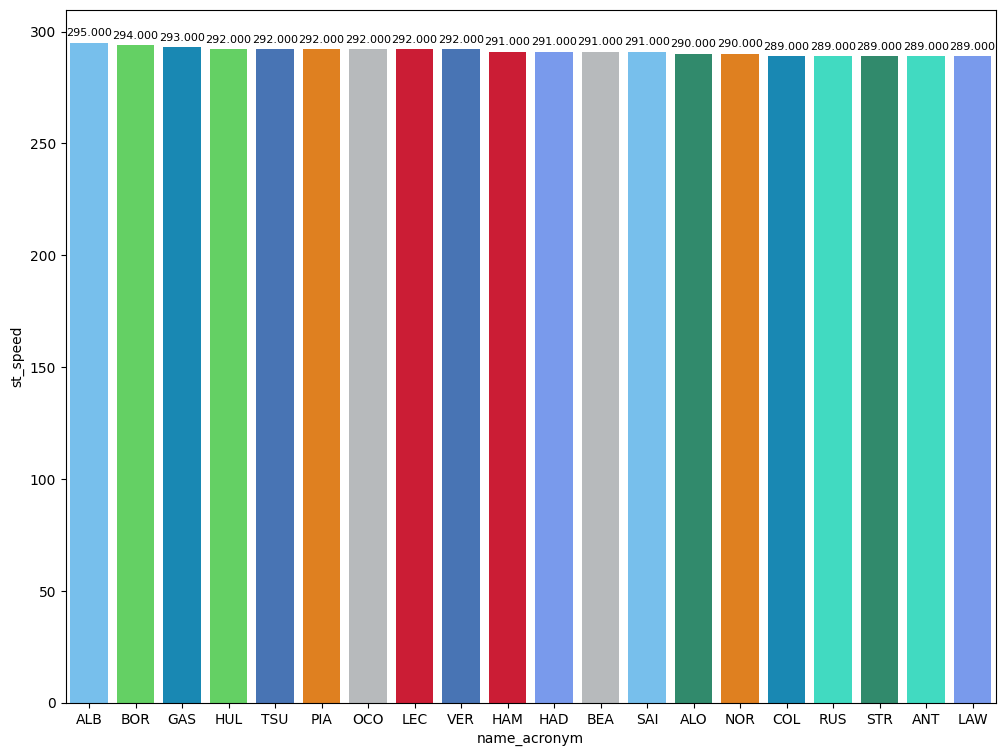

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

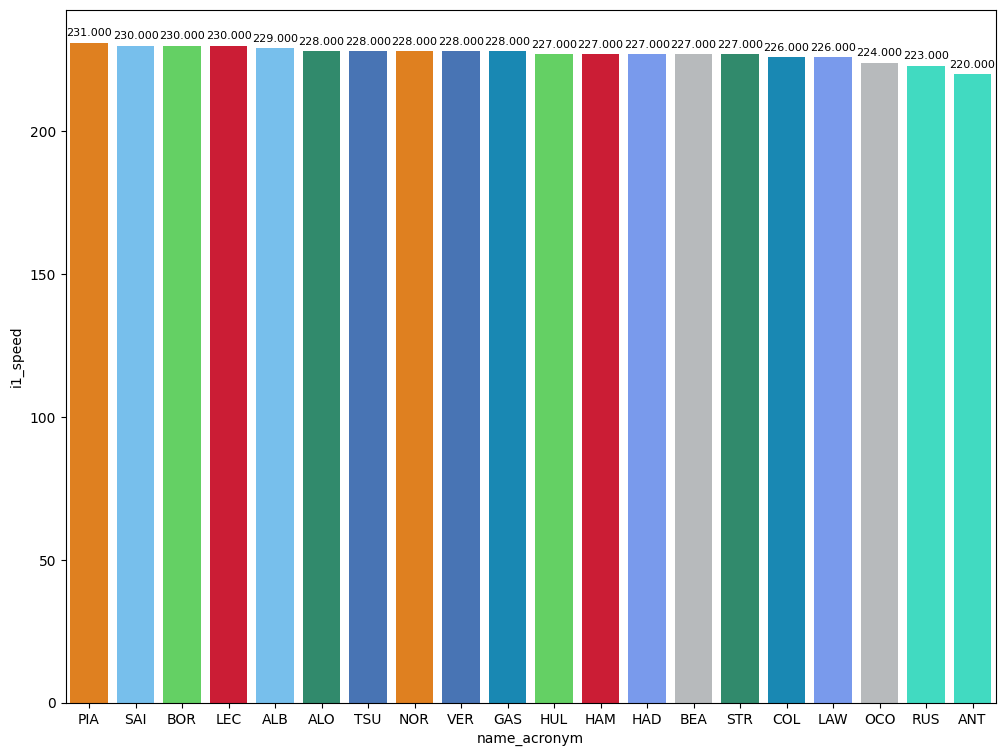

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

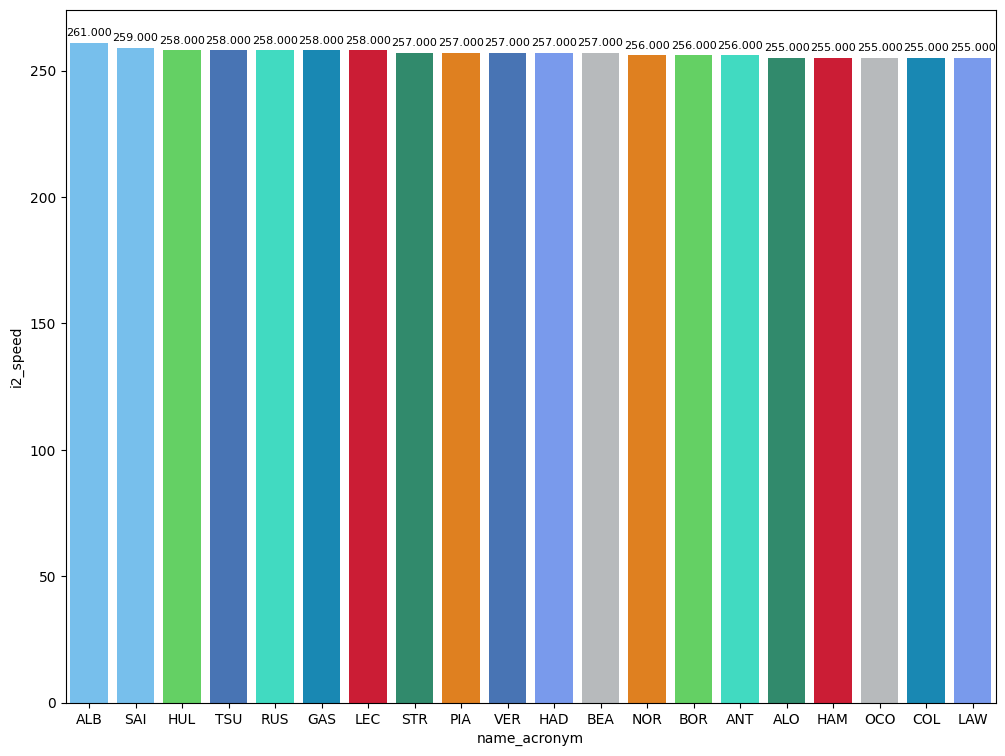

In [9]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [10]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
170   Pierre GASLY   MEDIUM             24.387             26.753   
216  Oscar PIASTRI     SOFT             24.409             26.496   

     duration_sector_3  lap_duration  
170             25.767        76.907  
216             25.640        76.545

### Deltas
It seems that qualy will be close. Haas and RB could suffer on qualyfing and they will be fighting for entering in Q2. Sauber has had a good performance here and they could fight for Q2. Red Bull should not vave any problem to pass Q3 and Franco without the upgrades could improve in future sessions.

In [11]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


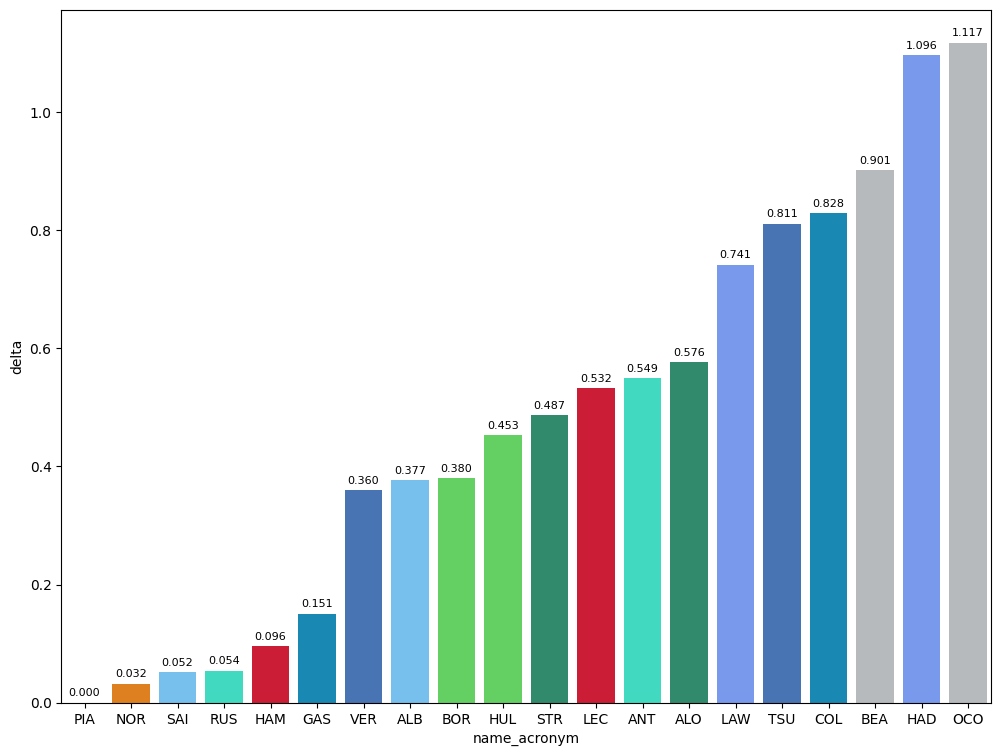

In [12]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. Also, each sector will be commented.
<br>
<b>Sector 1:</b> Ferrari,Williams and Red Bull are very competitive here. Haas and RB could suffer here.
<br>
<b>Sector 2:</b> McLaren is dominant here while Williams and Aston Martin suffer here.
<br>
<b>Sector 3:</b> Sauber could have its opportunity in sector 3. RB should get a gap up to this sector because they are the slowest.

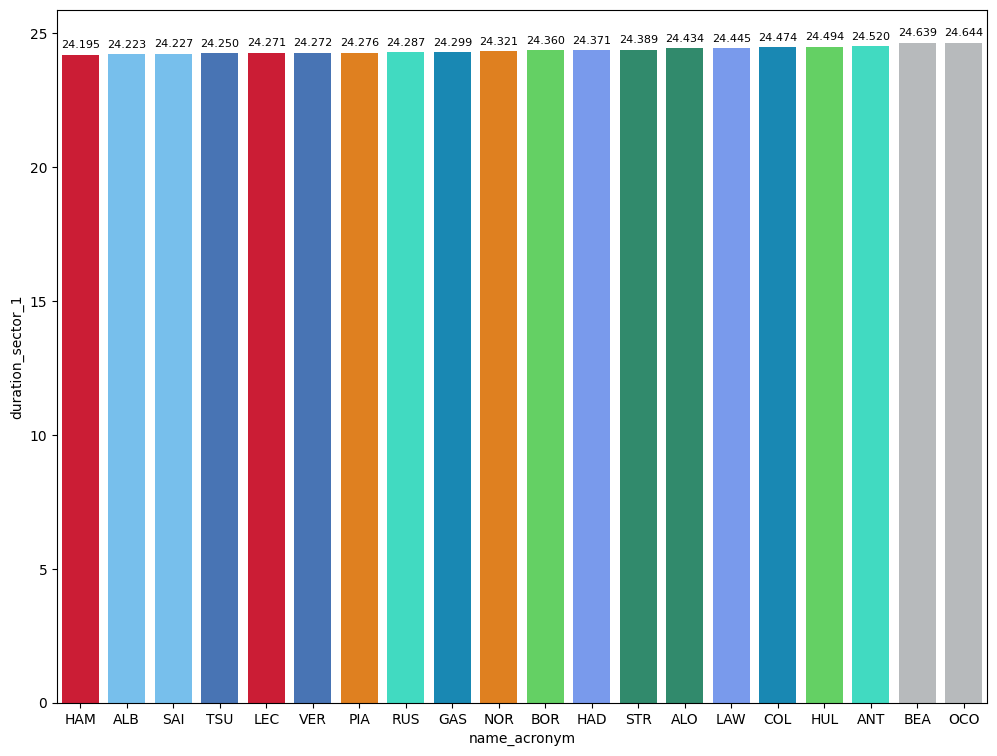

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

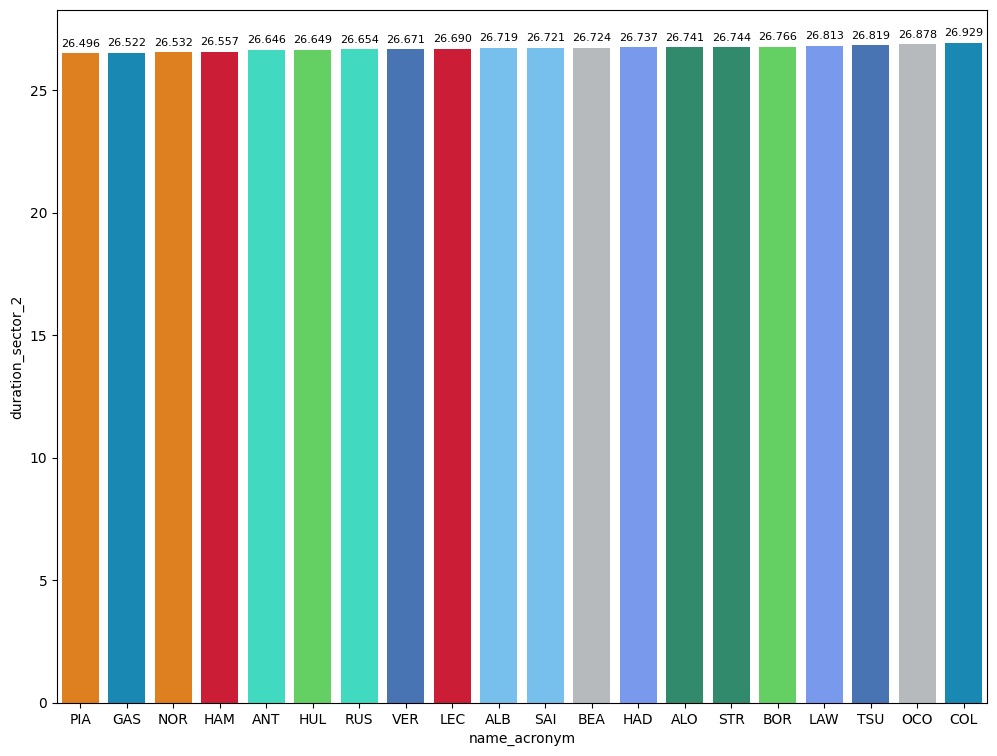

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

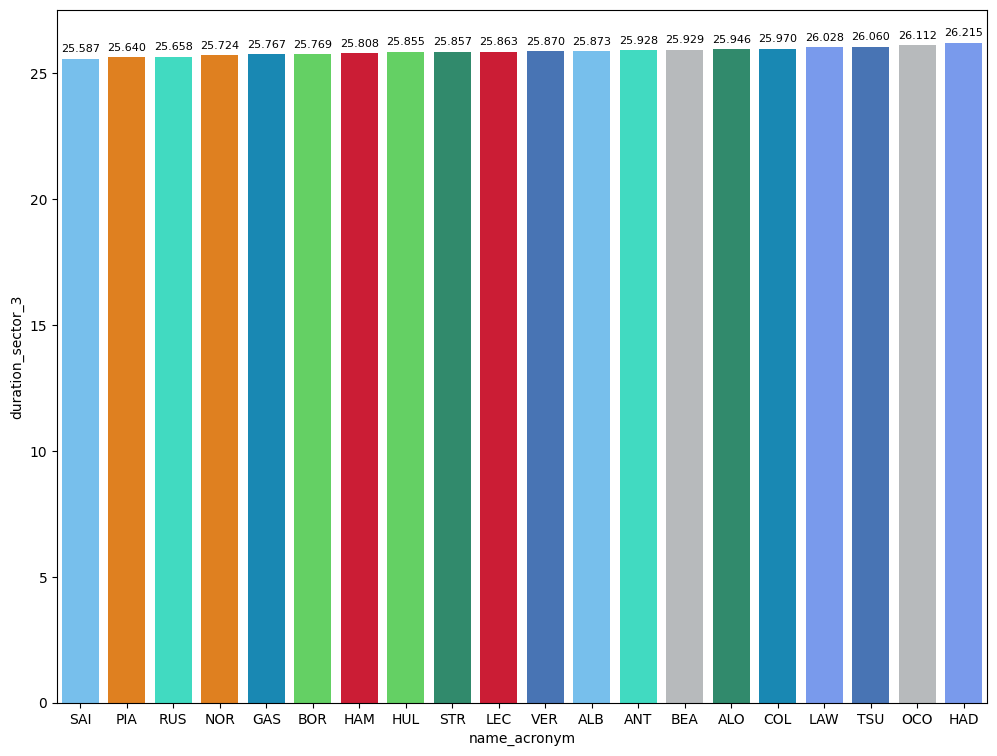

In [15]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [16]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 85").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         79.227756
MEDIUM       79.726750

## Free Practice 2
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=9981)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9981)
drivers = libraryDataF1.obtain_information('drivers',session_key=9981)

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Alpine and Ferrari centered on the straights. Aston and Williams have centered on turns. 

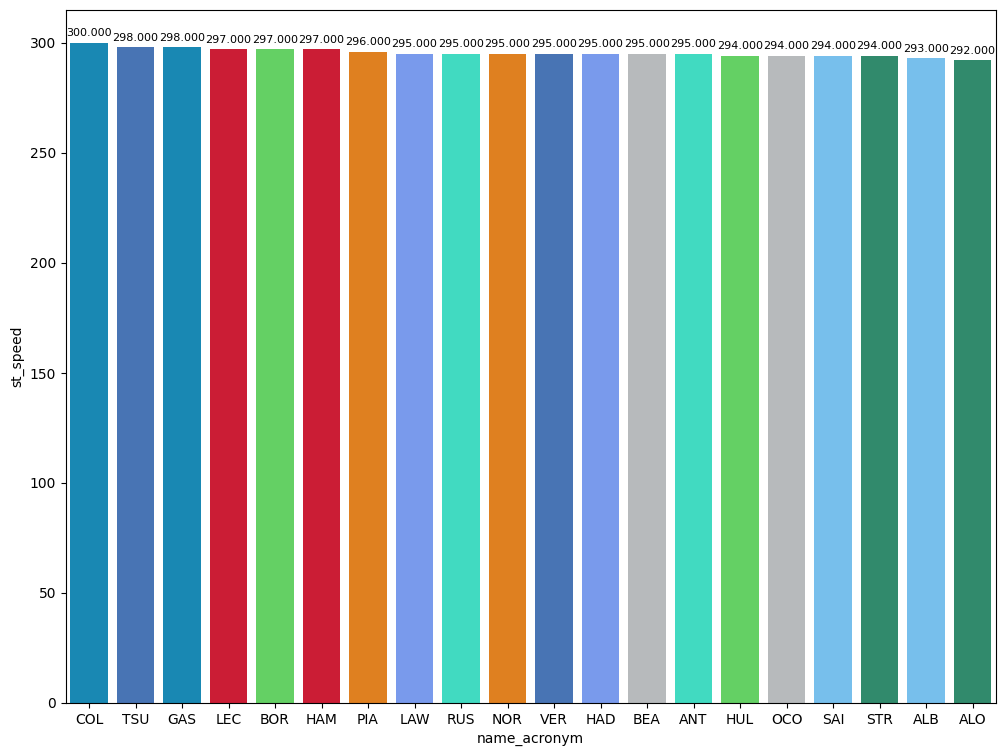

In [5]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

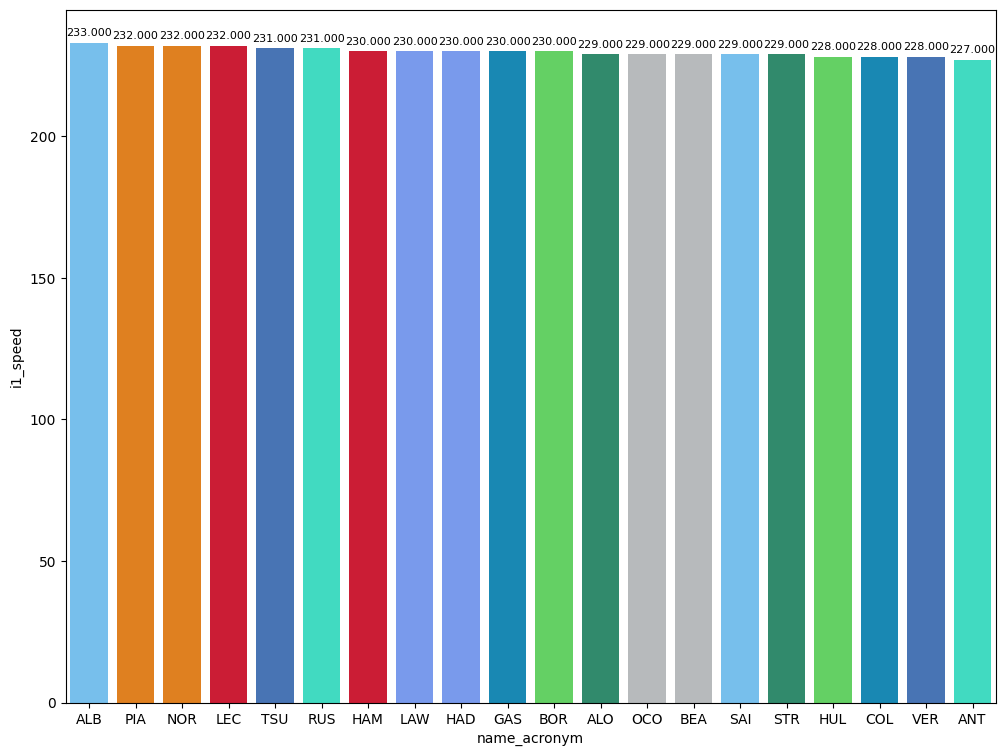

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

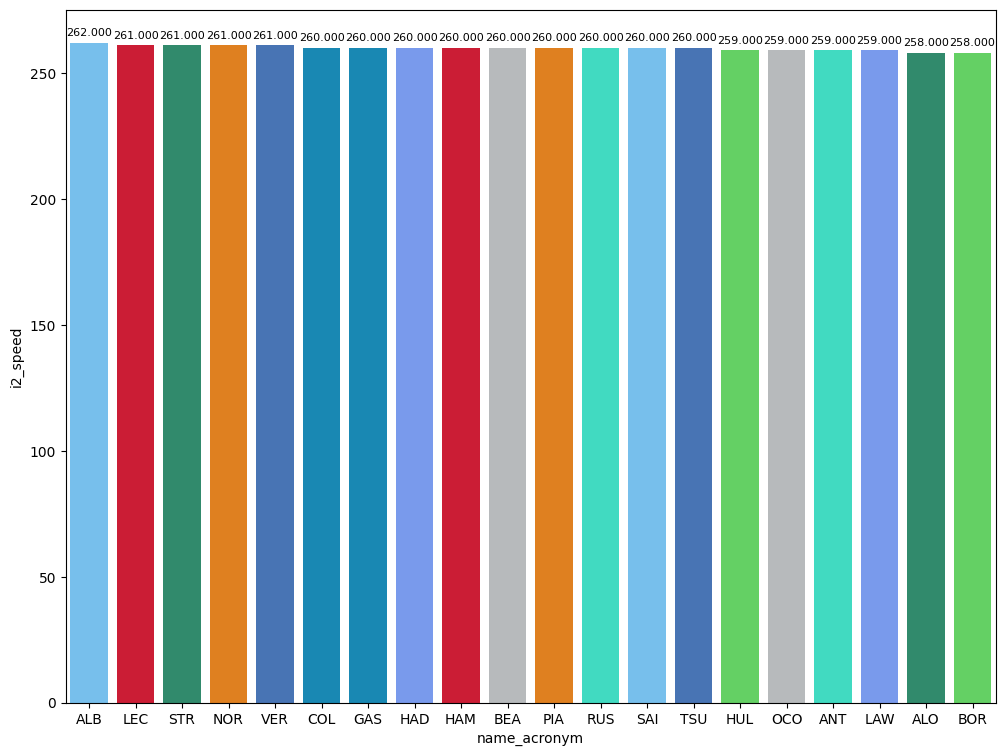

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [8]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

full_name compound  duration_sector_1  duration_sector_2  \
93    Lando NORRIS   MEDIUM             24.393             26.248   
186  Oscar PIASTRI     SOFT             23.780             26.049   

     duration_sector_3  lap_duration  
93              25.311        75.952  
186             25.464        75.293

### Deltas
Qualy will be very close with McLaren fighting for taking the pole but other teams cannot be discarded. Also, entering to Q2 and Q3 will be close.
McLaren: Piastri starting to increase his gap up to Rivazza Alta where Lando cut the gap from 3 tenths to 25 miliseconds
Ferrari: Since turn 4, Leclerc increased his gap being unable for Hamilton to cut.
Red Bull: Verstappen does a good job in the turns but Tsunoda was ahead of Max up to Rivazza Alta. Before the last turn, they were in the same laptime but in the exit Verstappen made the difference.
Williams: Carlos is better in turns but Albon works very well in turns and the exit of last turn.
Alpine: Pierre and Franco were in the same tenth up to Acqua Mineali were Pierre made the difference.



In [9]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


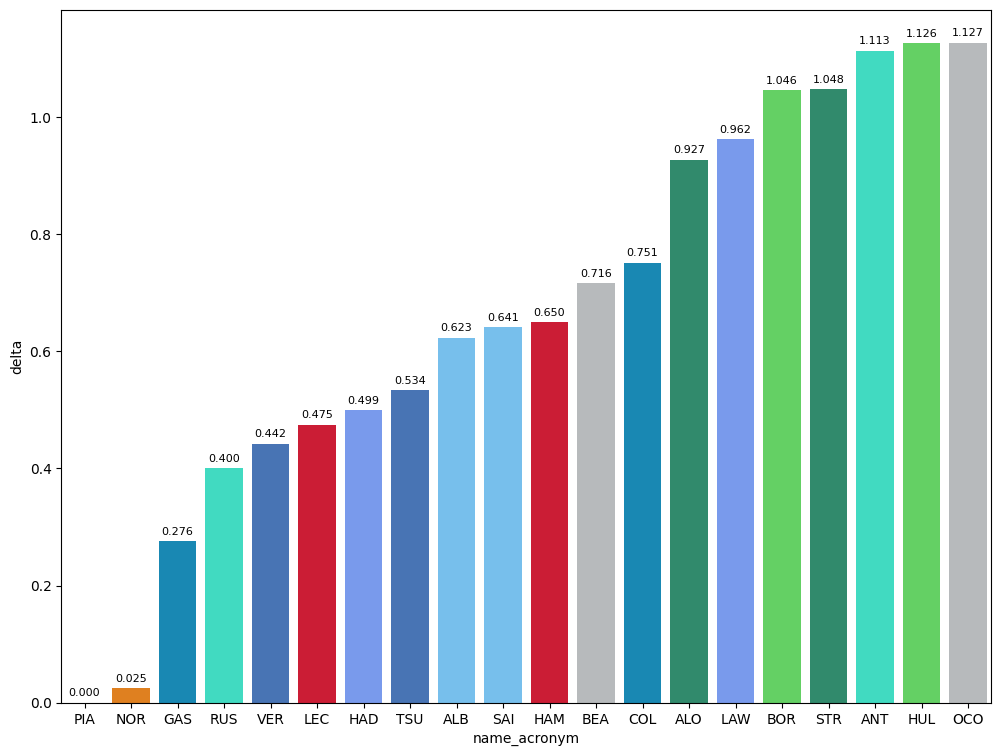

In [10]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: McLaren, Red Bull and Alpine are competitive and Aston and Haas could suffer here.
S2: This sector is very competive but Sauber and Franco suffer here.
S3: Sauber and Aston will suffer here.

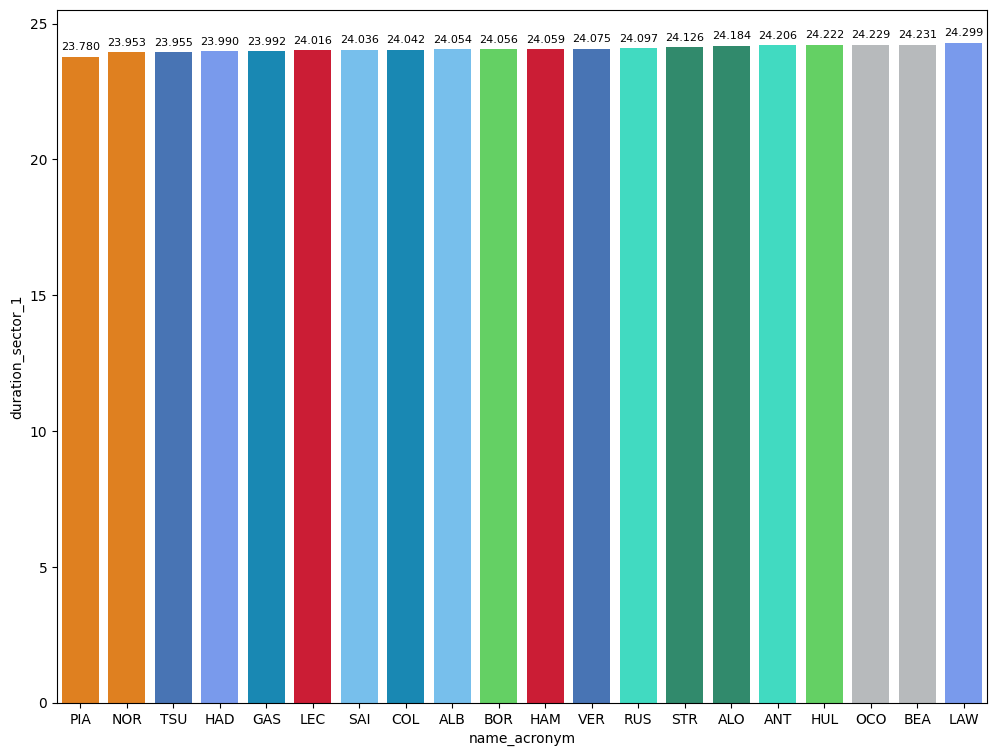

In [11]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

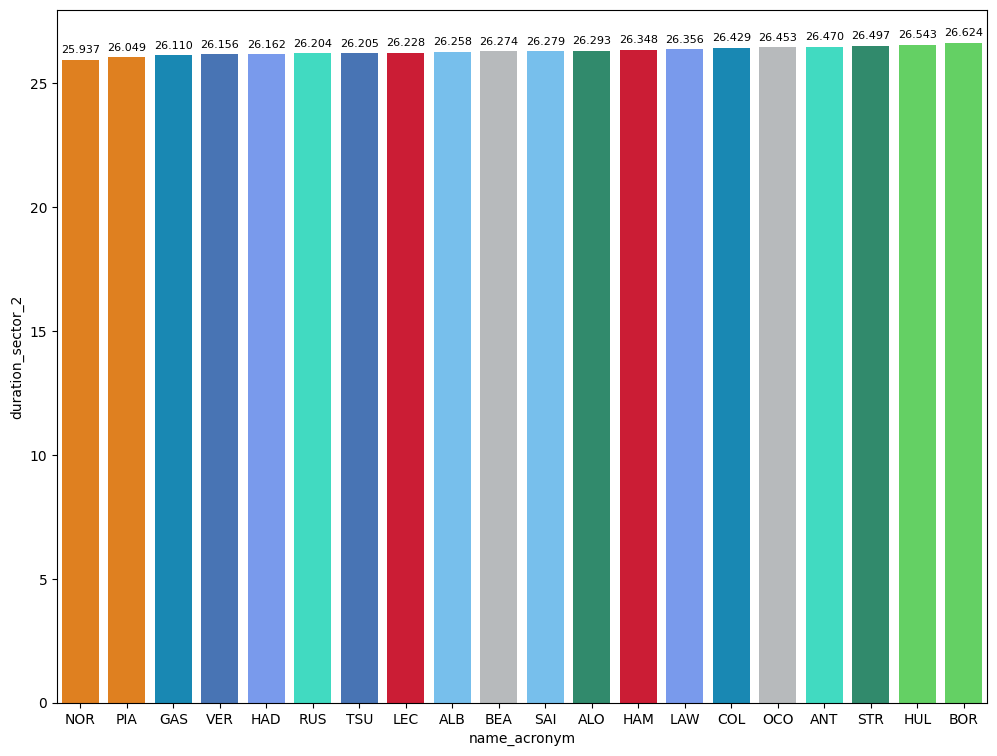

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

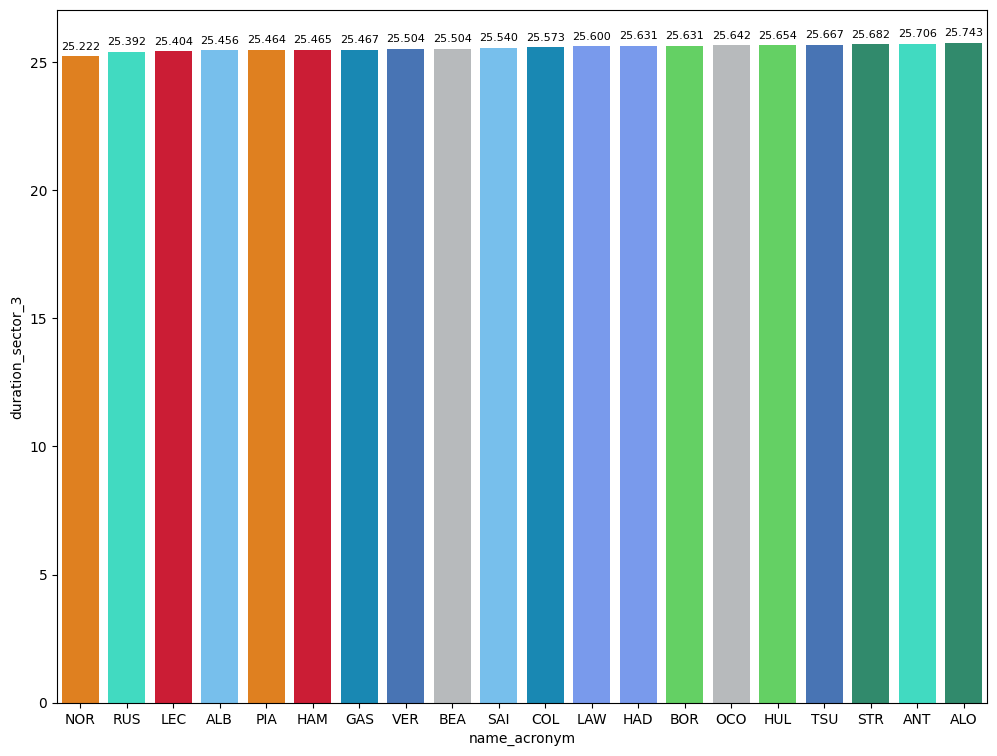

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [14]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 83").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

lap_duration
compound              
SOFT         76.498229
MEDIUM       79.707670

### Long runs

In [1069]:
MINIMUN_SECONDS = 79.6
MAXIMUM_SECONDS = 81.45

#### Red Bull Racing

In [1070]:
stintInformation.query('driver_number == 1 or driver_number == 22')

meeting_key  session_key  stint_number  driver_number  lap_start  \
9           1260         9981             1              1          1   
18          1260         9981             1             22          1   
38          1260         9981             2              1          8   
56          1260         9981             2             22         11   
64          1260         9981             3              1         13   
84          1260         9981             3             22         17   
94          1260         9981             4              1         25   
103         1260         9981             4             22         28   

     lap_end compound  tyre_age_at_start  
9          7   MEDIUM                  0  
18        10   MEDIUM                  0  
38        12     SOFT                  0  
56        16     SOFT                  0  
64        24   MEDIUM                  6  
84        27   MEDIUM                  9  
94        27     SOFT                  5  
103       30     SOFT                  6

In [1071]:
data = libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
270  Max VERSTAPPEN   MEDIUM  2025-05-16T15:38:59.982000+00:00          13   
278  Max VERSTAPPEN   MEDIUM  2025-05-16T15:40:20.576000+00:00          14   
309  Max VERSTAPPEN   MEDIUM  2025-05-16T15:43:03.504000+00:00          16   
345  Max VERSTAPPEN   MEDIUM  2025-05-16T15:45:47.825000+00:00          18   
364  Max VERSTAPPEN   MEDIUM  2025-05-16T15:47:08.202000+00:00          19   
402  Max VERSTAPPEN   MEDIUM  2025-05-16T15:49:50.756000+00:00          21   
422  Max VERSTAPPEN   MEDIUM  2025-05-16T15:51:11.444000+00:00          22   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
270             25.734             28.048             26.813        80.595  
278             25.568             27.980             26.740        80.288  
309             25.425             28.001             26.821        80.247  
345             25.316             27.955             26.973        80.244  
364             25.431             28.103             27.438        80.972  
402             25.707             28.010             26.878        80.595  
422             25.480             28.148             27.030        80.658

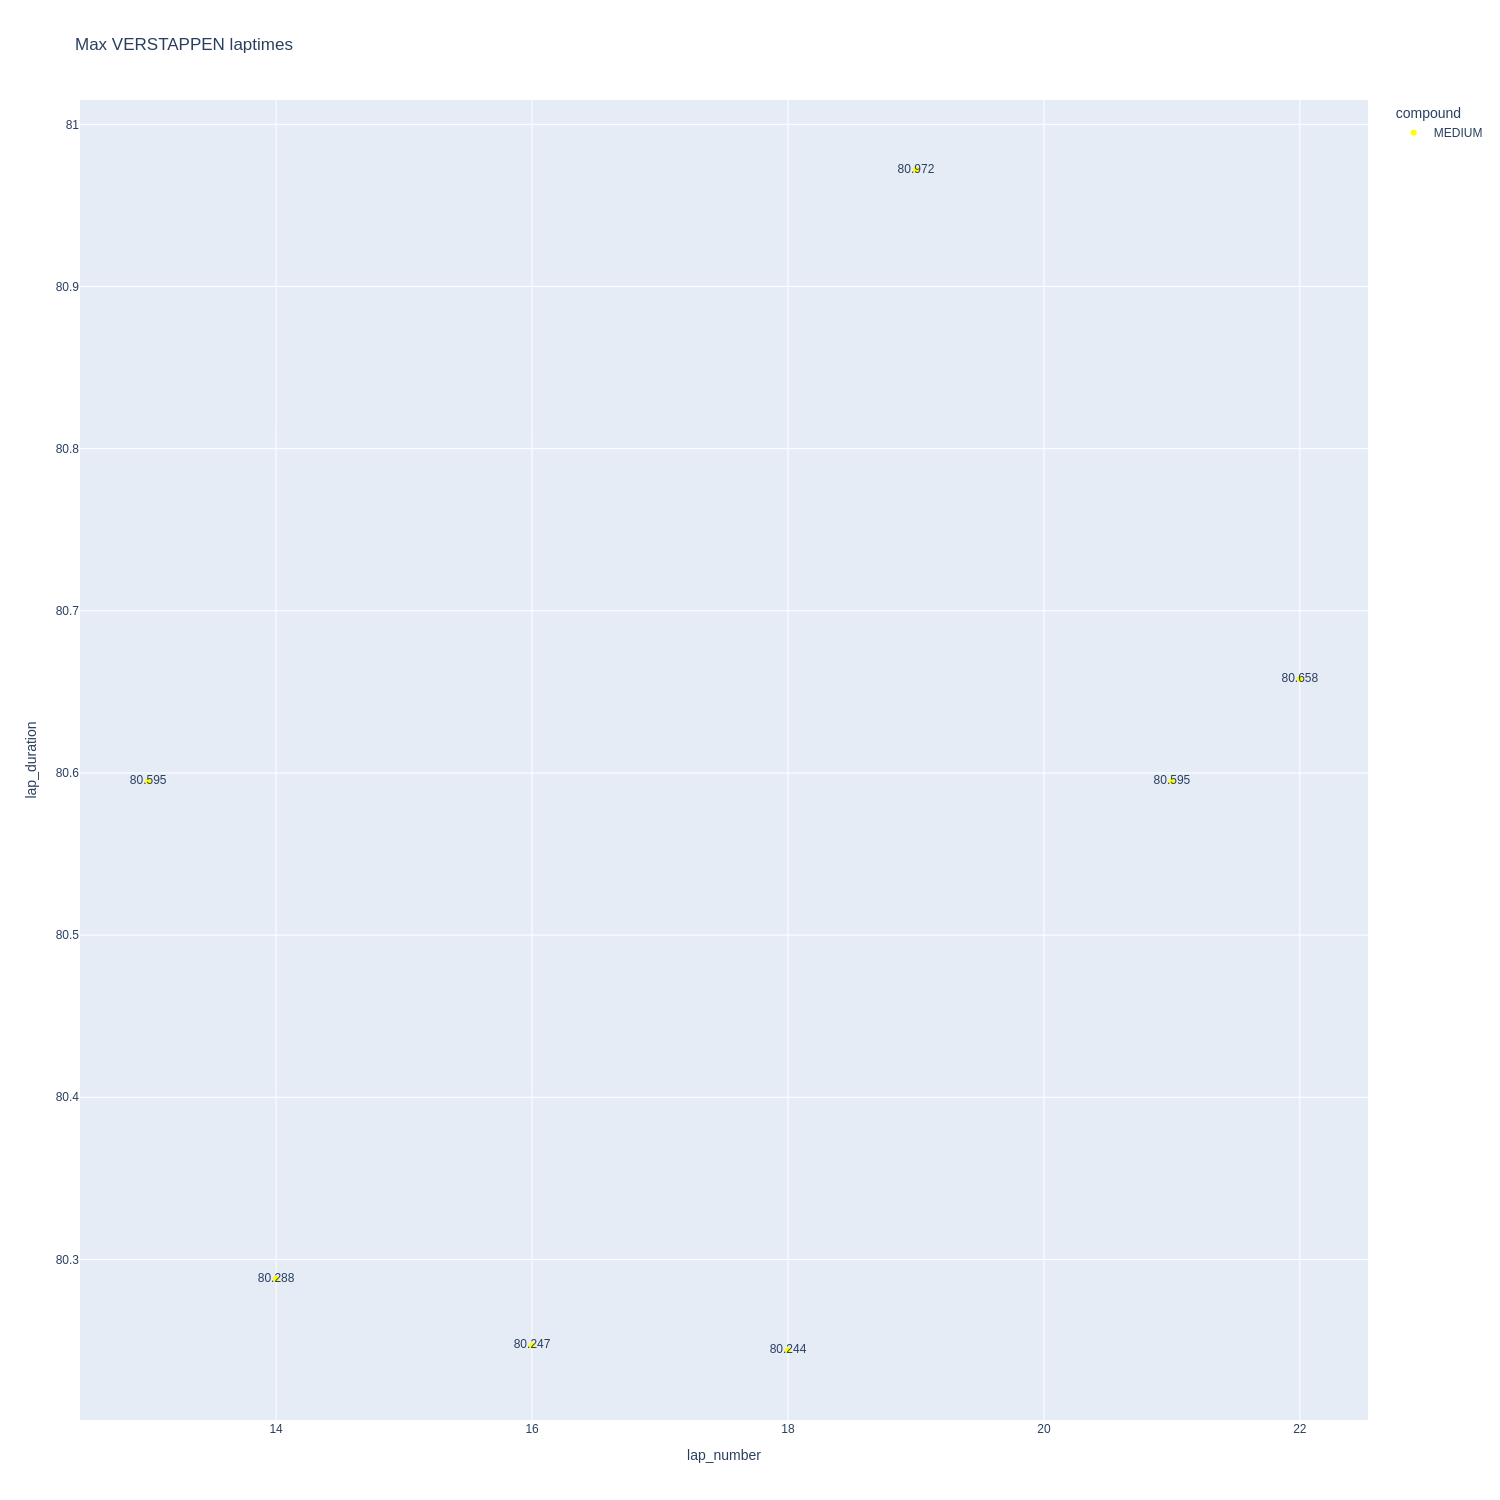

In [1072]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

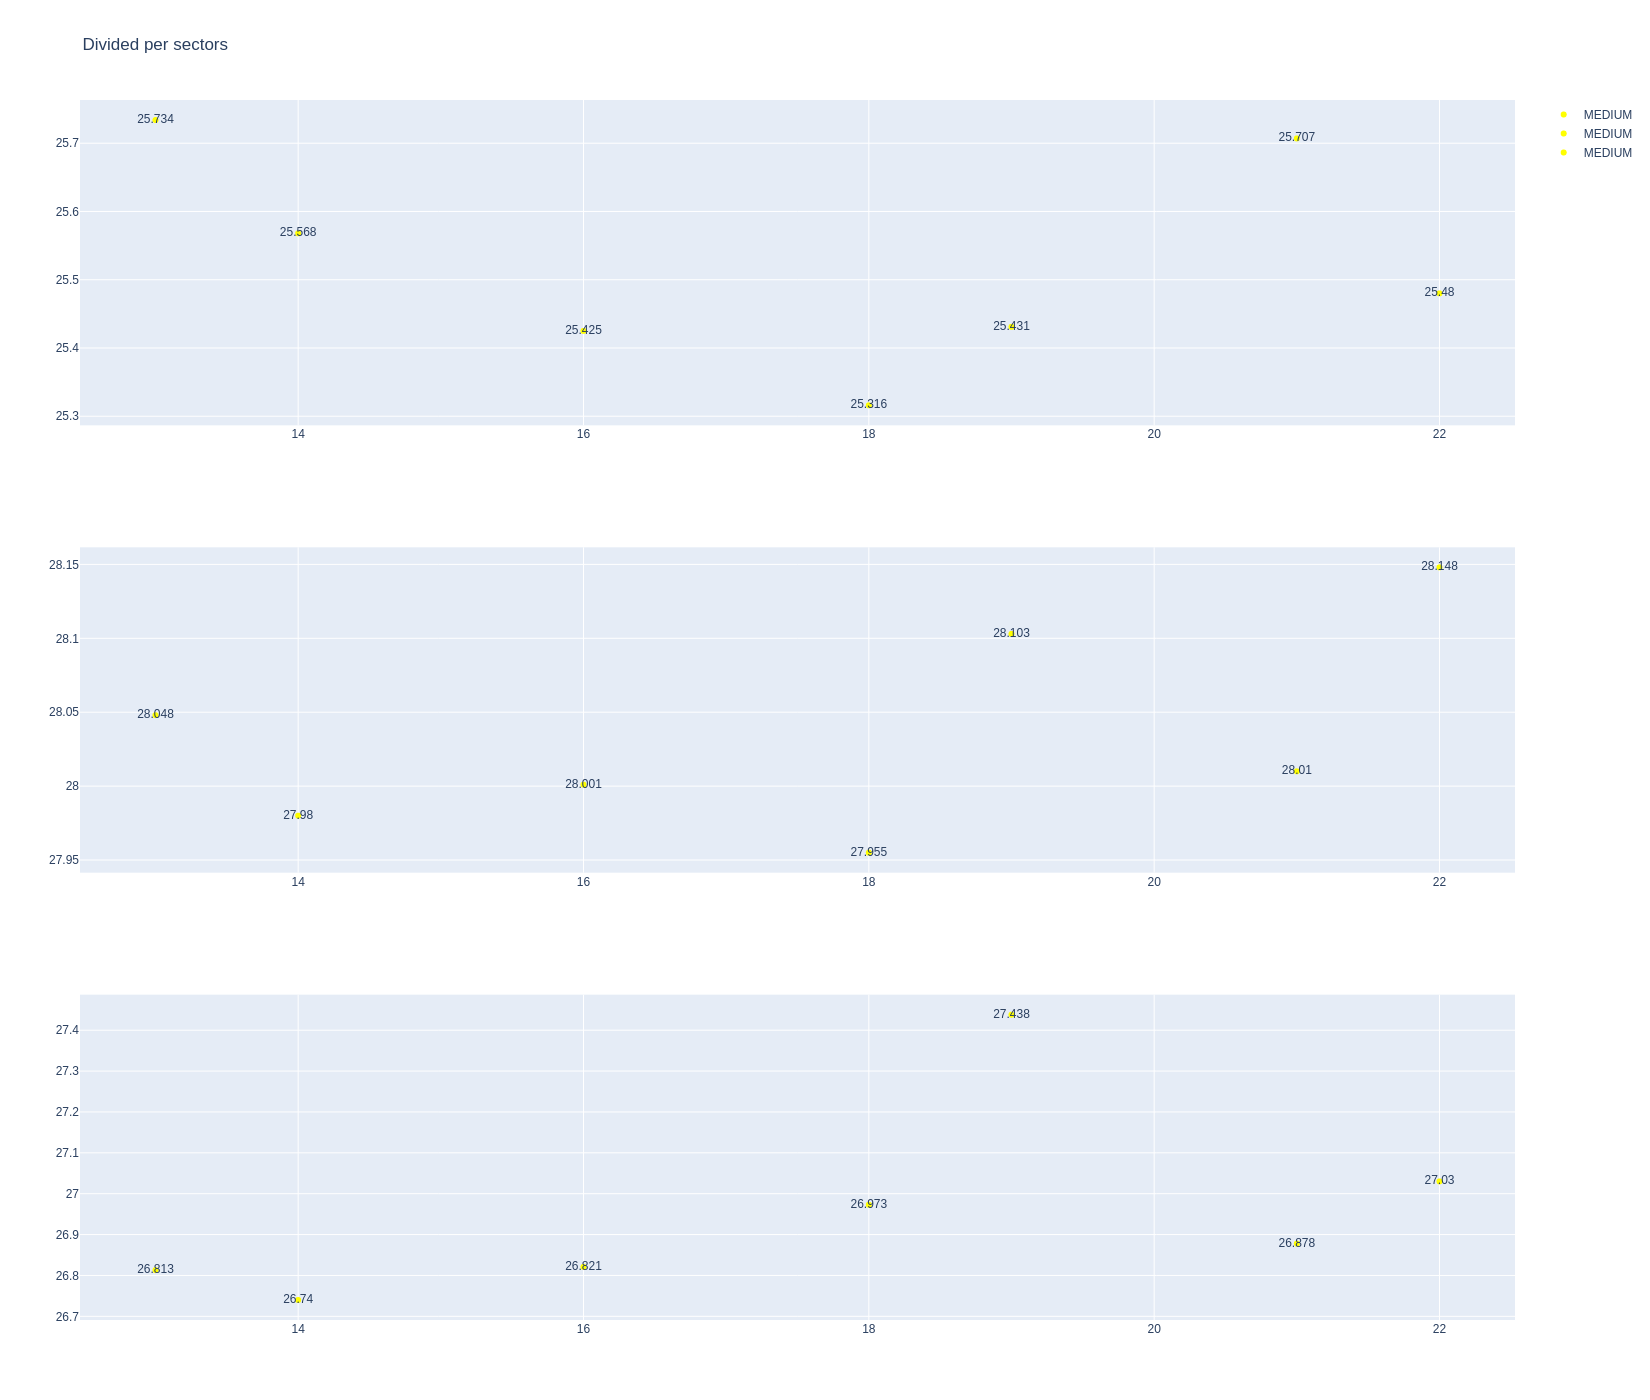

In [1073]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1074]:
data = libraryDataF1.getinfolongruns(jointables2,22,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
314  Yuki TSUNODA   MEDIUM  2025-05-16T15:43:25.348000+00:00          19   
332  Yuki TSUNODA   MEDIUM  2025-05-16T15:44:45.870000+00:00          20   
350  Yuki TSUNODA   MEDIUM  2025-05-16T15:46:06.653000+00:00          21   
368  Yuki TSUNODA   MEDIUM  2025-05-16T15:47:27.413000+00:00          22   
387  Yuki TSUNODA   MEDIUM  2025-05-16T15:48:48.193000+00:00          23   
407  Yuki TSUNODA   MEDIUM  2025-05-16T15:50:09.100000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
314             25.777             27.841             26.920        80.538  
332             25.743             28.003             27.104        80.850  
350             25.754             27.834             27.041        80.629  
368             25.731             28.021             27.135        80.887  
387             25.739             28.017             27.160        80.916  
407             25.786             28.021             27.143        80.950

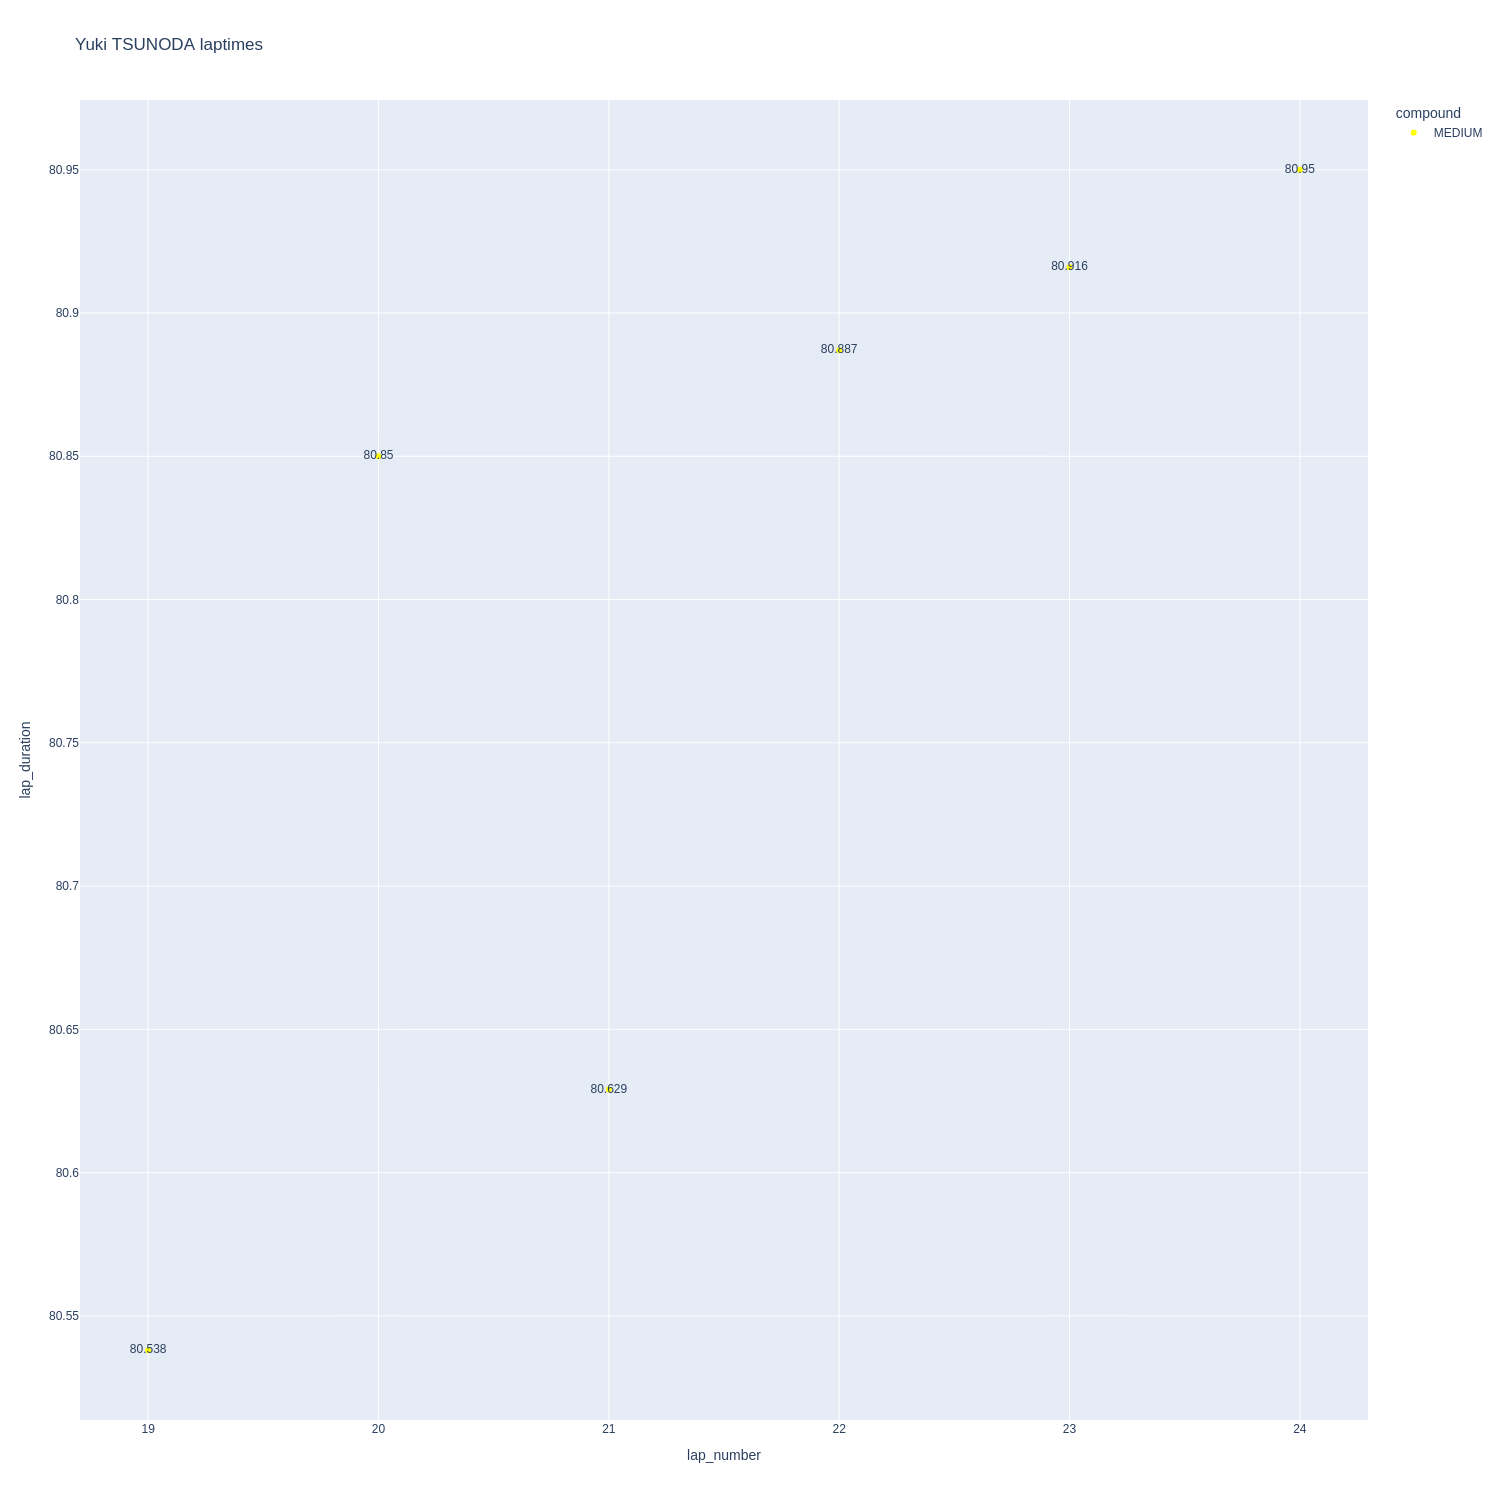

In [1075]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

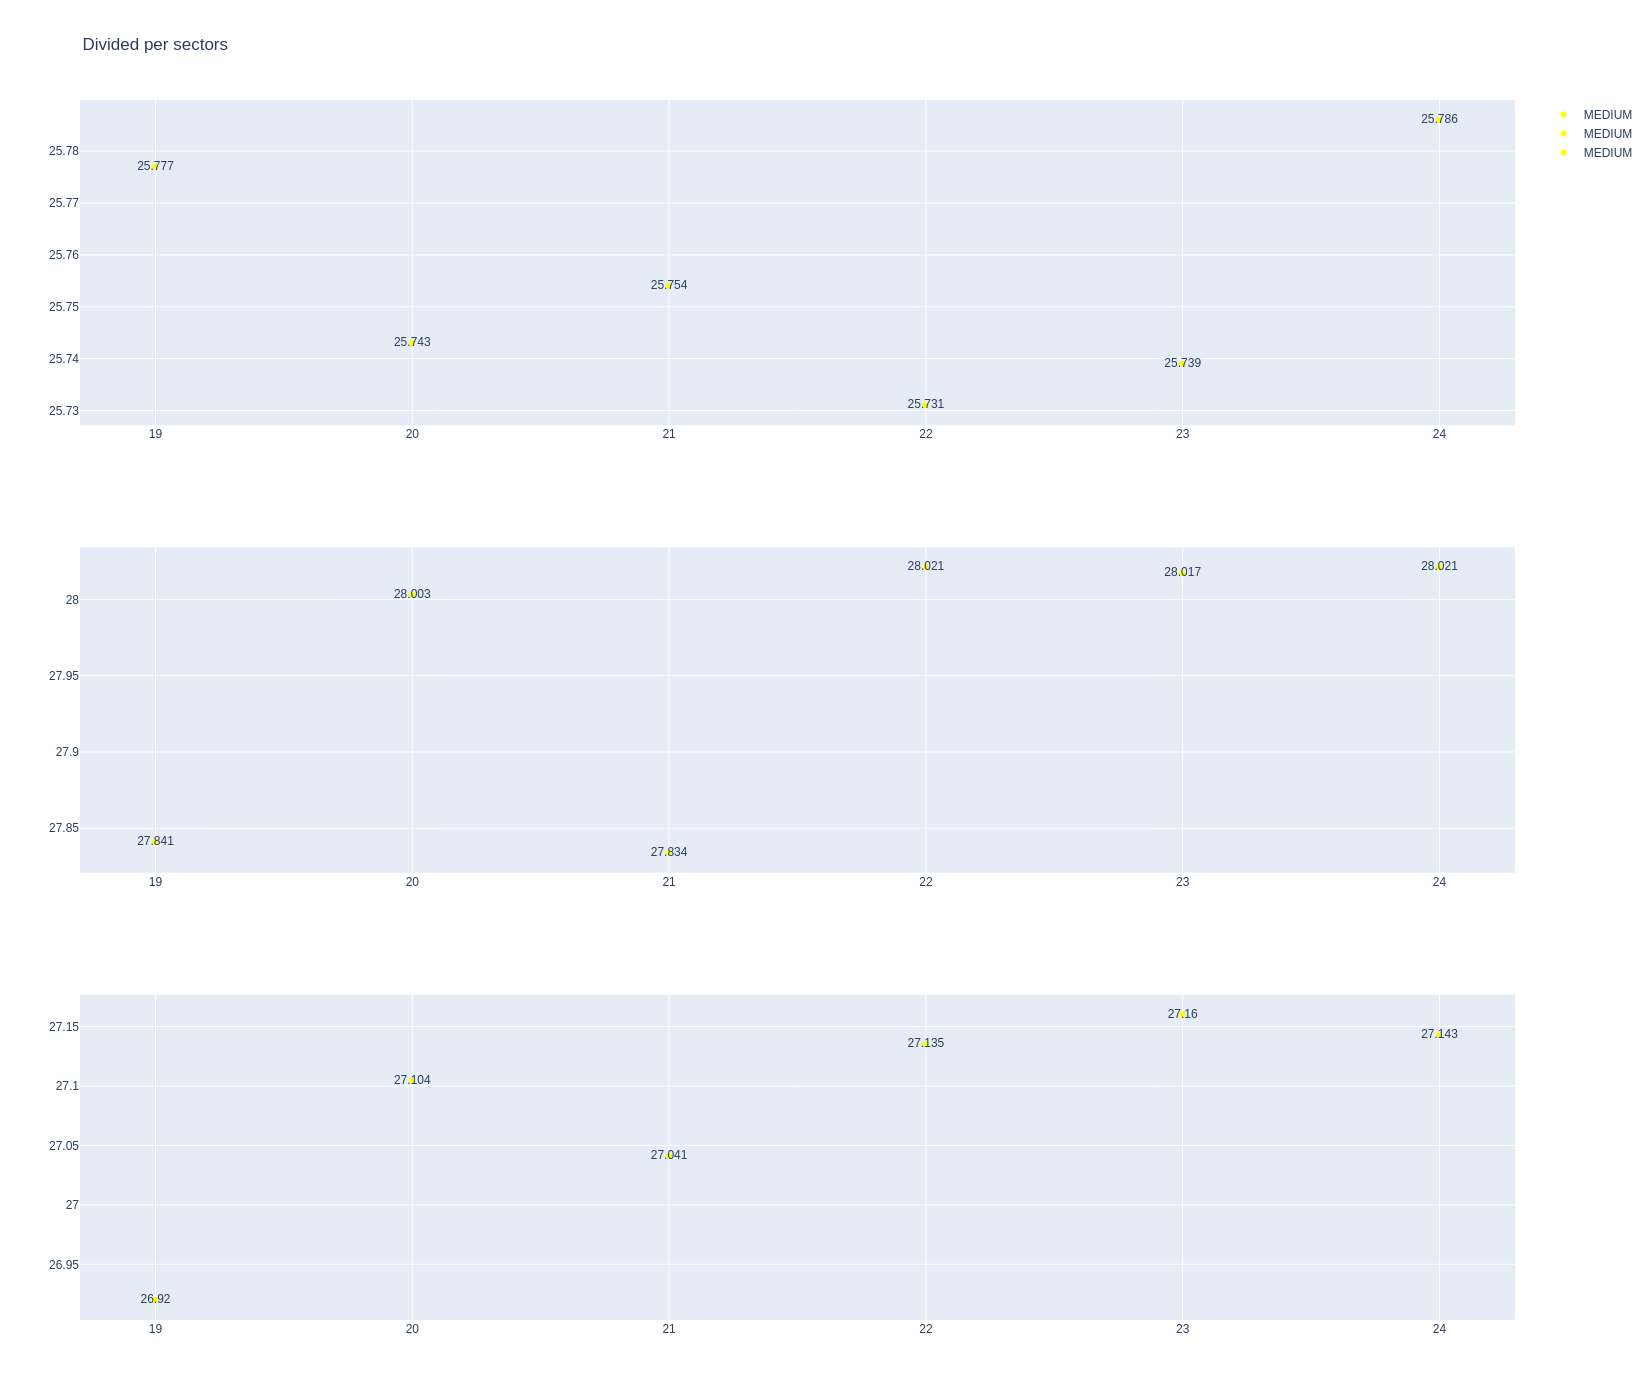

In [1076]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [1077]:
stintInformation.query('driver_number == 55 or driver_number == 16')

meeting_key  session_key  stint_number  driver_number  lap_start  \
12          1260         9981             1             55          1   
15          1260         9981             1             16          1   
31          1260         9981             2             55          8   
44          1260         9981             2             16         10   
48          1260         9981             3             55         10   
62          1260         9981             3             16         13   
82          1260         9981             4             16         17   
83          1260         9981             4             55         17   
98          1260         9981             5             16         26   
101         1260         9981             5             55         27   

     lap_end compound  tyre_age_at_start  
12         7   MEDIUM                  1  
15         9   MEDIUM                  0  
31         9   MEDIUM                  7  
44        12     SOFT                  0  
48        16     SOFT                  0  
62        16     SOFT                  3  
82        25   MEDIUM                  8  
83        26   MEDIUM                  9  
98        29   MEDIUM                 16  
101       30   MEDIUM                 18

In [1078]:
data = libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
312  Charles LECLERC   MEDIUM  2025-05-16T15:43:14.848000+00:00          17   
329  Charles LECLERC   MEDIUM  2025-05-16T15:44:35.052000+00:00          18   
347  Charles LECLERC   MEDIUM  2025-05-16T15:45:55.106000+00:00          19   
366  Charles LECLERC   MEDIUM  2025-05-16T15:47:14.842000+00:00          20   
385  Charles LECLERC   MEDIUM  2025-05-16T15:48:34.834000+00:00          21   
425  Charles LECLERC   MEDIUM  2025-05-16T15:51:20.085000+00:00          23   
476  Charles LECLERC   MEDIUM  2025-05-16T15:59:45.035000+00:00          26   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
312             25.653             27.828             26.830        80.311  
329             25.515             27.827             26.633        79.975  
347             25.315             27.666             26.675        79.656  
366             25.228             27.857             26.994        80.079  
385             25.488             27.908             26.918        80.314  
425             25.663             28.150             26.983        80.796  
476             25.563             27.730             26.918        80.211

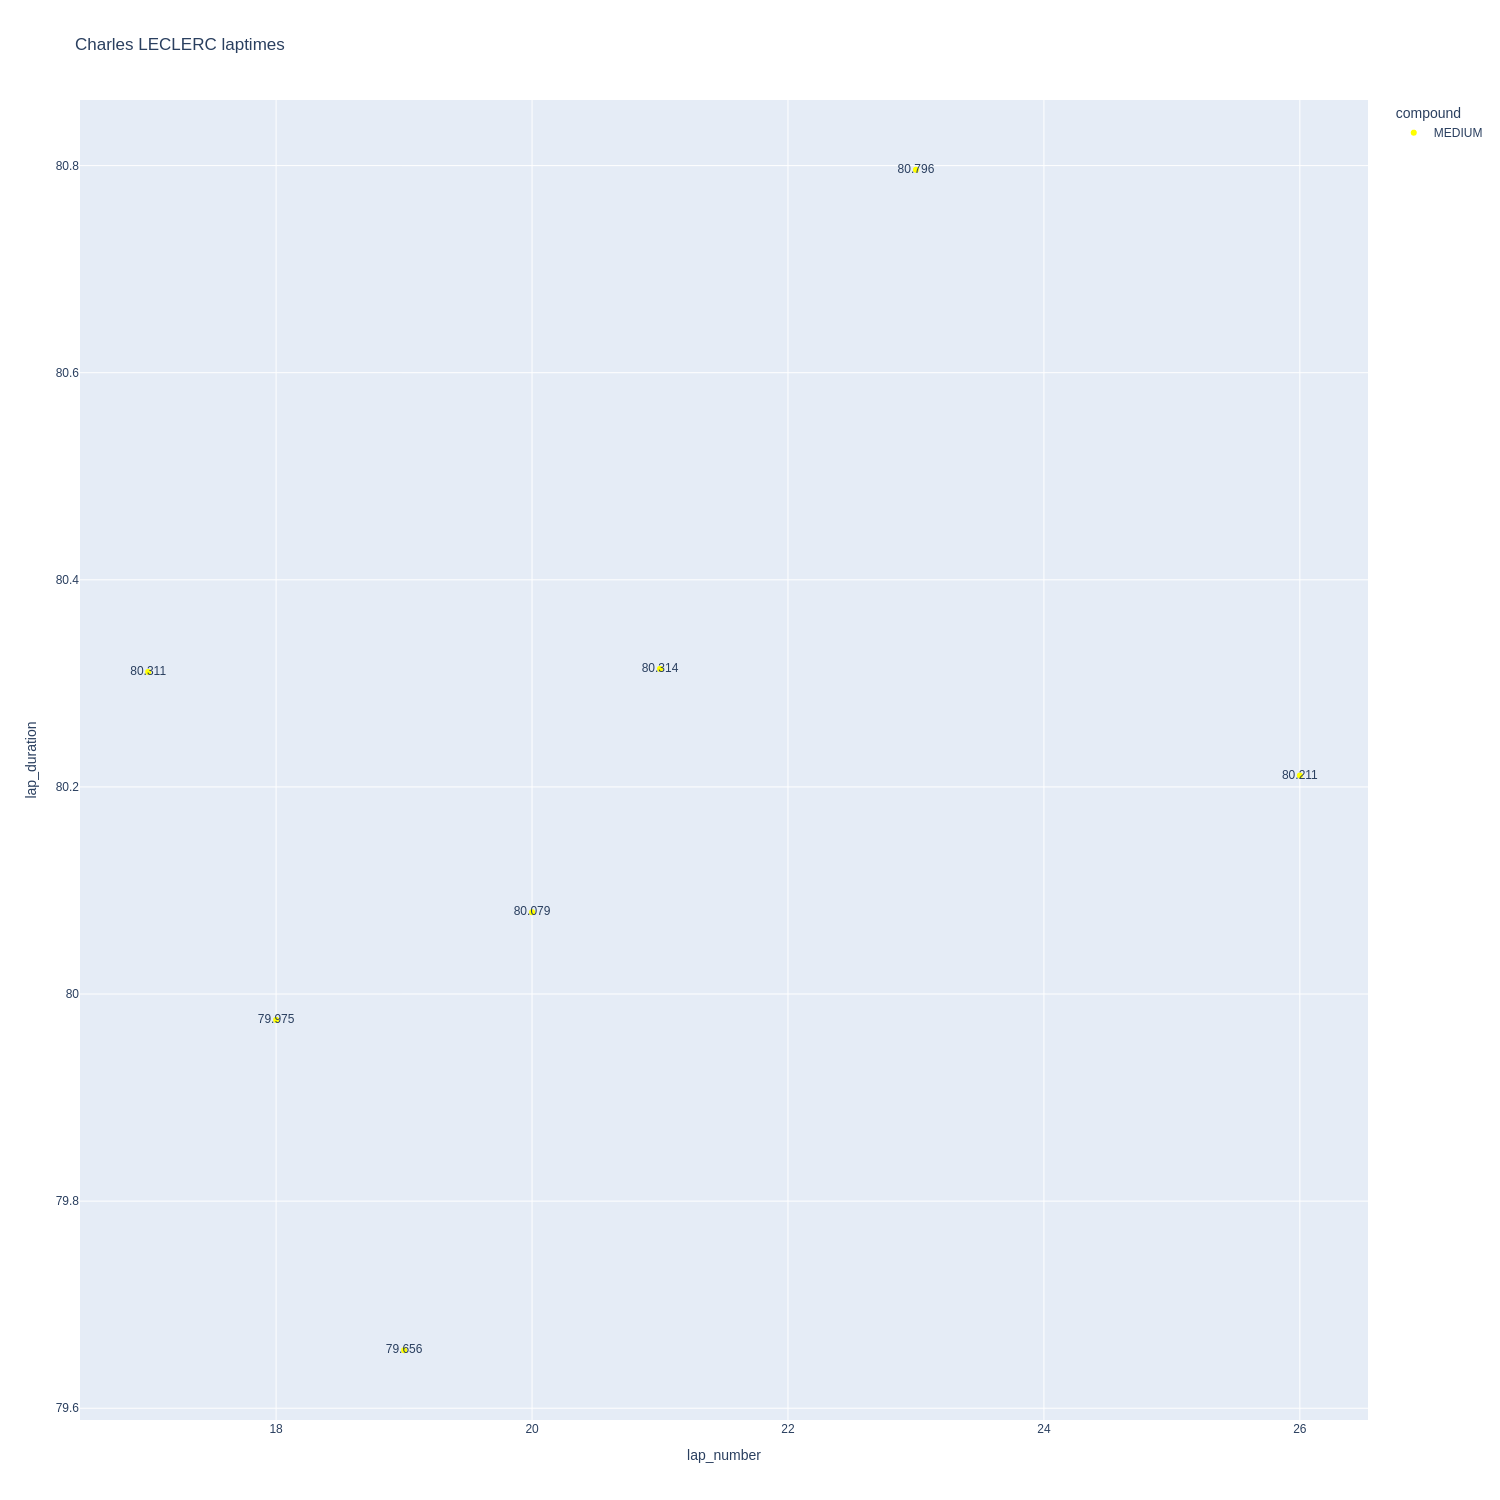

In [1079]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

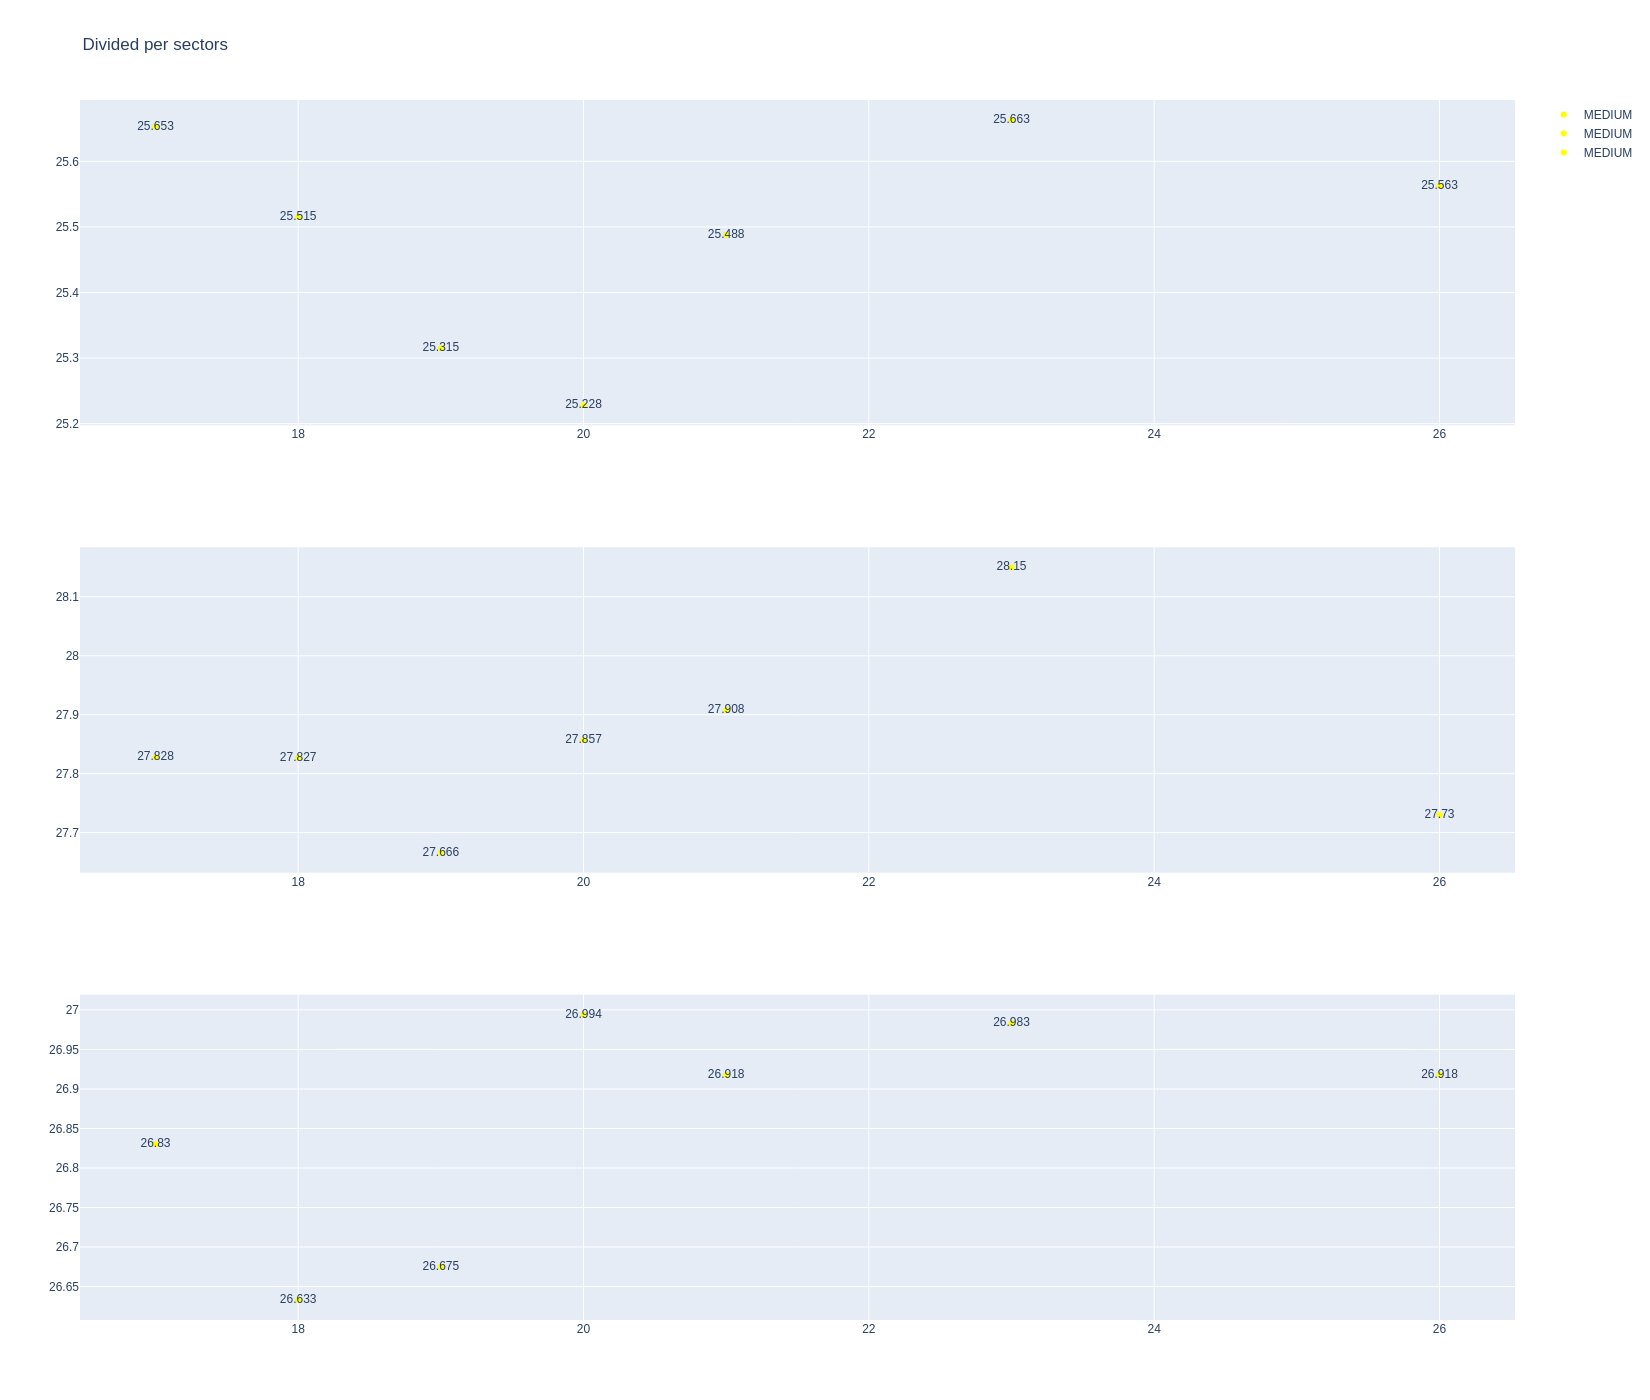

In [1080]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1081]:
data = libraryDataF1.getinfolongruns(jointables2,44,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
305  Lewis HAMILTON   MEDIUM  2025-05-16T15:42:49.770000+00:00          15   
340  Lewis HAMILTON   MEDIUM  2025-05-16T15:45:32.403000+00:00          17   
358  Lewis HAMILTON   MEDIUM  2025-05-16T15:46:52.405000+00:00          18   
421  Lewis HAMILTON   MEDIUM  2025-05-16T15:51:09.944000+00:00          21   
477  Lewis HAMILTON   MEDIUM  2025-05-16T15:59:49.754000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
305             25.794             27.955             26.824        80.573  
340             25.402             27.891             26.730        80.023  
358             25.564             27.850             26.923        80.337  
421             25.470             27.666             26.598        79.734  
477             25.585             27.803             26.902        80.290

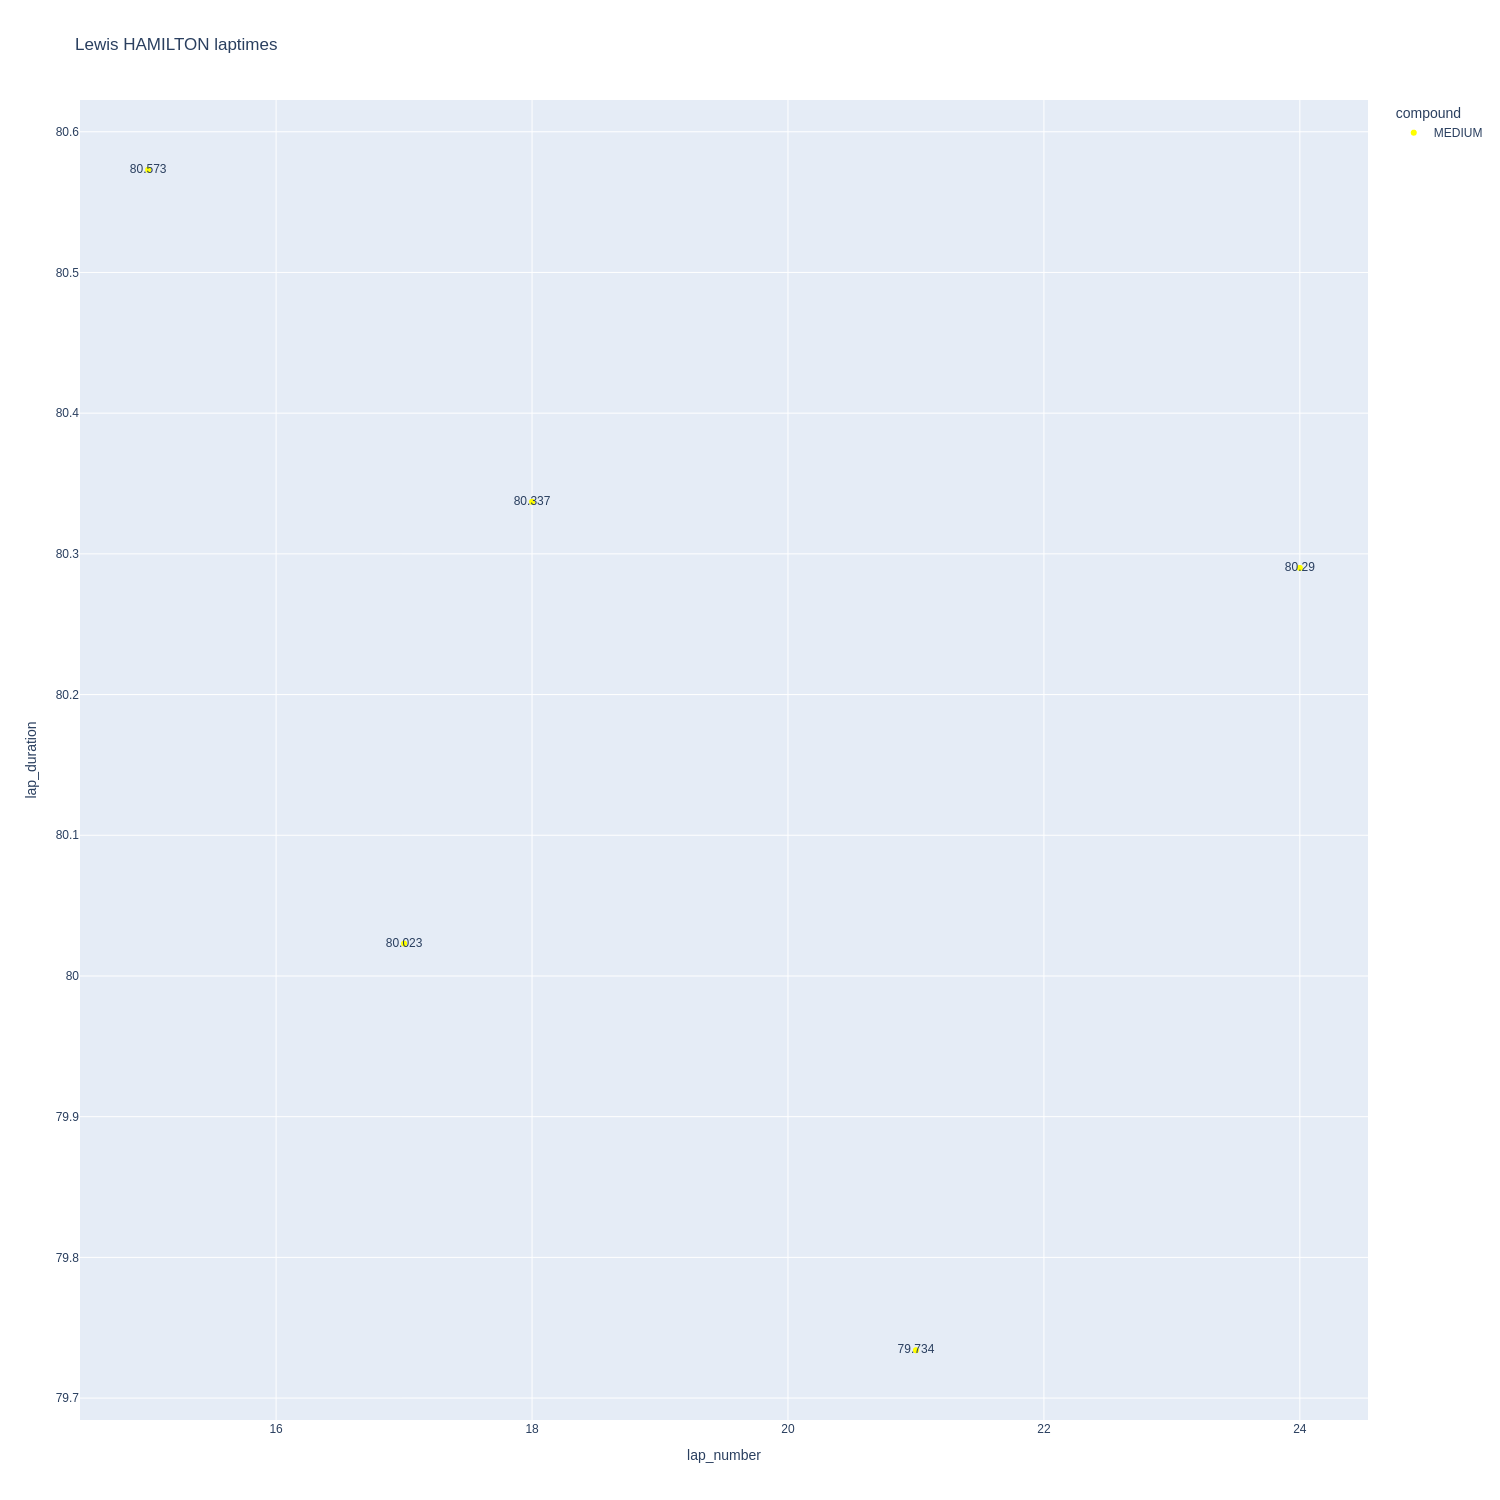

In [1082]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

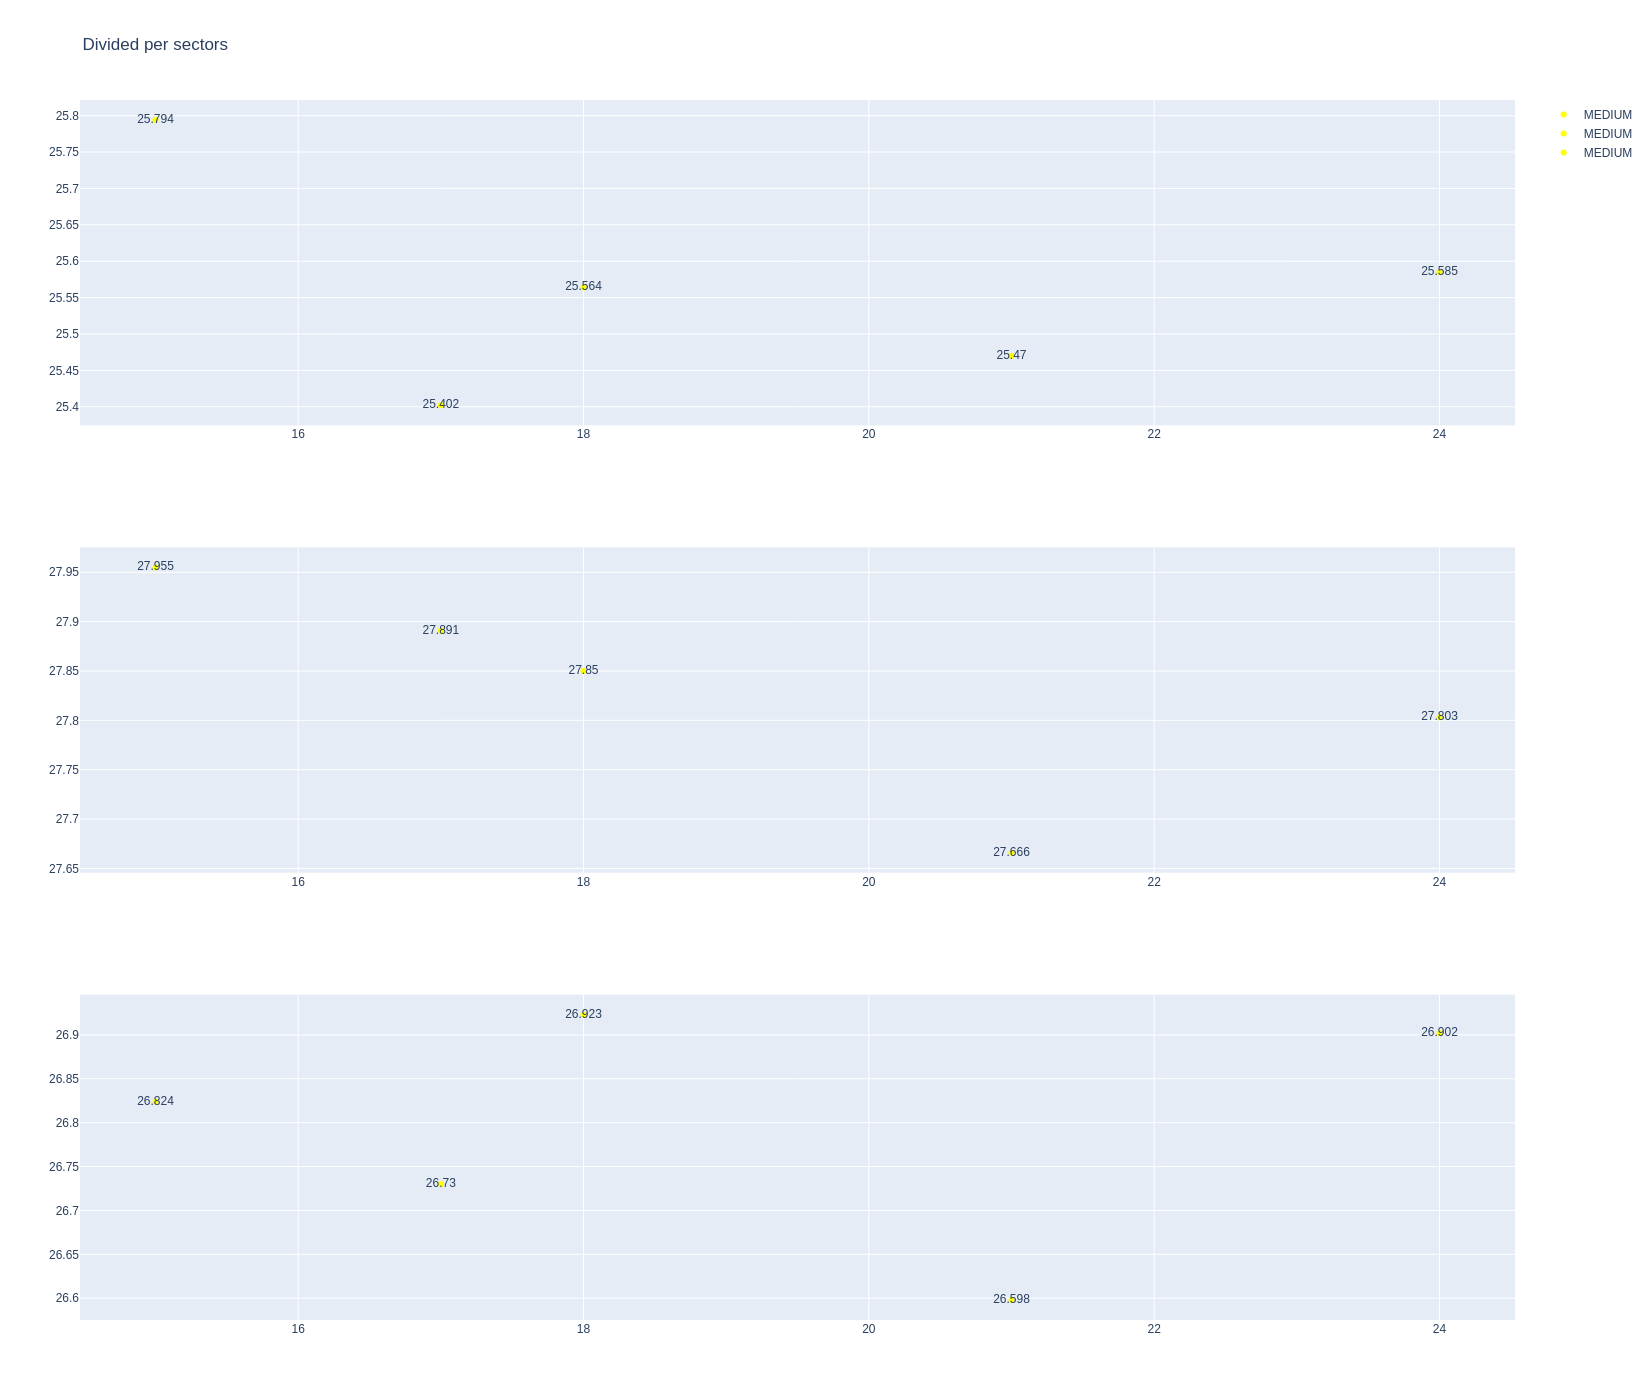

In [1083]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [1084]:
stintInformation.query('driver_number == 63 or driver_number == 12')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
3          1260         9981             1             12          1        4   
7          1260         9981             1             63          1        4   
22         1260         9981             2             12          5        7   
26         1260         9981             2             63          5        7   
30         1260         9981             3             12          8        9   
40         1260         9981             3             63          8       21   
46         1260         9981             4             12         10       13   
70         1260         9981             5             12         14       24   
89         1260         9981             4             63         22       24   
96         1260         9981             6             12         25       28   

   compound  tyre_age_at_start  
3    MEDIUM                  0  
7    MEDIUM                  0  
22   MEDIUM                  3  
26     SOFT                  0  
30     SOFT                  0  
40   MEDIUM                  3  
46     SOFT                  2  
70   MEDIUM                  6  
89   MEDIUM                 16  
96   MEDIUM                 16

In [1085]:
data = libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
256  George RUSSELL   MEDIUM  2025-05-16T15:36:23.059000+00:00           8   
262  George RUSSELL   MEDIUM  2025-05-16T15:37:43.319000+00:00           9   
295  George RUSSELL   MEDIUM  2025-05-16T15:41:49.395000+00:00          12   
311  George RUSSELL   MEDIUM  2025-05-16T15:43:09.786000+00:00          13   
328  George RUSSELL   MEDIUM  2025-05-16T15:44:29.958000+00:00          14   
346  George RUSSELL   MEDIUM  2025-05-16T15:45:50.637000+00:00          15   
365  George RUSSELL   MEDIUM  2025-05-16T15:47:11.233000+00:00          16   
384  George RUSSELL   MEDIUM  2025-05-16T15:48:32.193000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
256             25.787             27.808             26.713        80.308  
262             25.826             27.840             26.701        80.367  
295             25.638             27.825             26.827        80.290  
311             25.618             27.789             26.874        80.281  
328             25.699             27.894             27.112        80.705  
346             25.548             28.004             27.041        80.593  
365             25.650             28.132             27.071        80.853  
384             25.557             28.405             27.368        81.330

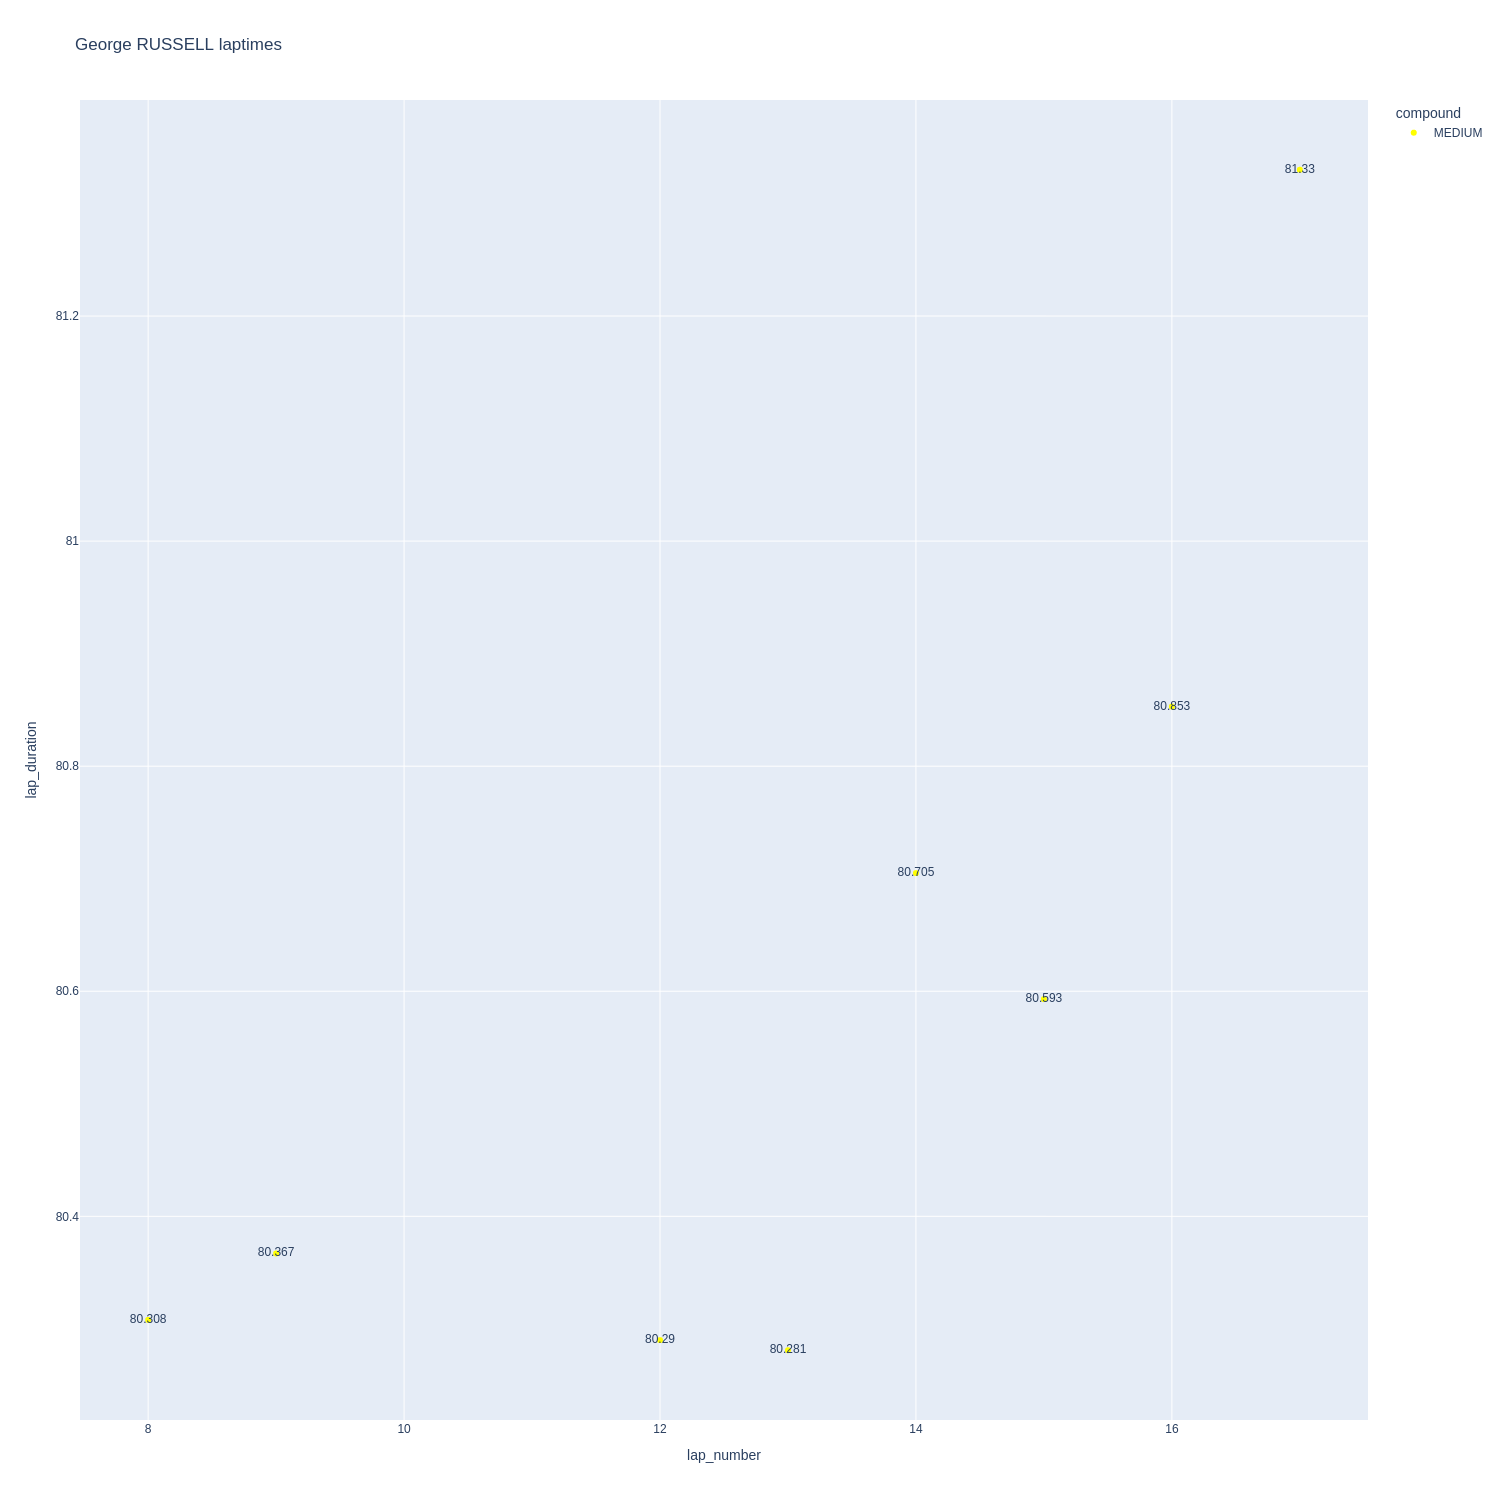

In [1086]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

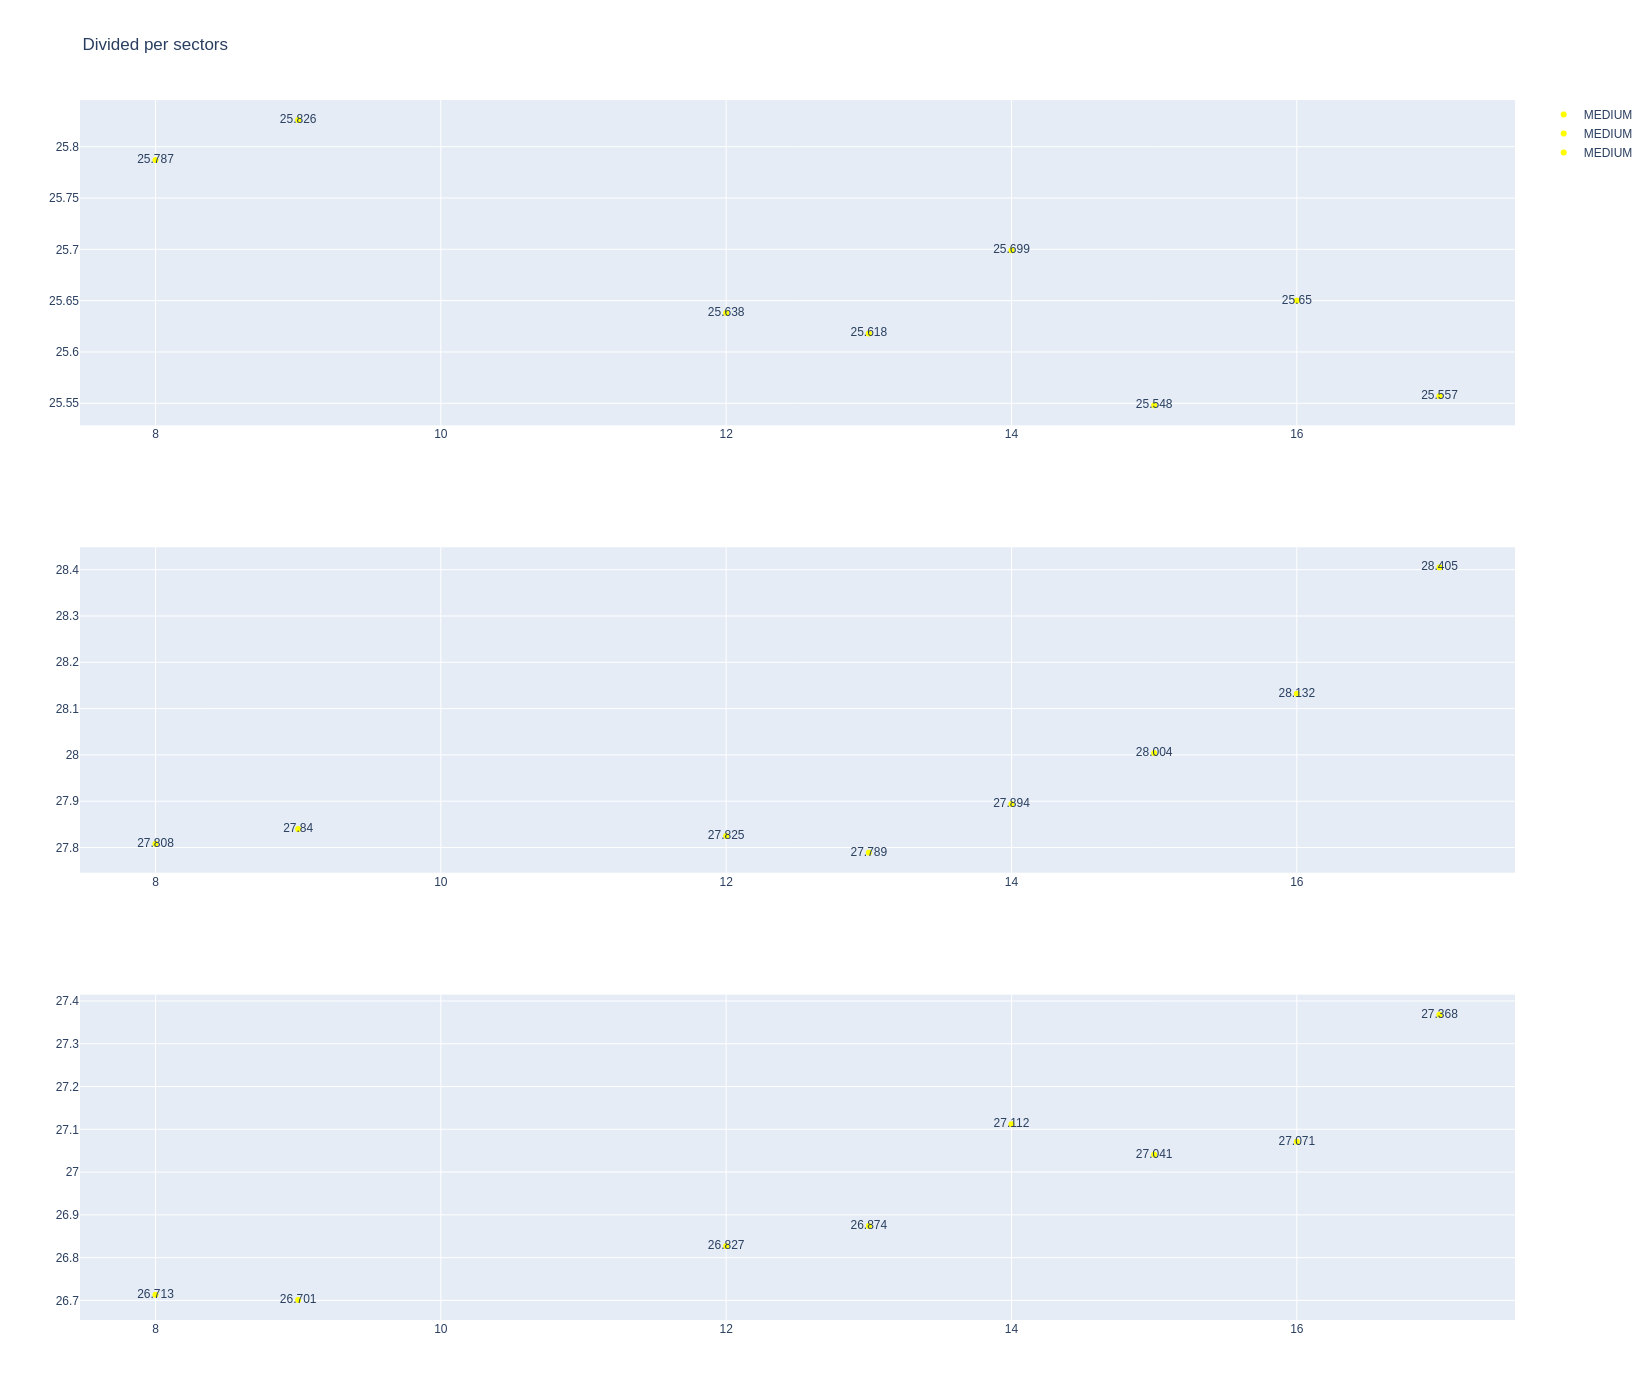

In [1087]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1088]:
data = libraryDataF1.getinfolongruns(jointables2,12,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
281  Kimi ANTONELLI   MEDIUM  2025-05-16T15:40:38.931000+00:00          14   
297  Kimi ANTONELLI   MEDIUM  2025-05-16T15:41:59.442000+00:00          15   
313  Kimi ANTONELLI   MEDIUM  2025-05-16T15:43:19.801000+00:00          16   
331  Kimi ANTONELLI   MEDIUM  2025-05-16T15:44:40.130000+00:00          17   
348  Kimi ANTONELLI   MEDIUM  2025-05-16T15:46:00.169000+00:00          18   
367  Kimi ANTONELLI   MEDIUM  2025-05-16T15:47:20.161000+00:00          19   
386  Kimi ANTONELLI   MEDIUM  2025-05-16T15:48:40.334000+00:00          20   
406  Kimi ANTONELLI   MEDIUM  2025-05-16T15:50:00.647000+00:00          21   
478  Kimi ANTONELLI   MEDIUM  2025-05-16T15:59:52.176000+00:00          25   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
281             25.859             27.846             26.830        80.535  
297             25.620             27.783             26.919        80.322  
313             25.547             27.891             26.846        80.284  
331             25.438             27.817             26.813        80.068  
348             25.421             27.778             26.819        80.018  
367             25.437             27.869             26.896        80.202  
386             25.586             27.742             26.949        80.277  
406             25.625             27.836             27.007        80.468  
478             25.364             27.774             26.759        79.897

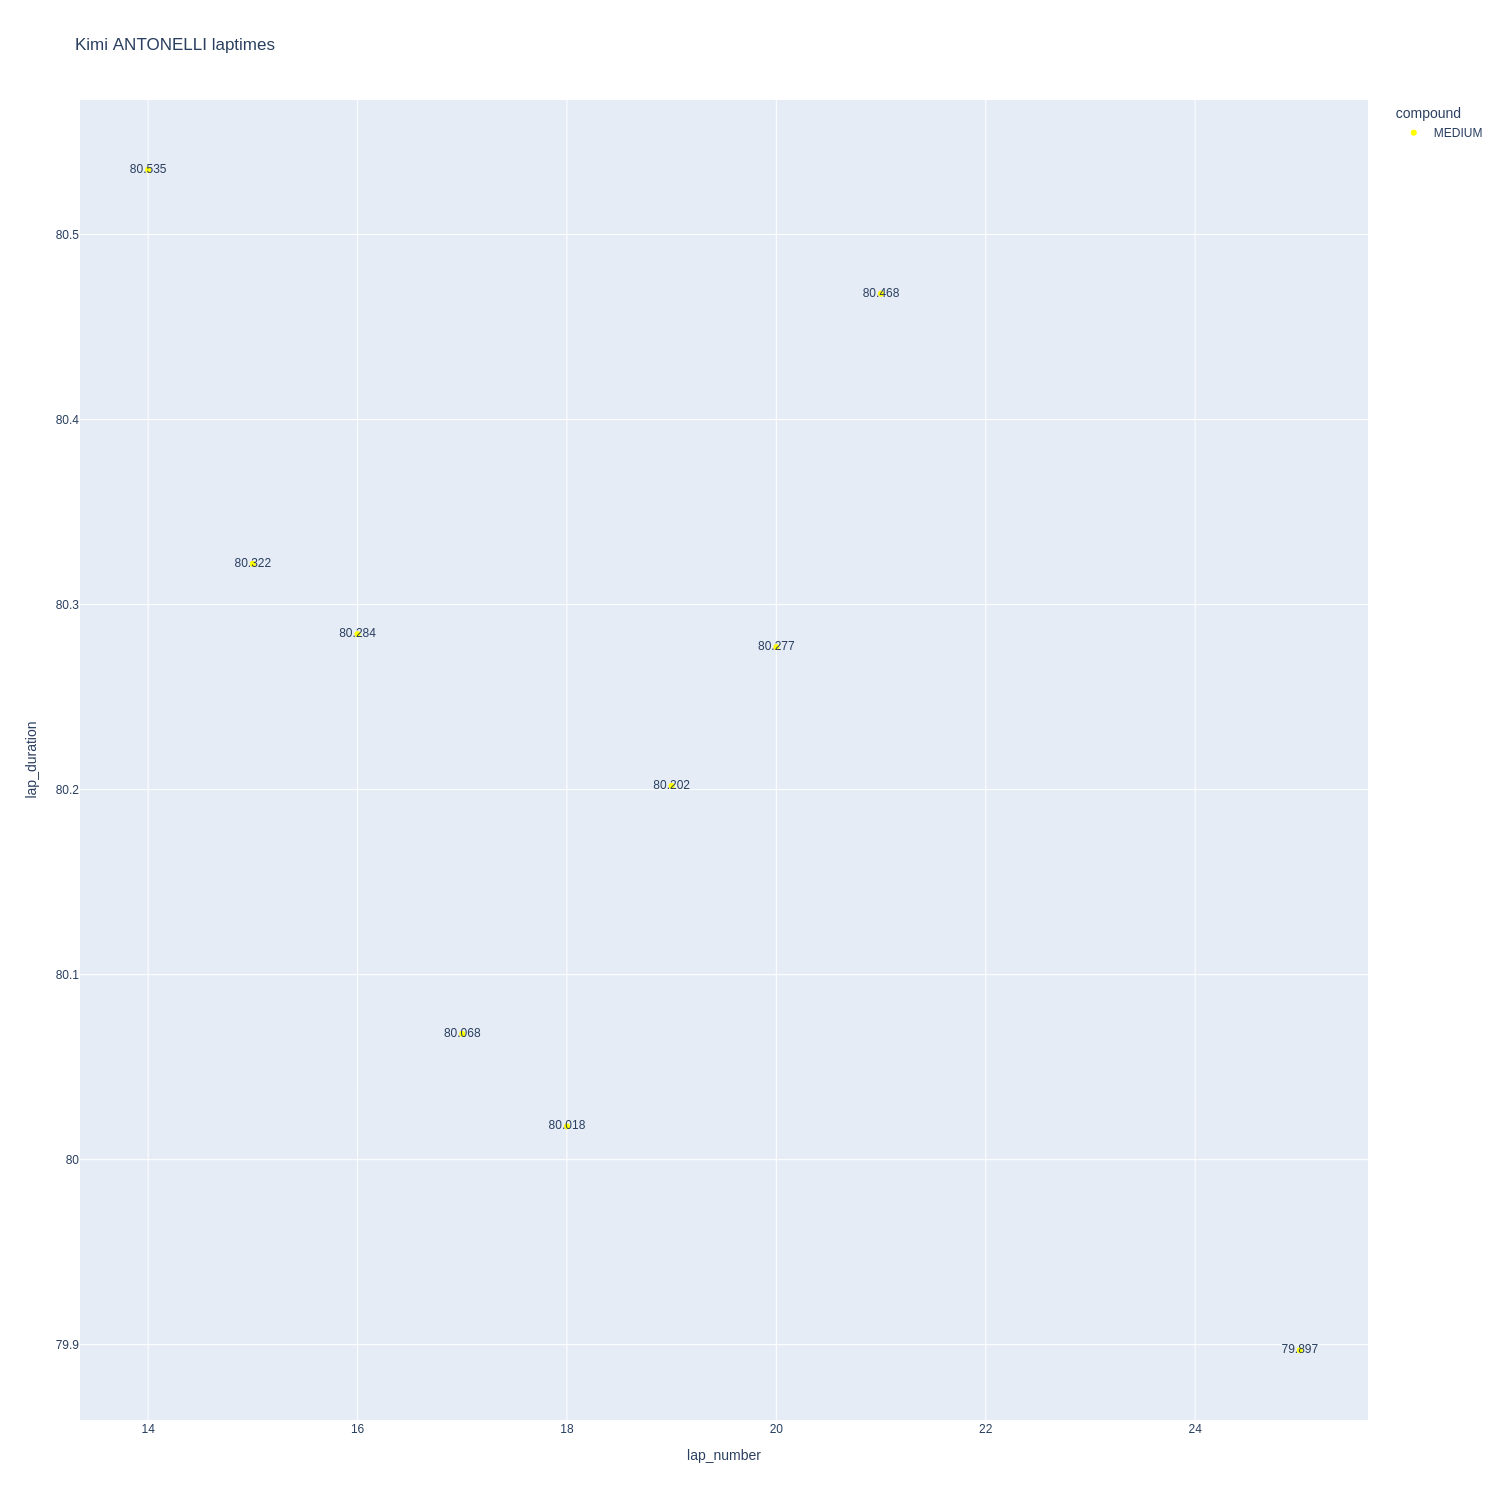

In [1089]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

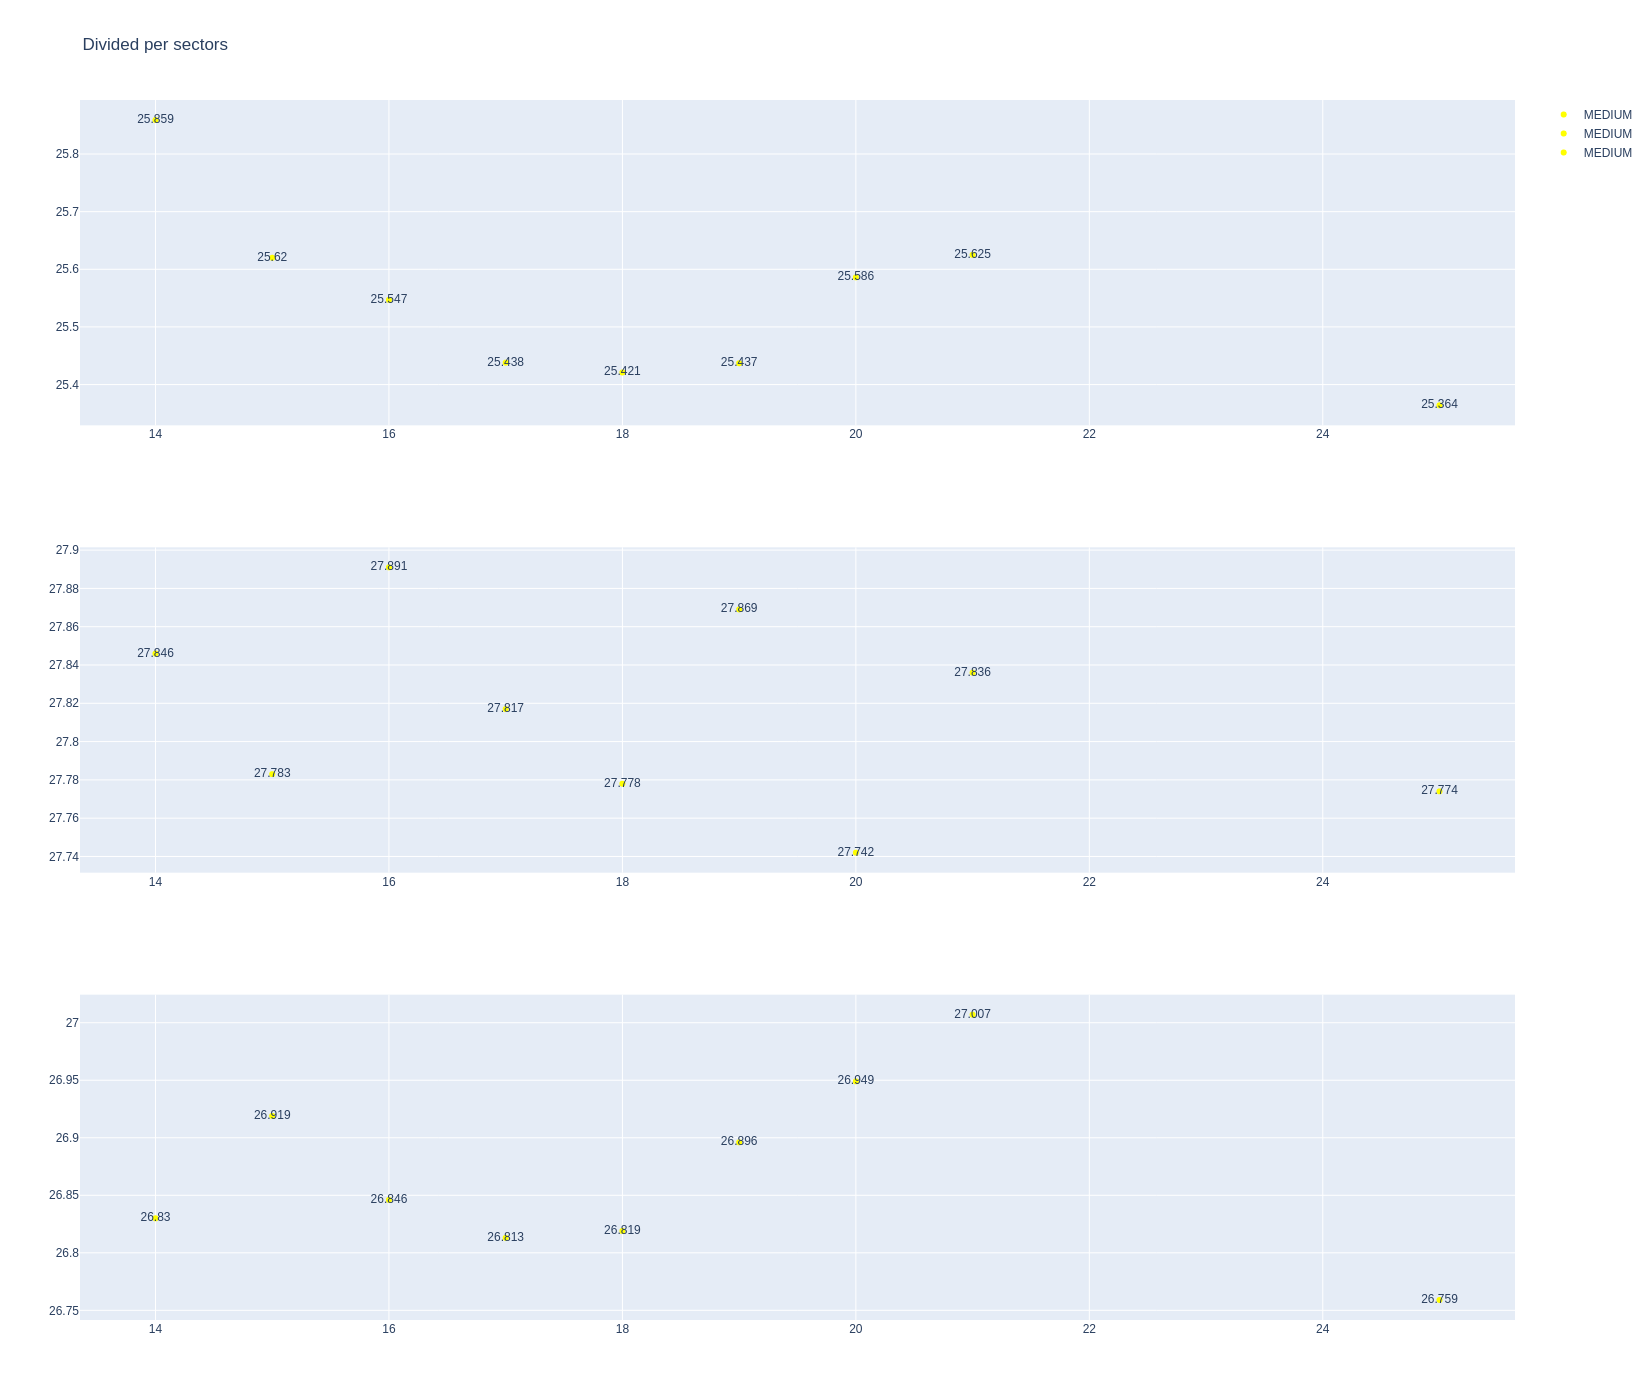

In [1090]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [1091]:
stintInformation.query('driver_number == 81 or driver_number == 4')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
10         1260         9981             1              4          1        7   
17         1260         9981             1             81          1        9   
39         1260         9981             2              4          8       13   
45         1260         9981             2             81         10       12   
61         1260         9981             3             81         13       15   
69         1260         9981             3              4         14       22   
79         1260         9981             4             81         16       25   
91         1260         9981             4              4         23       26   
99         1260         9981             5             81         26       29   

   compound  tyre_age_at_start  
10   MEDIUM                  0  
17   MEDIUM                  0  
39     SOFT                  0  
45     SOFT                  0  
61     SOFT                  3  
69   MEDIUM                  6  
79   MEDIUM                  8  
91     SOFT                  6  
99     SOFT                  6

In [1092]:
data = libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
224  Lando NORRIS     SOFT  2025-05-16T15:30:08.206000+00:00          11   
308  Lando NORRIS   MEDIUM  2025-05-16T15:42:59.317000+00:00          14   
325  Lando NORRIS   MEDIUM  2025-05-16T15:44:19.505000+00:00          15   
361  Lando NORRIS   MEDIUM  2025-05-16T15:47:01.733000+00:00          17   
380  Lando NORRIS   MEDIUM  2025-05-16T15:48:21.584000+00:00          18   
400  Lando NORRIS   MEDIUM  2025-05-16T15:49:41.553000+00:00          19   
419  Lando NORRIS   MEDIUM  2025-05-16T15:51:01.491000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
224             23.953             25.937             29.934        79.824  
308             25.581             27.844             26.737        80.162  
325             25.418             27.792             26.883        80.093  
361             25.448             27.663             26.763        79.874  
380             25.436             27.595             26.756        79.787  
400             25.310             28.034             26.754        80.098  
419             25.342             27.747             26.882        79.971

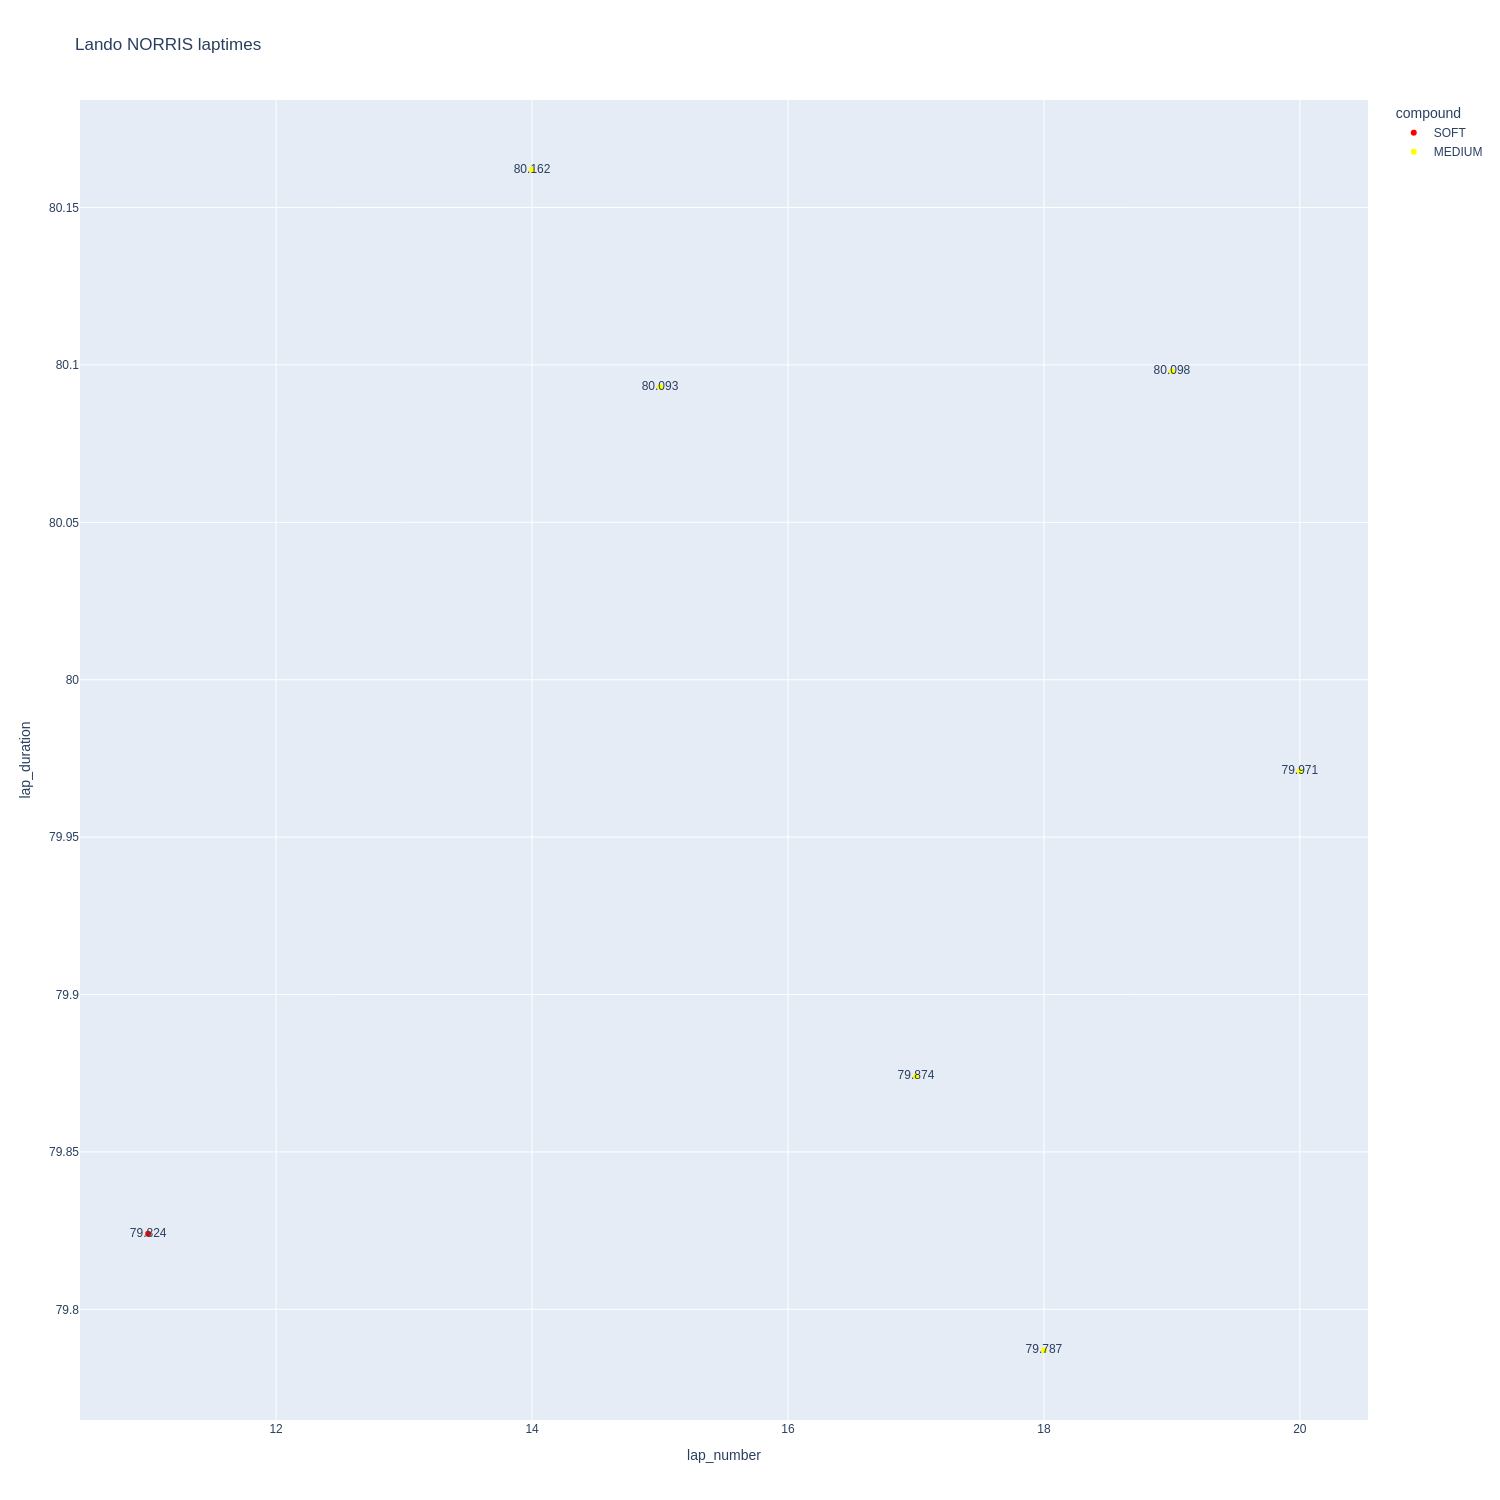

In [1093]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

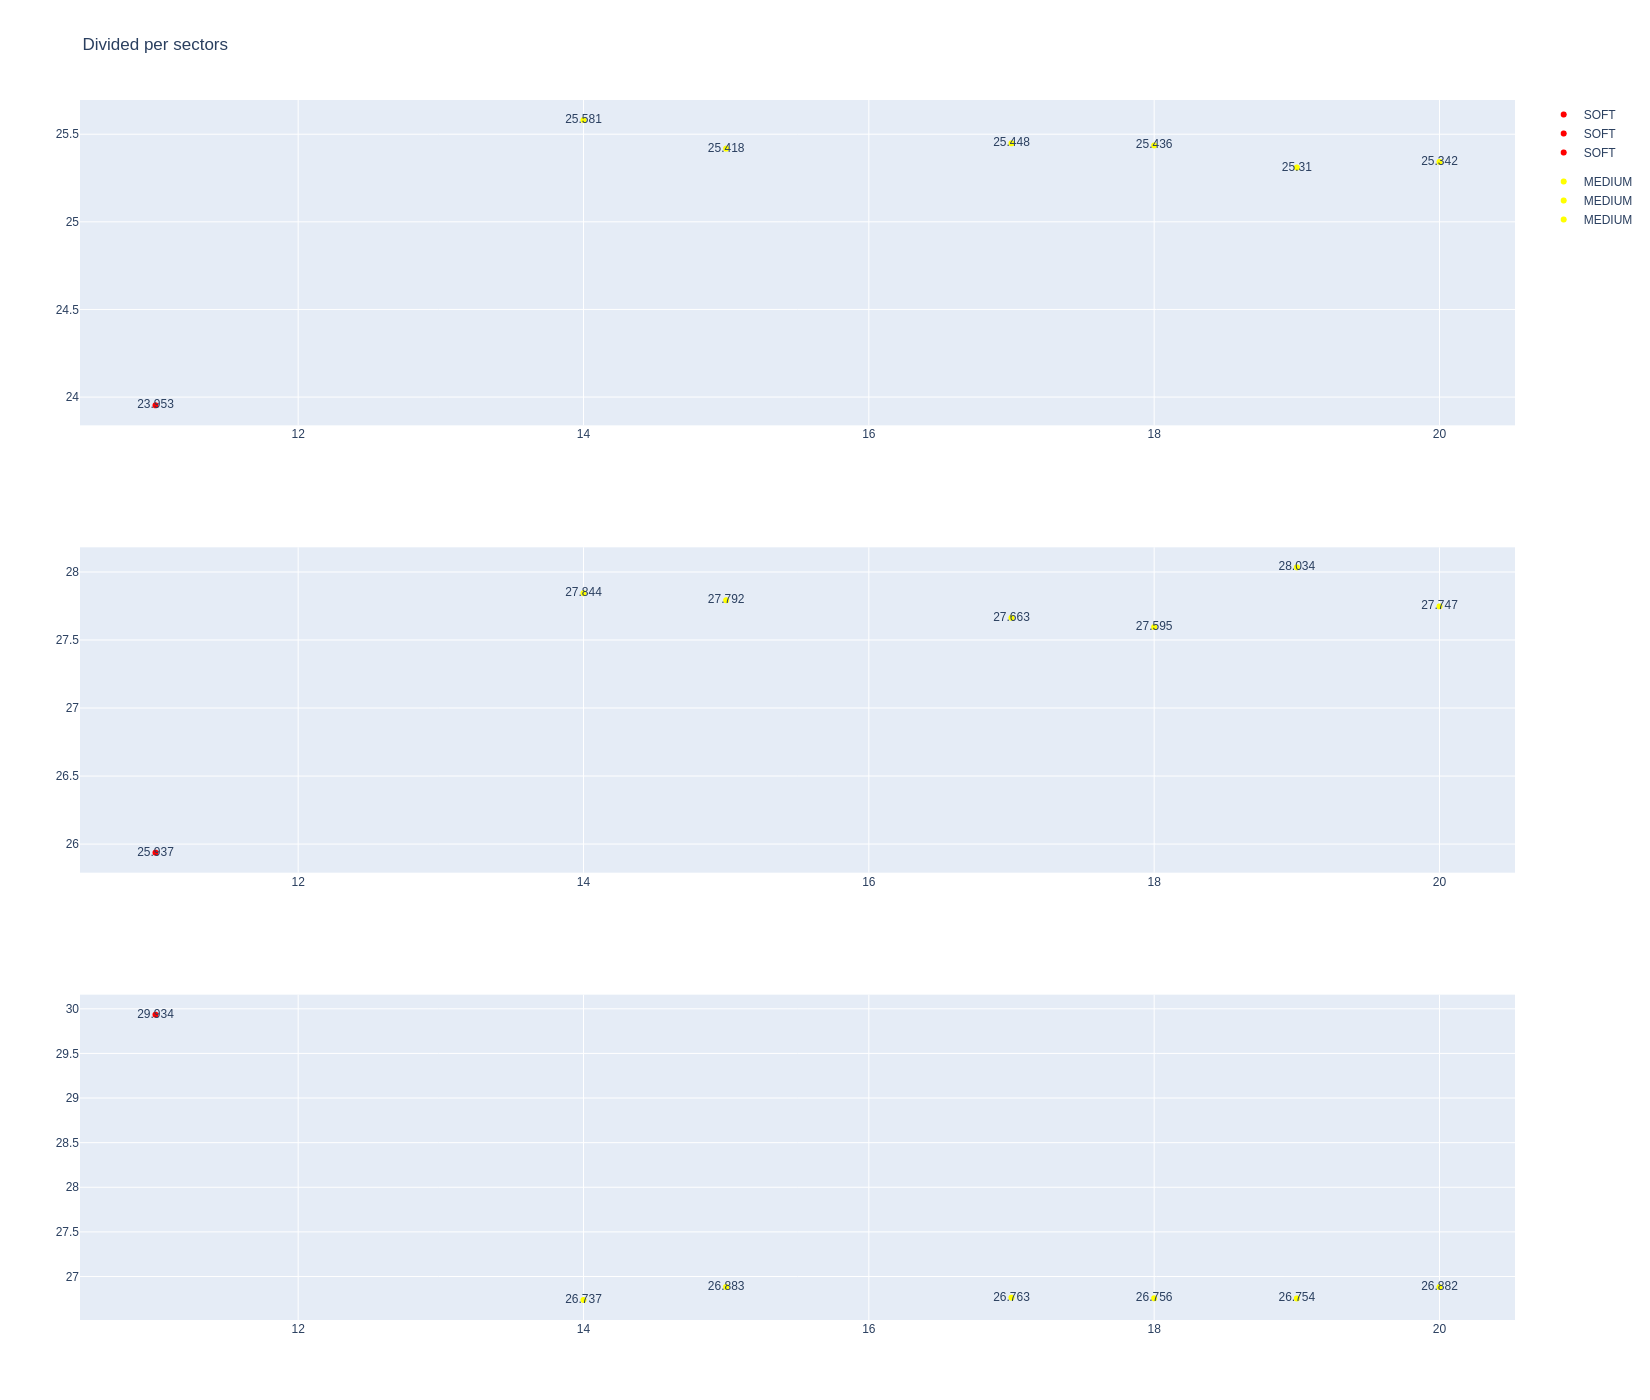

In [1094]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1095]:
data = libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
294  Oscar PIASTRI   MEDIUM  2025-05-16T15:41:44.895000+00:00          16   
310  Oscar PIASTRI   MEDIUM  2025-05-16T15:43:04.707000+00:00          17   
327  Oscar PIASTRI   MEDIUM  2025-05-16T15:44:24.427000+00:00          18   
344  Oscar PIASTRI   MEDIUM  2025-05-16T15:45:44.137000+00:00          19   
363  Oscar PIASTRI   MEDIUM  2025-05-16T15:47:04.608000+00:00          20   
381  Oscar PIASTRI   MEDIUM  2025-05-16T15:48:24.771000+00:00          21   
401  Oscar PIASTRI   MEDIUM  2025-05-16T15:49:45.381000+00:00          22   
420  Oscar PIASTRI   MEDIUM  2025-05-16T15:51:05.460000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
294             25.602             27.621             26.688        79.911  
310             25.480             27.581             26.565        79.626  
327             25.258             27.670             26.893        79.821  
344             25.504             27.814             27.095        80.413  
363             25.191             27.956             27.001        80.148  
381             25.567             27.919             27.023        80.509  
401             25.521             27.720             26.938        80.179  
420             25.261             27.726             26.748        79.735

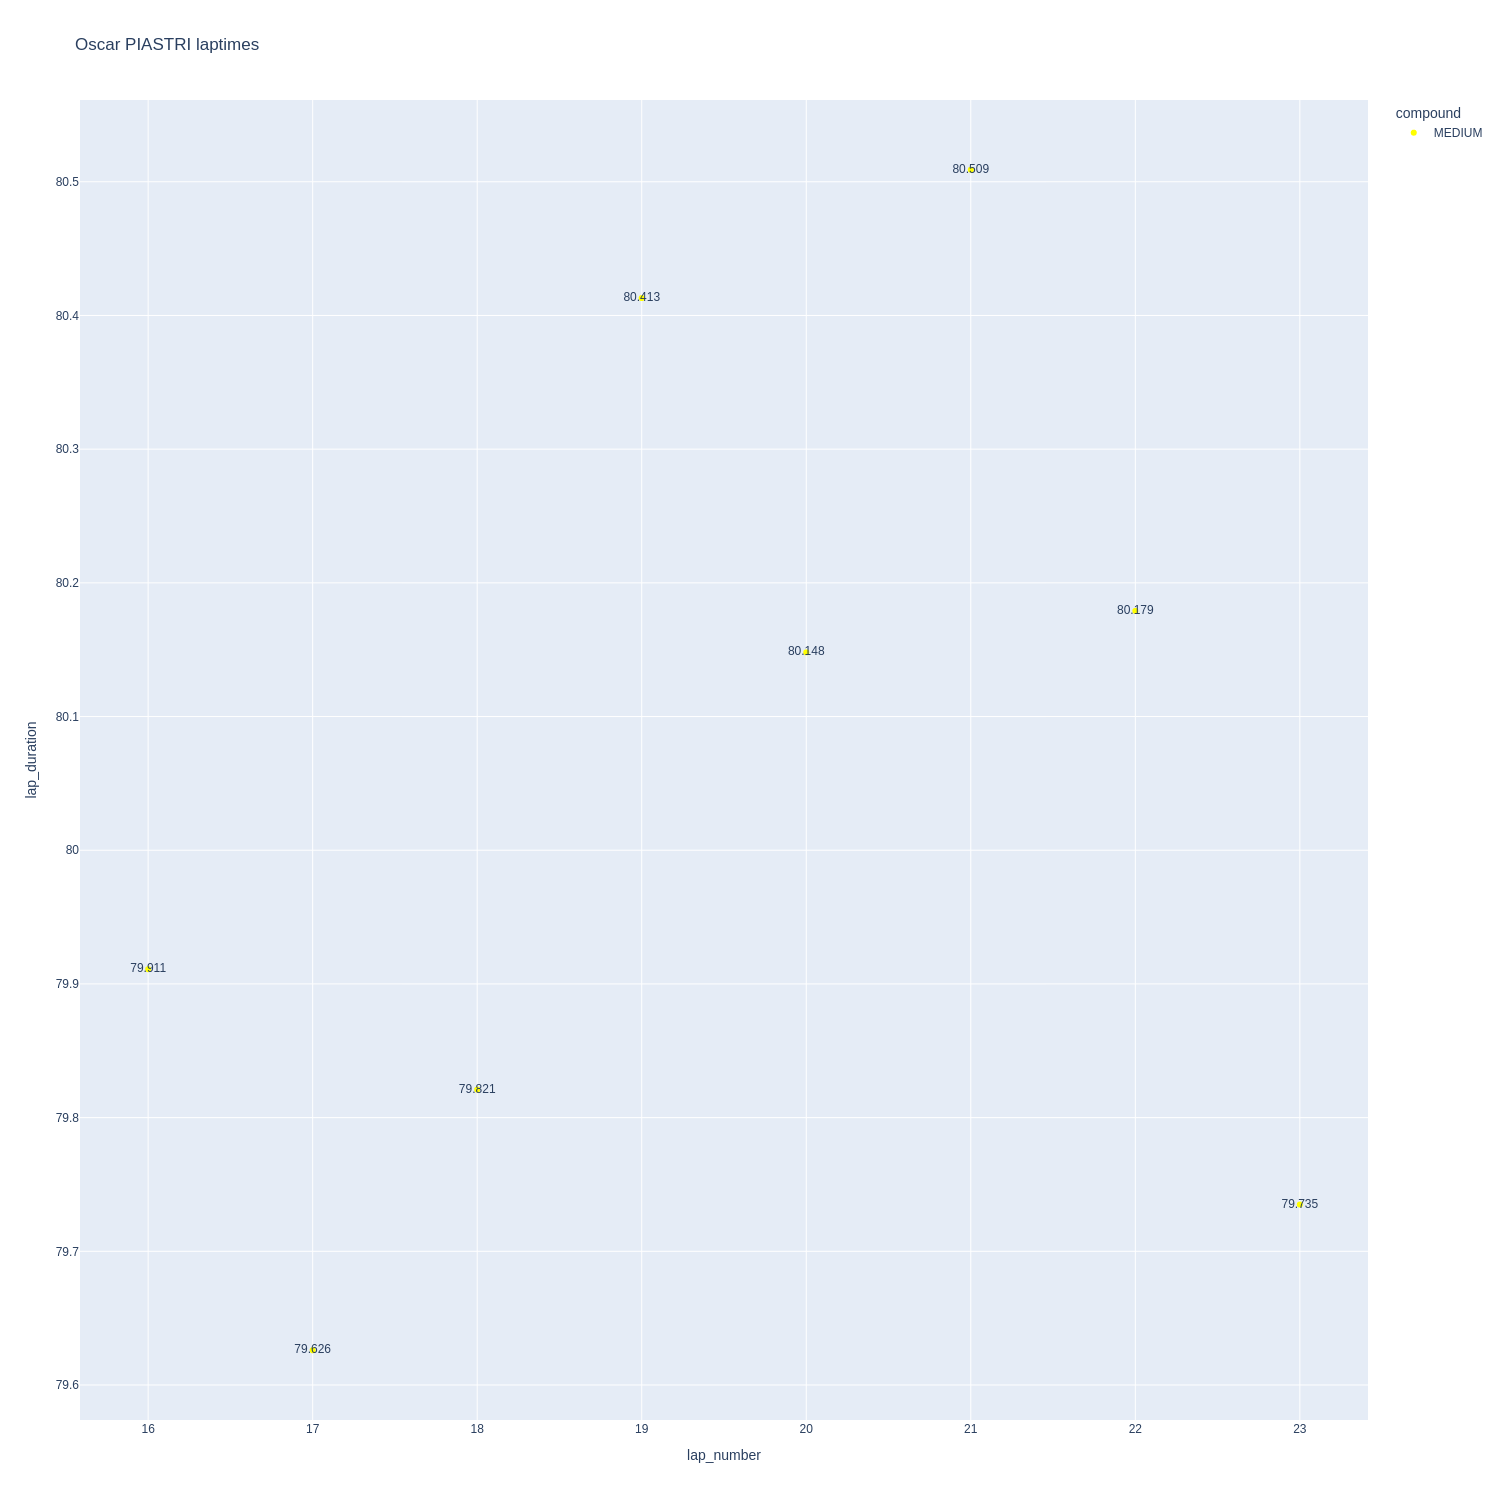

In [1096]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

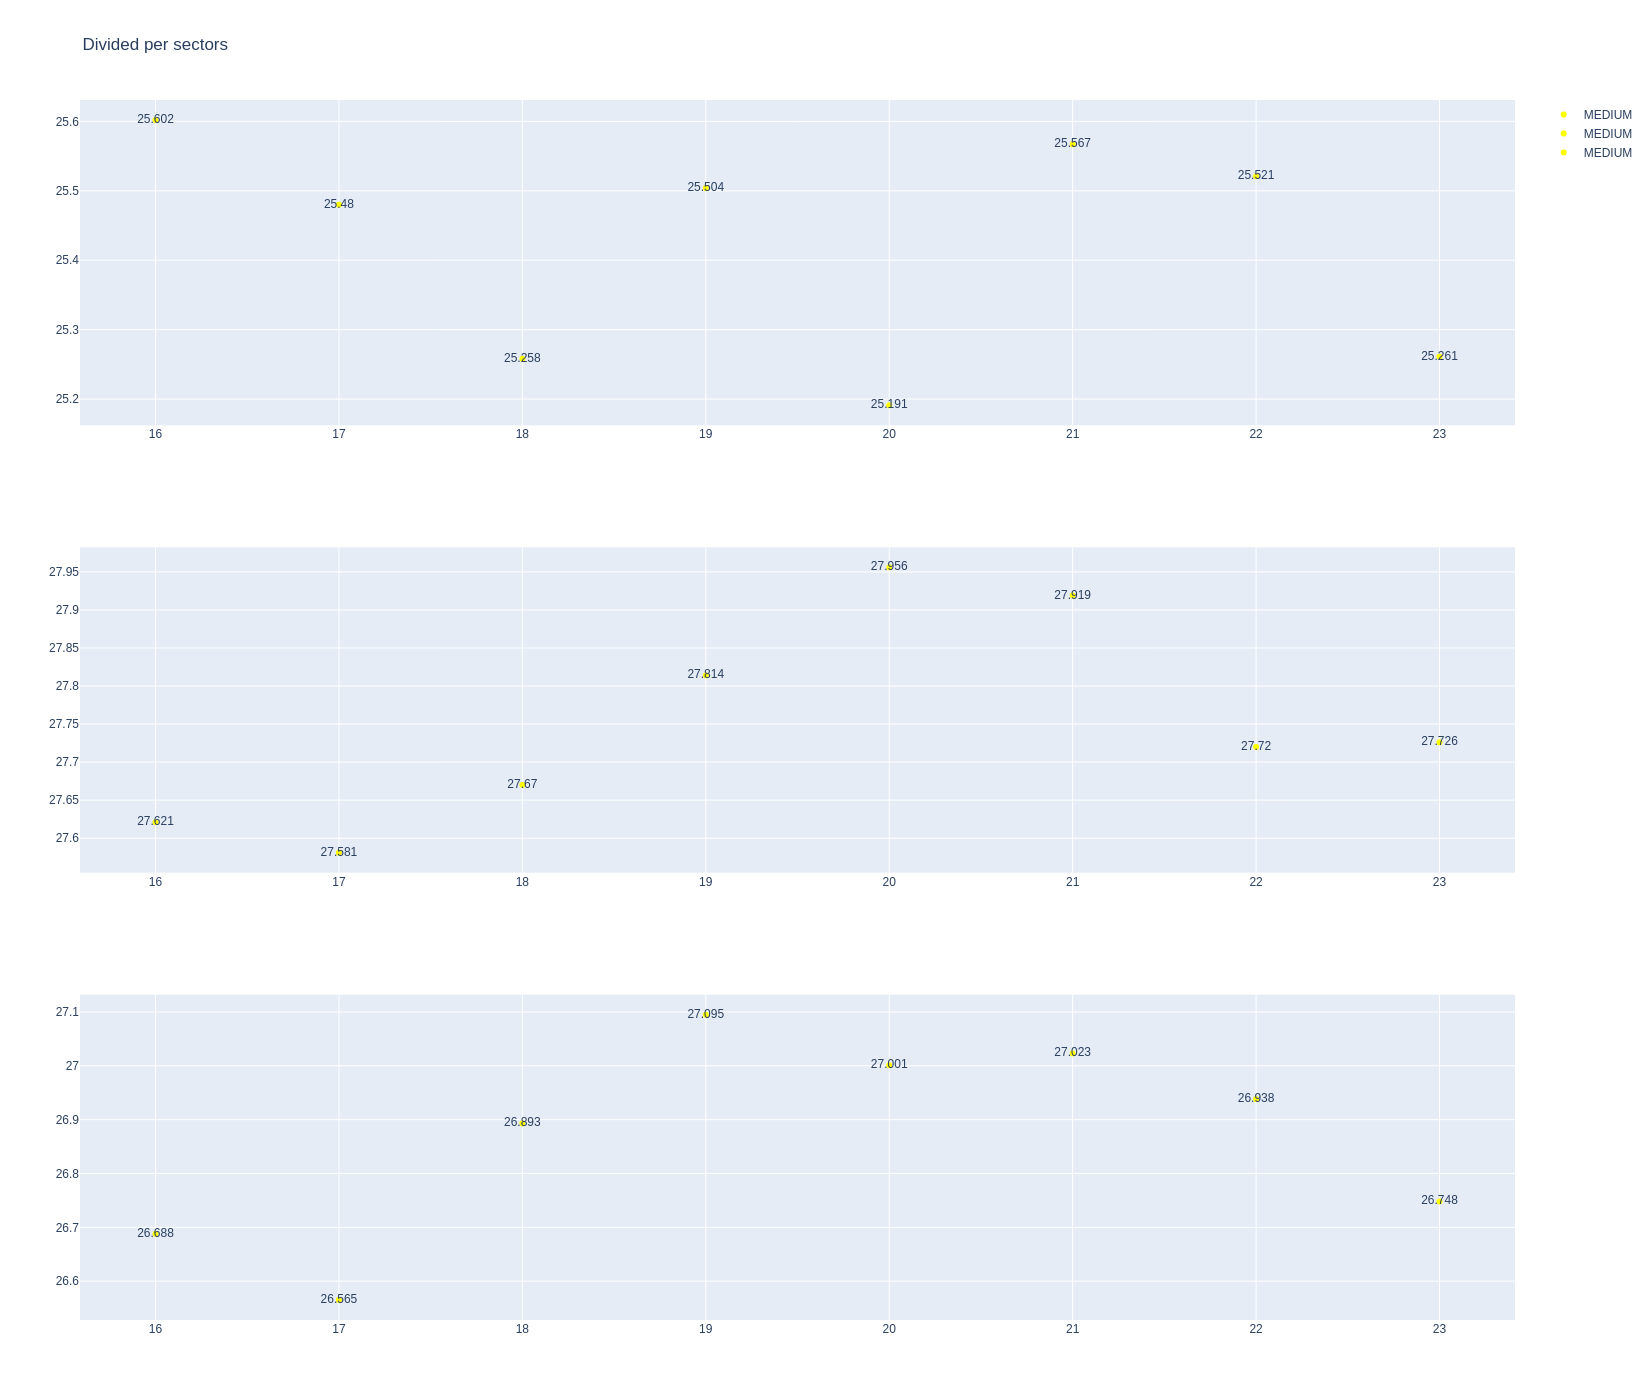

In [1097]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [1098]:
stintInformation.query('driver_number == 18 or driver_number == 14')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
13         1260         9981             1             18          1        8   
14         1260         9981             1             14          1        9   
41         1260         9981             2             18          9       11   
43         1260         9981             2             14         10       12   
58         1260         9981             3             18         12       14   
60         1260         9981             3             14         13       15   
74         1260         9981             4             18         15       21   
77         1260         9981             4             14         16       19   
86         1260         9981             5             14         20       22   
88         1260         9981             5             18         22       24   

   compound  tyre_age_at_start  
13   MEDIUM                  0  
14     SOFT                  0  
41     SOFT                  0  
43     SOFT                  8  
58     SOFT                  7  
60   MEDIUM                  0  
74   MEDIUM                  7  
77   MEDIUM                  3  
86   MEDIUM                  6  
88   MEDIUM                 13

In [1099]:
data = libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
411  Fernando ALONSO   MEDIUM  2025-05-16T15:50:23.319000+00:00          16   
431  Fernando ALONSO   MEDIUM  2025-05-16T15:51:43.945000+00:00          17   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
411             25.700             27.931             27.014        80.645  
431             25.687             28.270             27.143        81.100

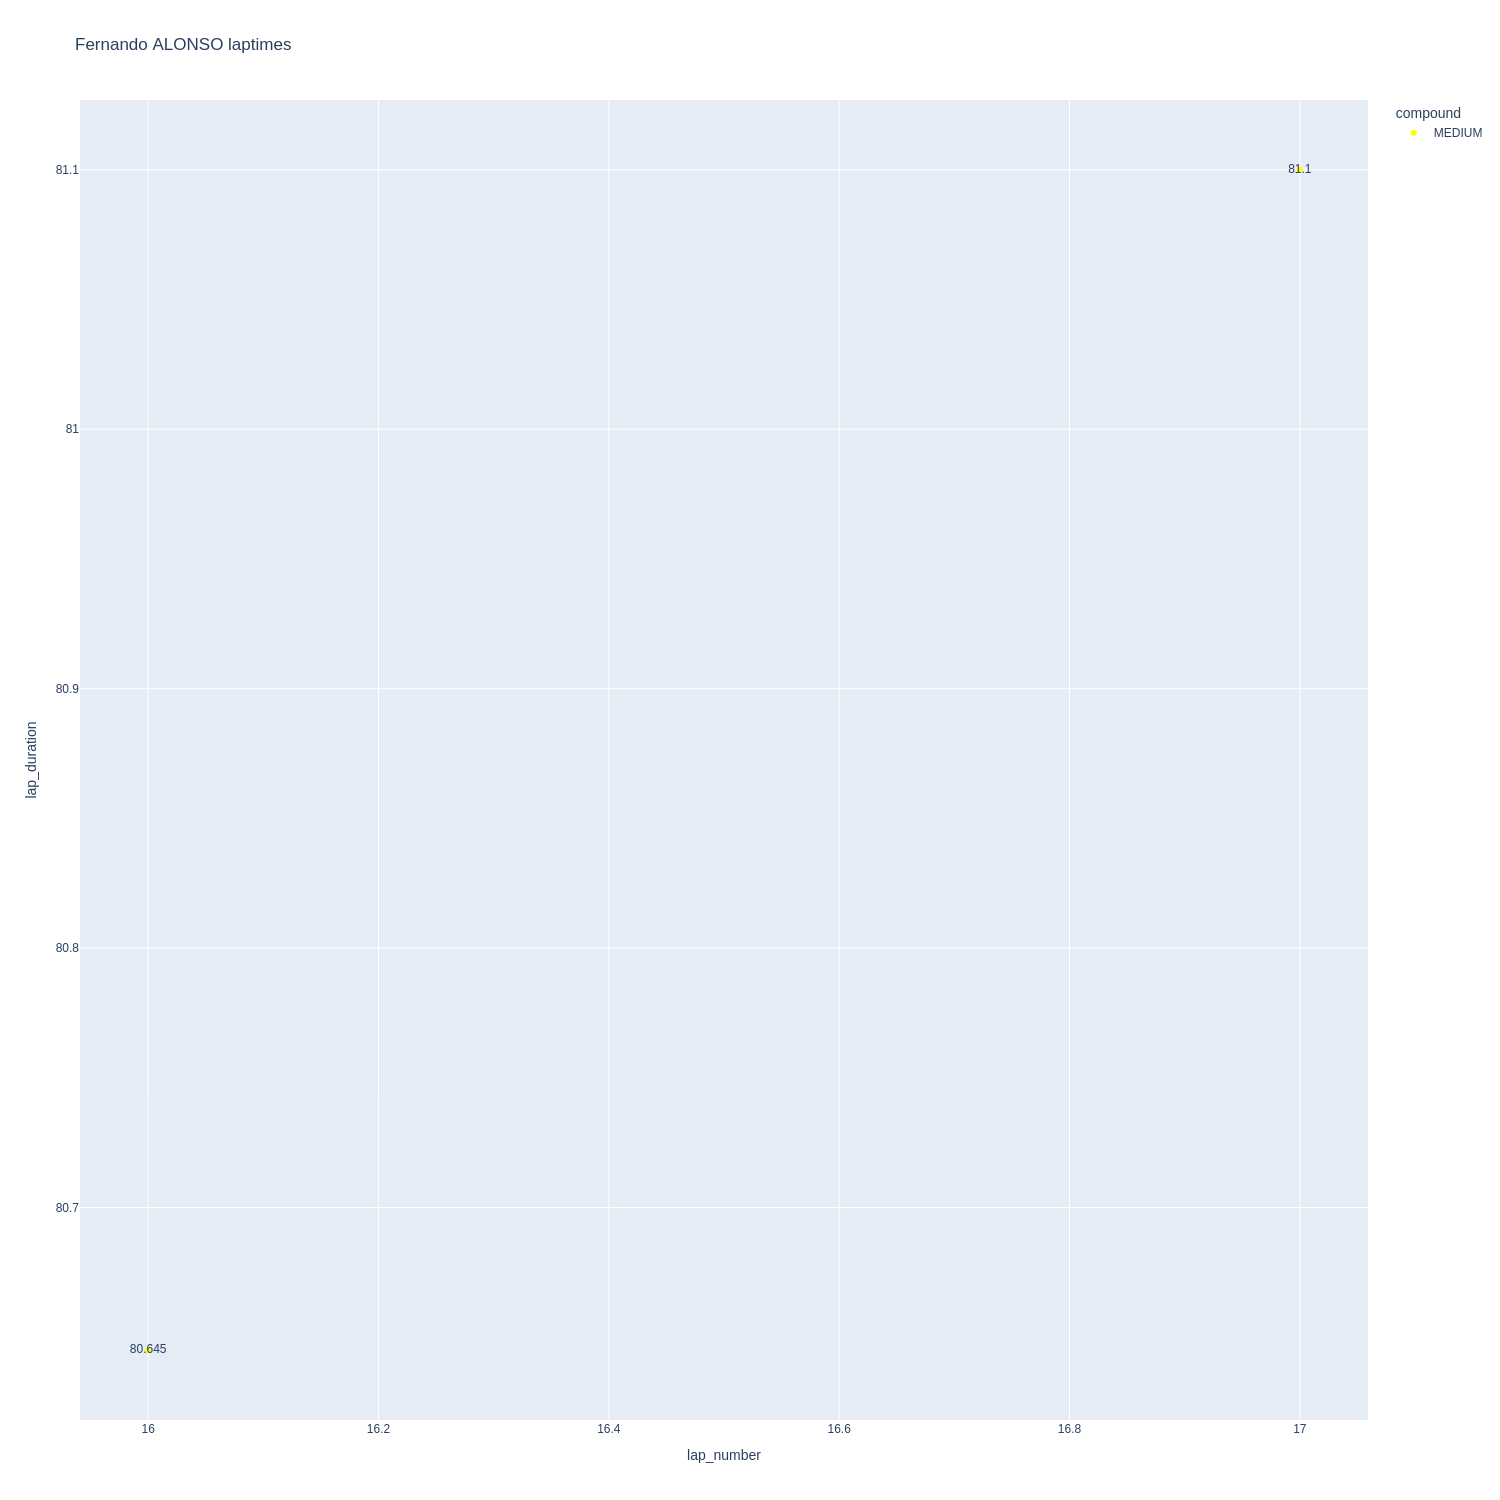

In [1100]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

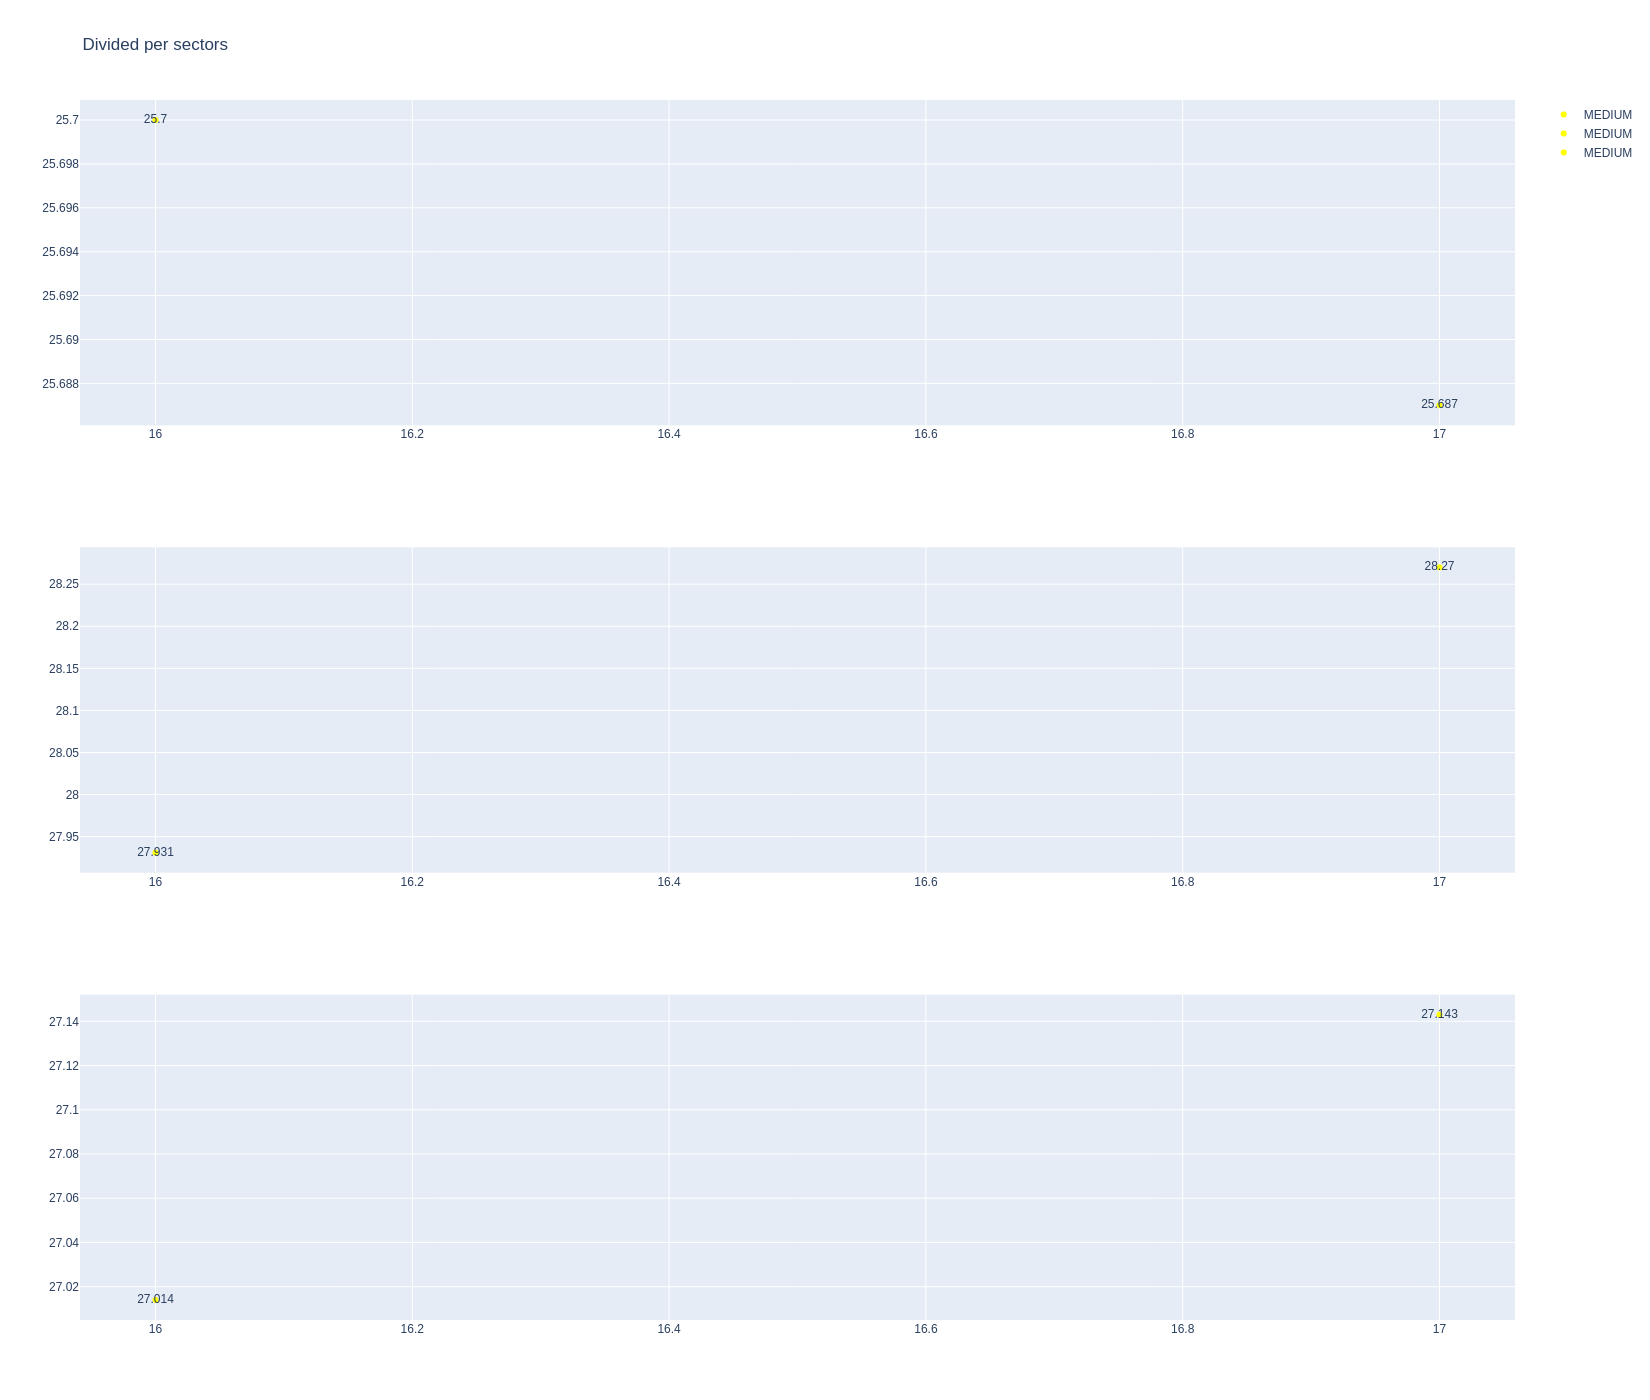

In [1101]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1102]:
data = libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
359  Lance STROLL   MEDIUM  2025-05-16T15:46:54.202000+00:00          16   
378  Lance STROLL   MEDIUM  2025-05-16T15:48:14.568000+00:00          17   
398  Lance STROLL   MEDIUM  2025-05-16T15:49:35.490000+00:00          18   
417  Lance STROLL   MEDIUM  2025-05-16T15:50:56.350000+00:00          19   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
359             25.397             27.975             26.986        80.358  
378             25.876             27.916             27.040        80.832  
398             26.191             27.879             26.856        80.926  
417             25.667             27.813             27.012        80.492

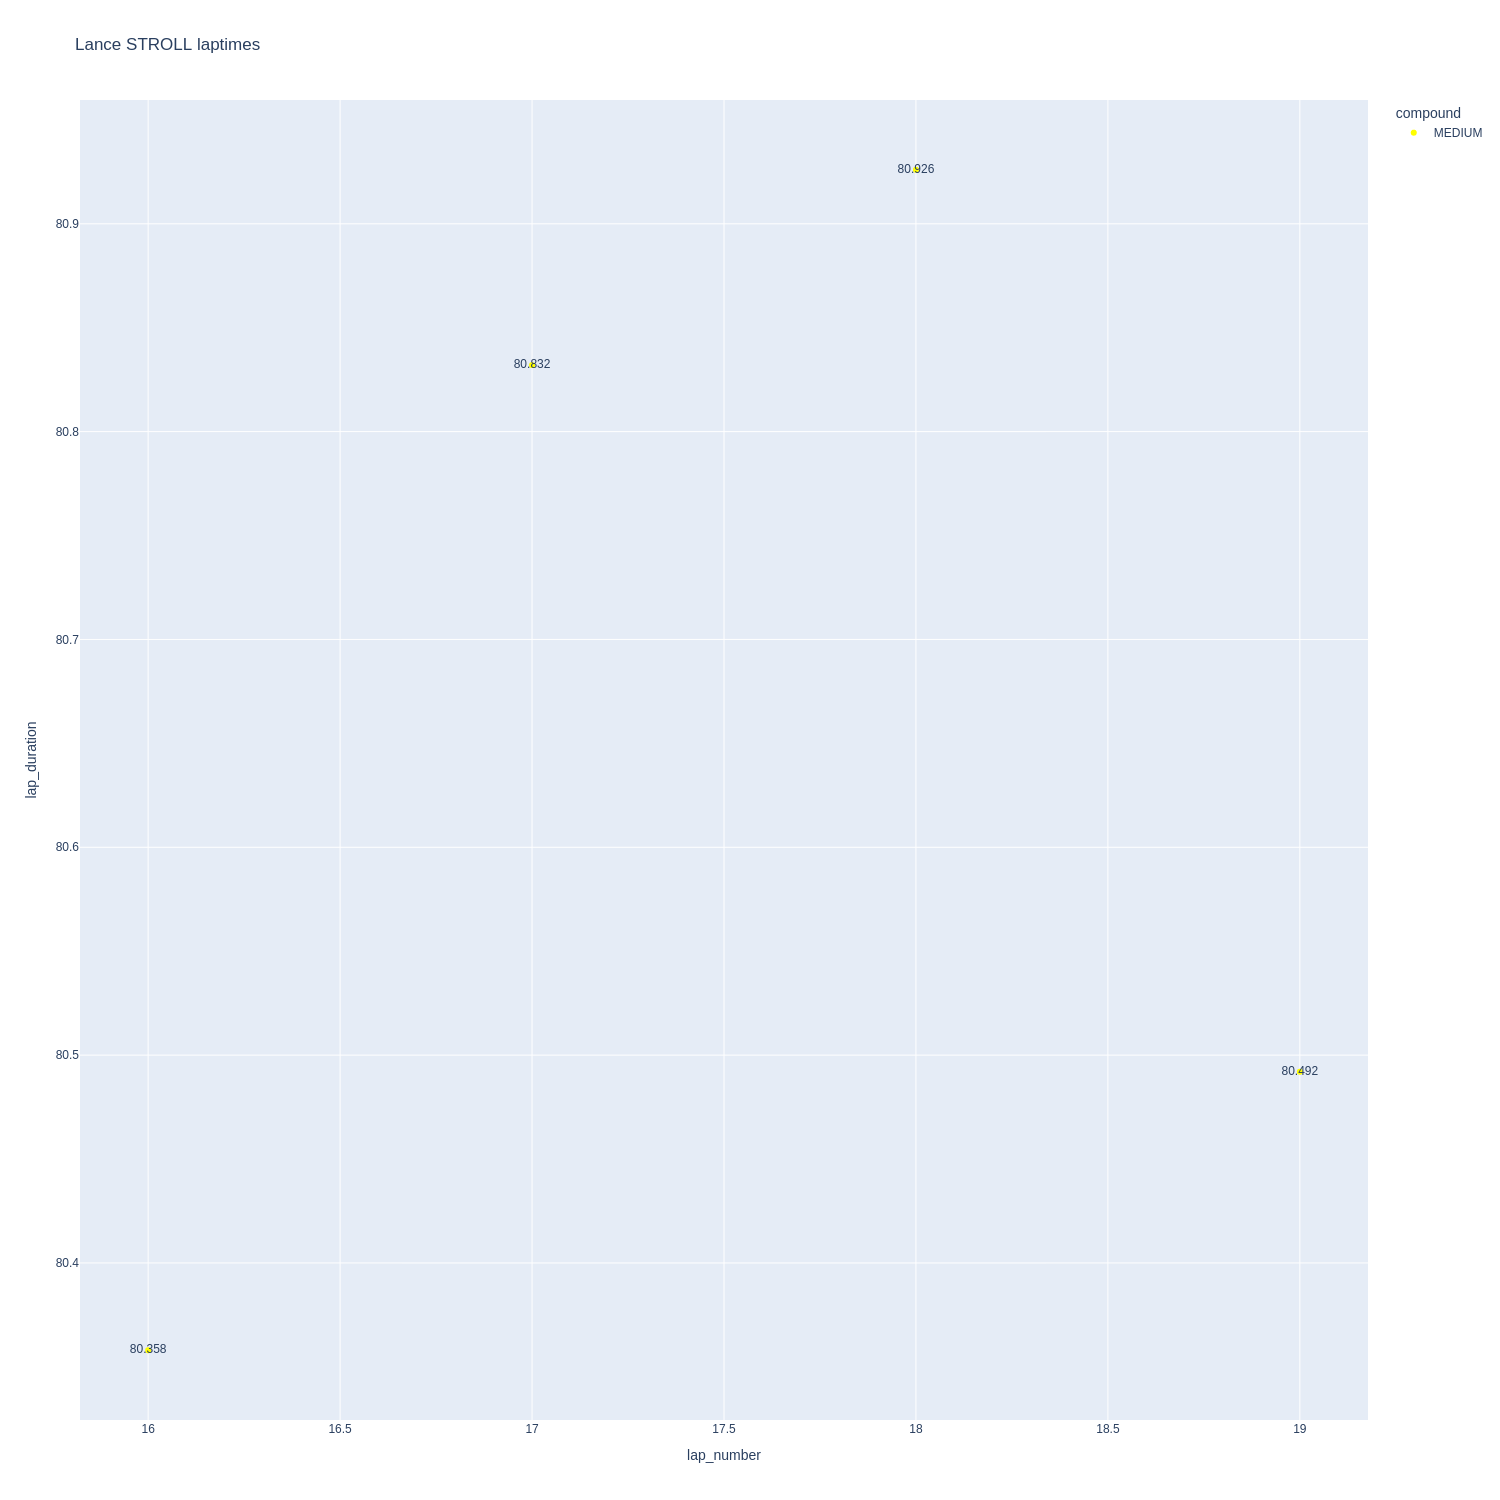

In [1103]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

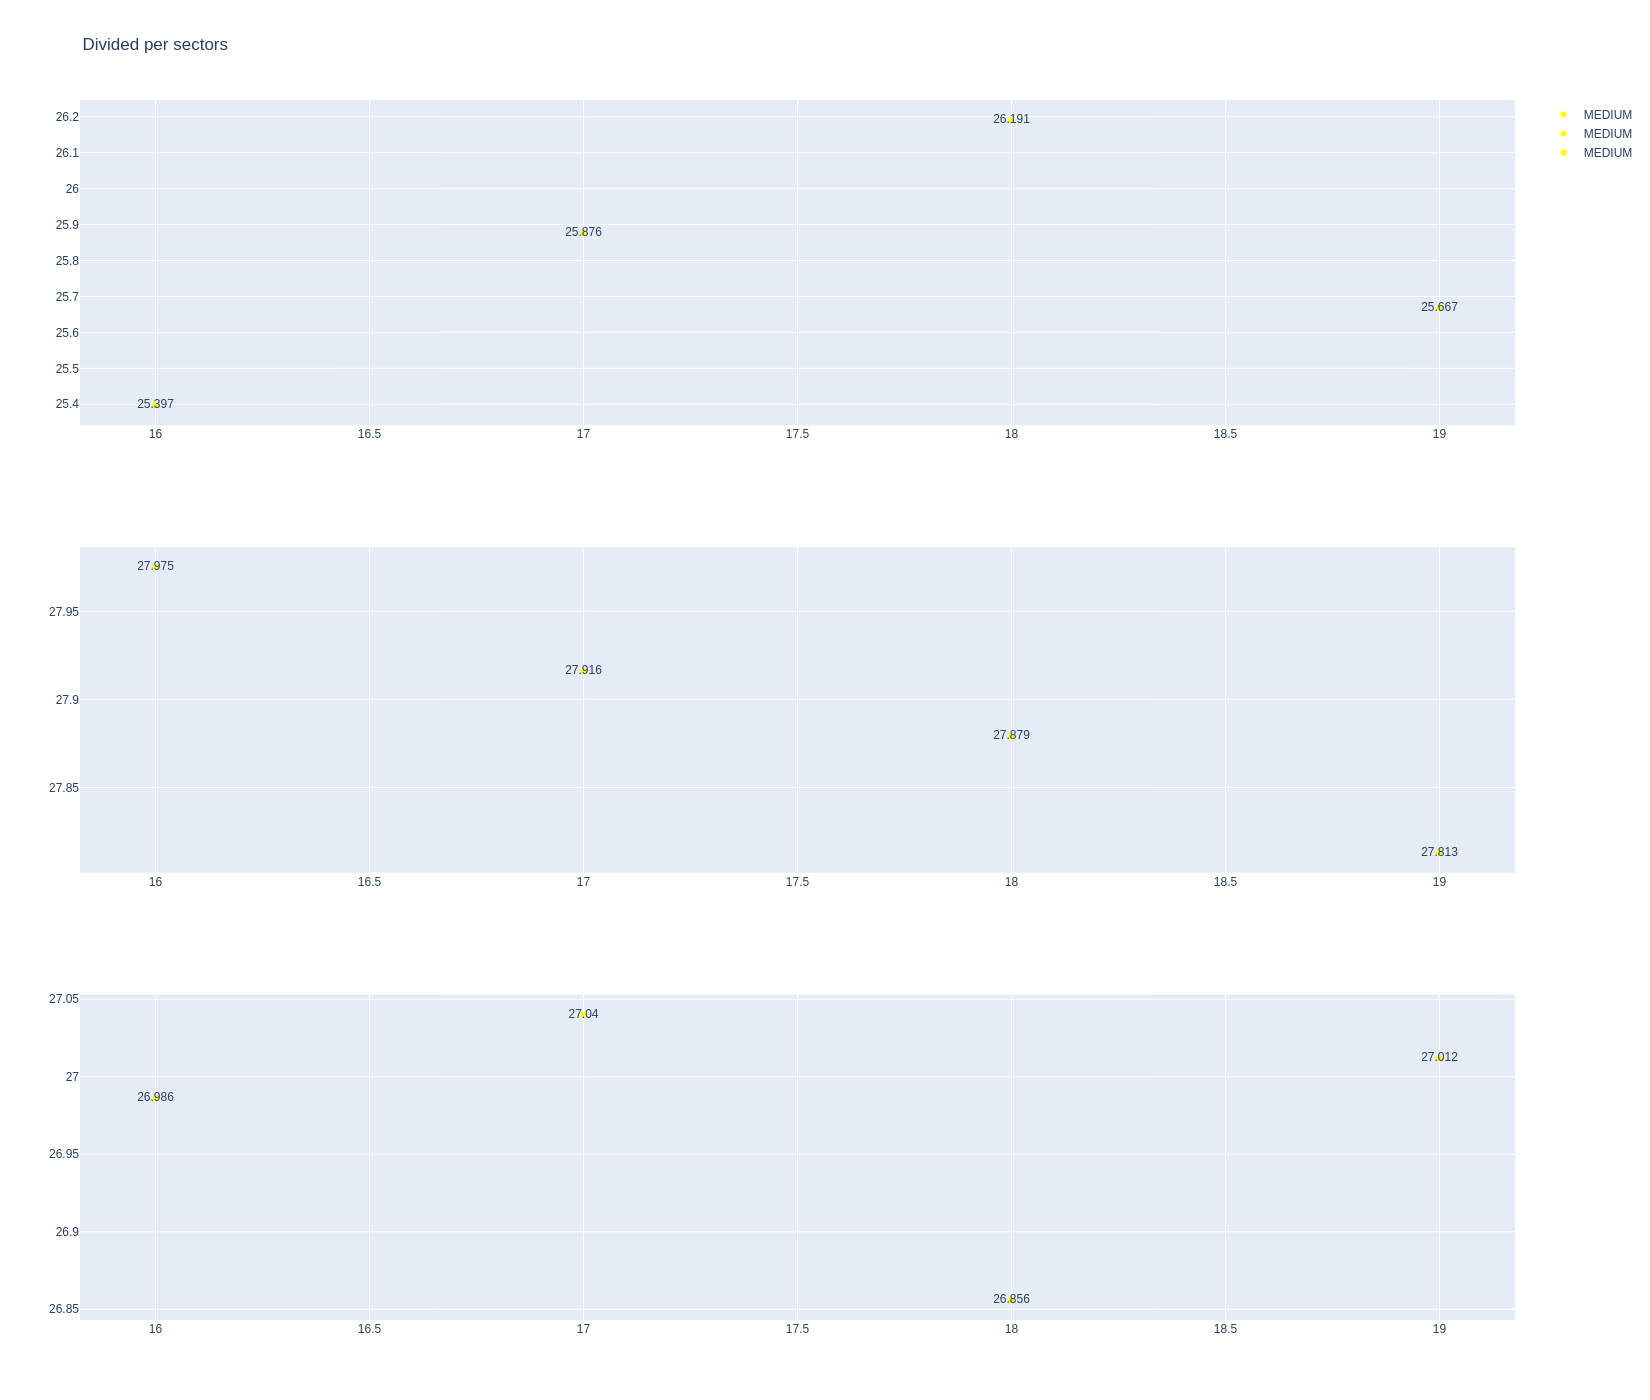

In [1104]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Racing Bulls

In [1105]:
stintInformation.query('driver_number == 6 or driver_number == 30')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
1          1260         9981             1              6          1        4   
4          1260         9981             1             30          1        4   
21         1260         9981             2              6          5        7   
23         1260         9981             2             30          5        7   
32         1260         9981             3              6          8       10   
34         1260         9981             3             30          8       10   
51         1260         9981             4              6         11       13   
53         1260         9981             4             30         11       13   
66         1260         9981             5              6         14       14   
67         1260         9981             5             30         14       14   
73         1260         9981             6             30         15       20   
75         1260         9981             6              6         15       23   
87         1260         9981             7             30         21       23   

   compound  tyre_age_at_start  
1    MEDIUM                  0  
4    MEDIUM                  0  
21   MEDIUM                  3  
23   MEDIUM                  3  
32     SOFT                  0  
34     SOFT                  0  
51     SOFT                  0  
53     SOFT                  3  
66   MEDIUM                  6  
67   MEDIUM                  6  
73   MEDIUM                  0  
75   MEDIUM                  0  
87   MEDIUM                  0

In [1106]:
data = libraryDataF1.getinfolongruns(jointables2,6,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
318  Isack HADJAR   MEDIUM  2025-05-16T15:43:47.989000+00:00          16   
336  Isack HADJAR   MEDIUM  2025-05-16T15:45:08.588000+00:00          17   
354  Isack HADJAR   MEDIUM  2025-05-16T15:46:29.044000+00:00          18   
373  Isack HADJAR   MEDIUM  2025-05-16T15:47:49.489000+00:00          19   
393  Isack HADJAR   MEDIUM  2025-05-16T15:49:10.053000+00:00          20   
413  Isack HADJAR   MEDIUM  2025-05-16T15:50:29.850000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
318             25.751             27.830             26.976        80.557  
336             25.449             27.948             27.037        80.434  
354             25.424             27.946             27.022        80.392  
373             25.363             27.992             27.204        80.559  
393             25.316             27.676             26.917        79.909  
413             25.398             27.744             27.113        80.255

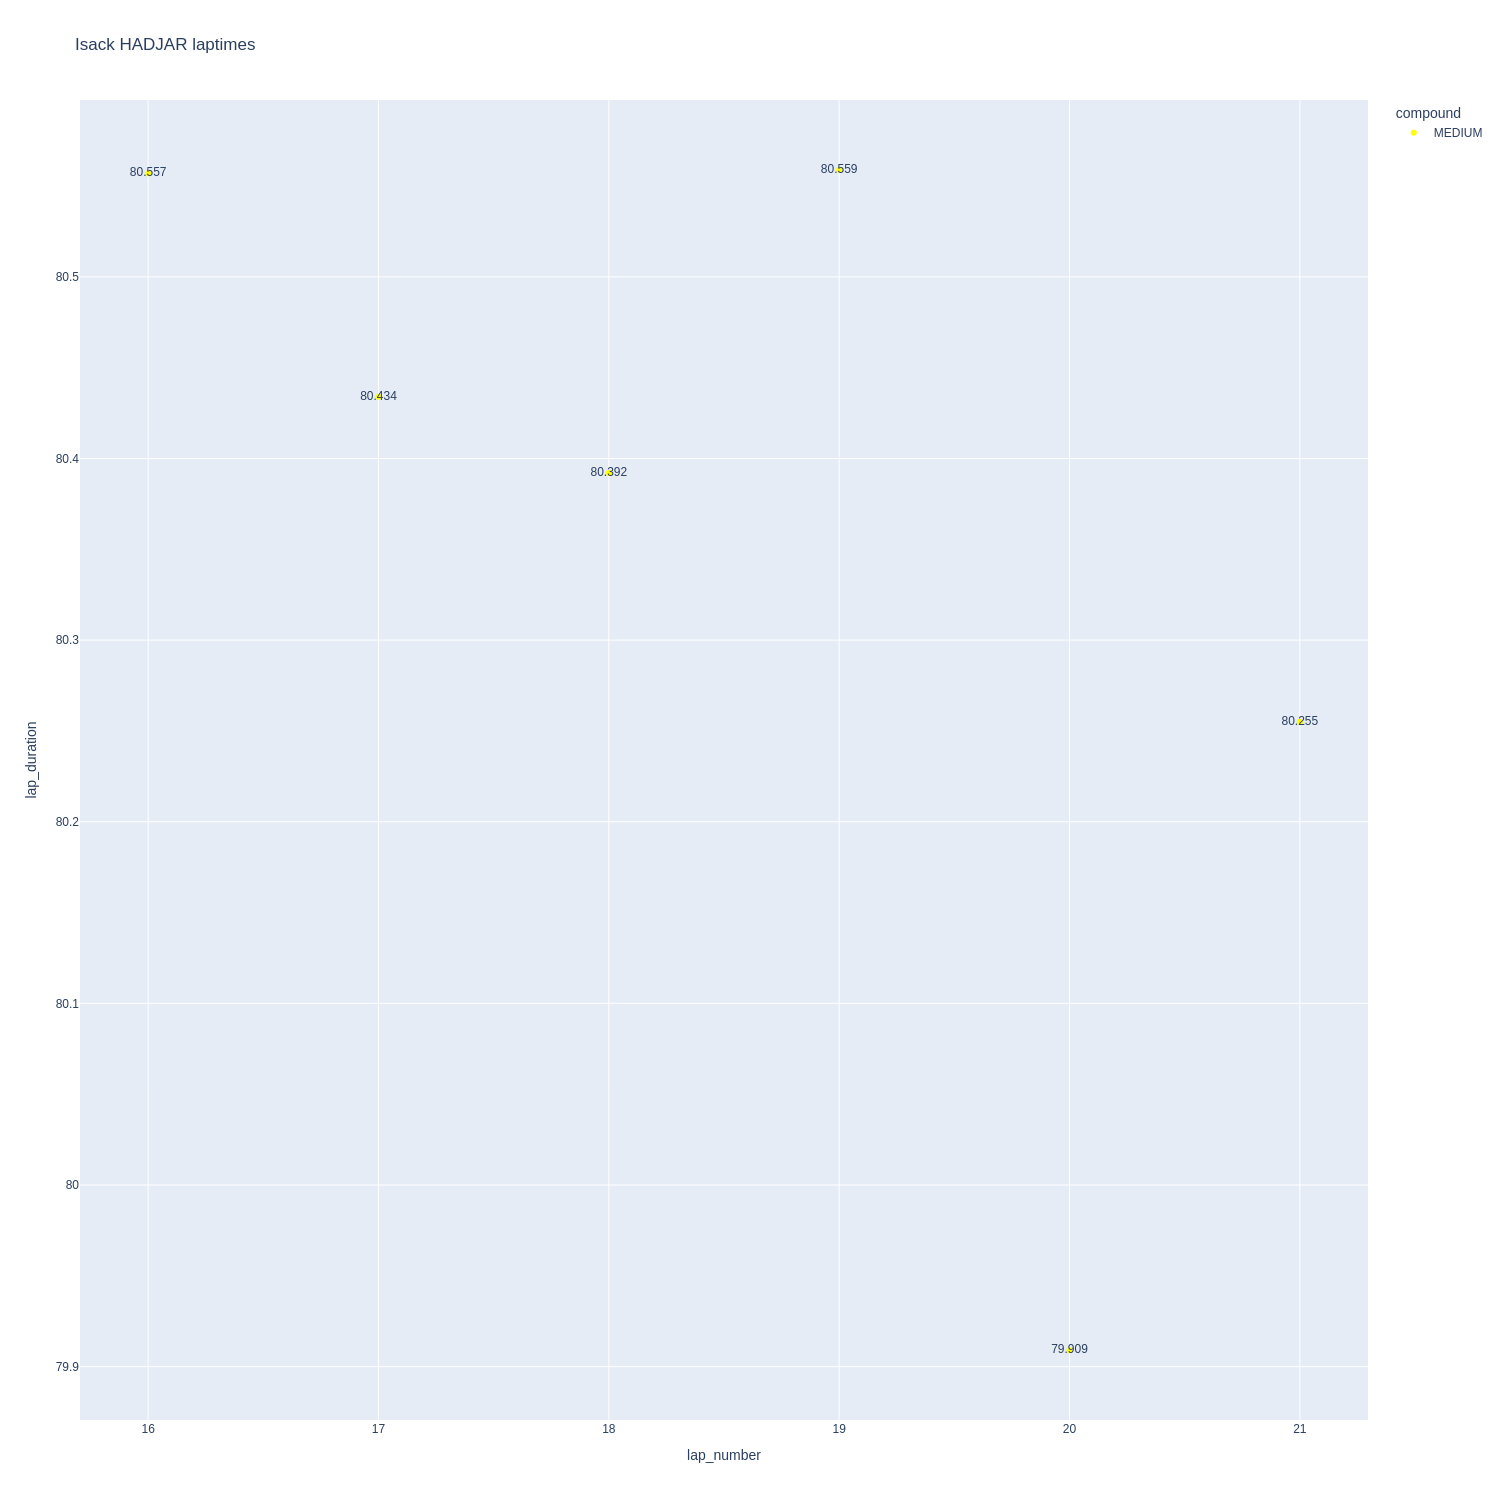

In [1107]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

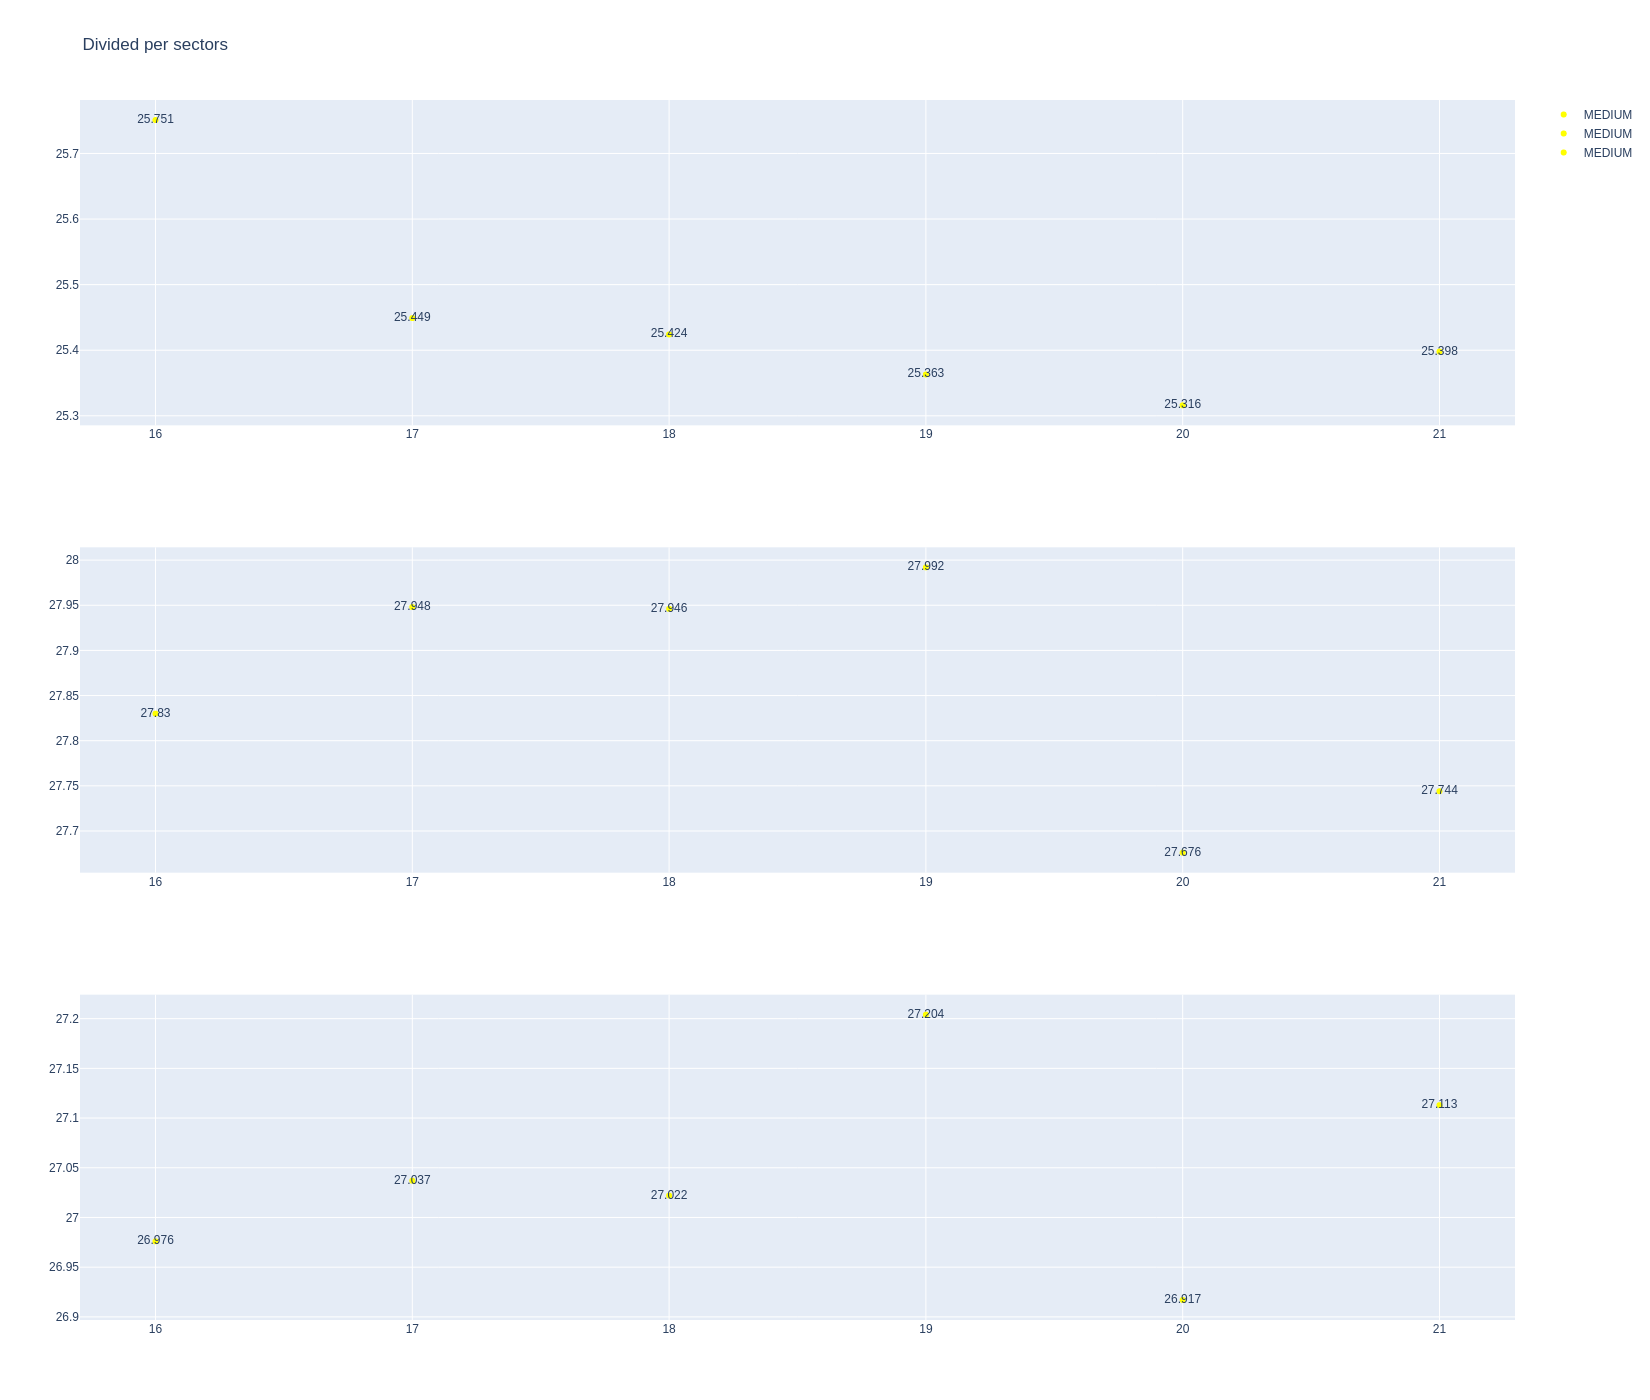

In [1108]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1109]:
data = libraryDataF1.getinfolongruns(jointables2,30,'Racing Bulls',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
357  Liam LAWSON   MEDIUM  2025-05-16T15:46:47.999000+00:00          15   
376  Liam LAWSON   MEDIUM  2025-05-16T15:48:09.130000+00:00          16   
396  Liam LAWSON   MEDIUM  2025-05-16T15:49:30.006000+00:00          17   
416  Liam LAWSON   MEDIUM  2025-05-16T15:50:50.788000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
357             26.068             28.144             26.820        81.032  
376             25.942             28.080             26.882        80.904  
396             25.825             28.045             26.931        80.801  
416             25.730             27.952             26.950        80.632

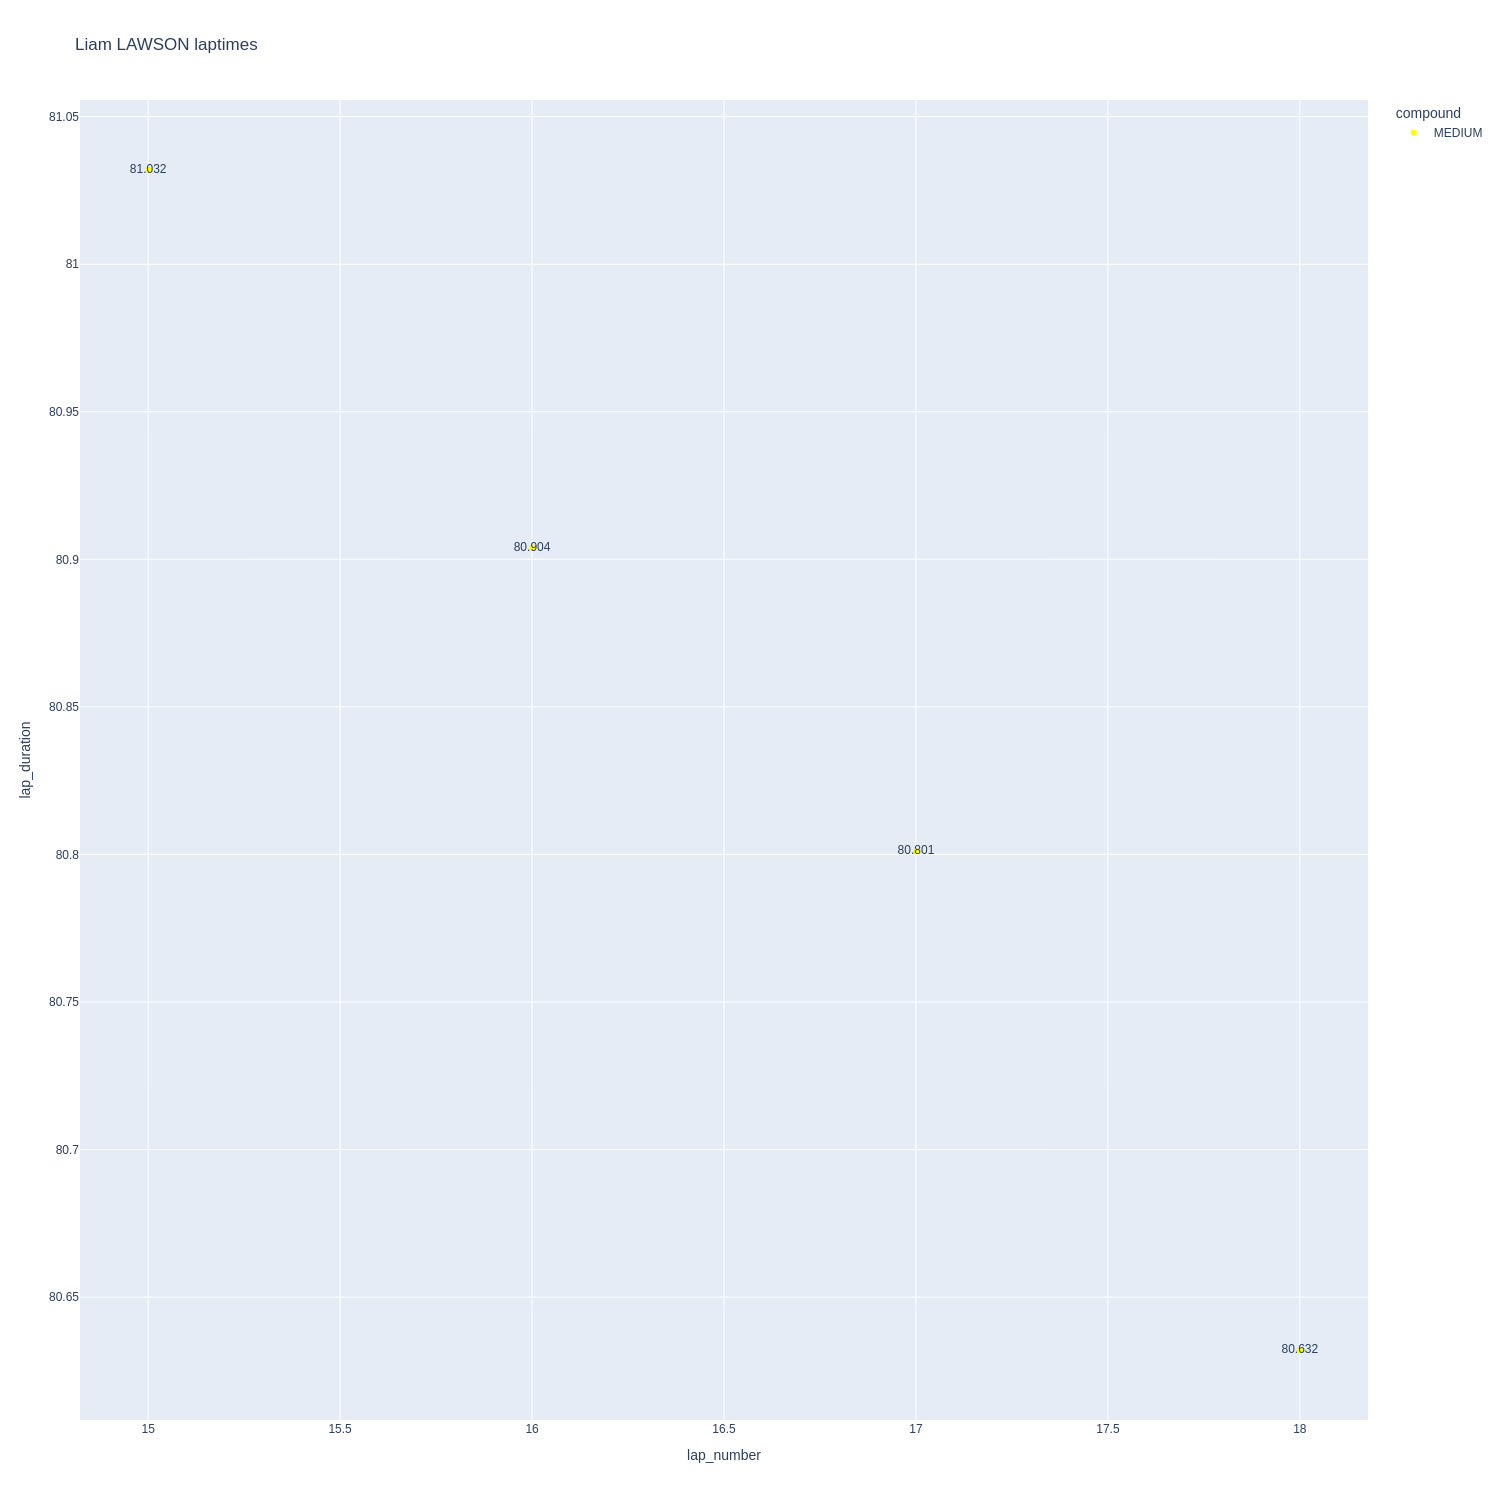

In [1110]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

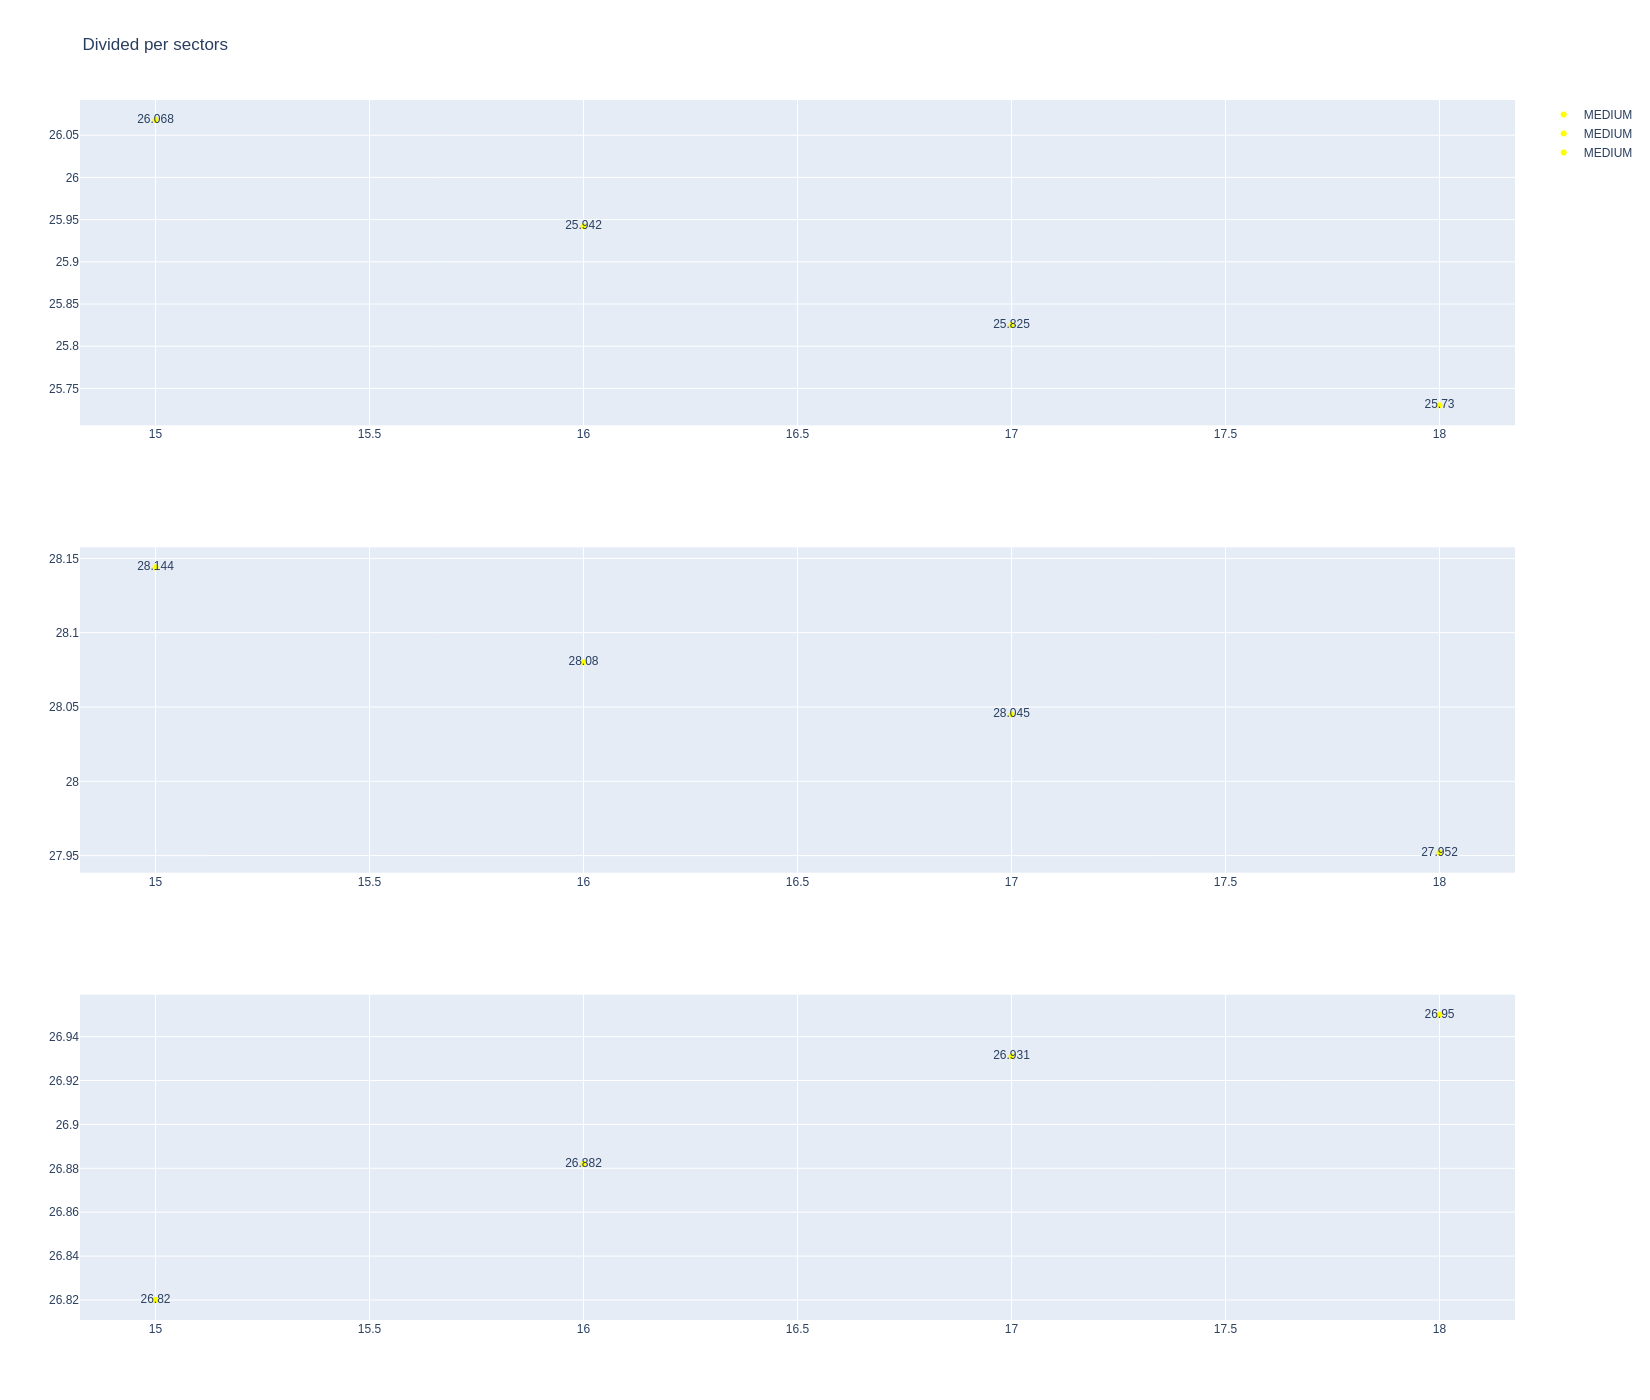

In [1111]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [1112]:
stintInformation.query('driver_number == 87 or driver_number == 31')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
5          1260         9981             1             31          1        4   
8          1260         9981             1             87          1        4   
24         1260         9981             2             31          5        7   
27         1260         9981             2             87          5        7   
35         1260         9981             3             31          8       10   
37         1260         9981             3             87          8       10   
50         1260         9981             4             87         11       12   
54         1260         9981             4             31         11       13   
65         1260         9981             5             87         13       24   
68         1260         9981             5             31         14       16   
81         1260         9981             6             31         17       22   
90         1260         9981             7             31         23       25   
95         1260         9981             6             87         25       27   

   compound  tyre_age_at_start  
5    MEDIUM                  0  
8    MEDIUM                  0  
24   MEDIUM                  0  
27   MEDIUM                  3  
35   MEDIUM                  6  
37     SOFT                  0  
50     SOFT                  3  
54     SOFT                  0  
65   MEDIUM                  6  
68     SOFT                  3  
81   MEDIUM                  9  
90   MEDIUM                 14  
95     SOFT                  5

In [1113]:
data = libraryDataF1.getinfolongruns(jointables2,87,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
266  Oliver BEARMAN   MEDIUM  2025-05-16T15:38:32.760000+00:00          13   
275  Oliver BEARMAN   MEDIUM  2025-05-16T15:39:53.984000+00:00          14   
287  Oliver BEARMAN   MEDIUM  2025-05-16T15:41:15.066000+00:00          15   
304  Oliver BEARMAN   MEDIUM  2025-05-16T15:42:36.067000+00:00          16   
338  Oliver BEARMAN   MEDIUM  2025-05-16T15:45:22.247000+00:00          18   
356  Oliver BEARMAN   MEDIUM  2025-05-16T15:46:42.827000+00:00          19   
375  Oliver BEARMAN   MEDIUM  2025-05-16T15:48:03.287000+00:00          20   
395  Oliver BEARMAN   MEDIUM  2025-05-16T15:49:23.647000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
266             26.019             28.188             27.018        81.225  
275             25.825             28.377             26.879        81.081  
287             25.713             28.229             26.961        80.903  
304             25.644             28.464             26.985        81.093  
338             25.715             28.006             26.844        80.565  
356             25.601             27.965             26.881        80.447  
375             25.569             27.989             26.822        80.380  
395             25.624             28.157             27.324        81.105

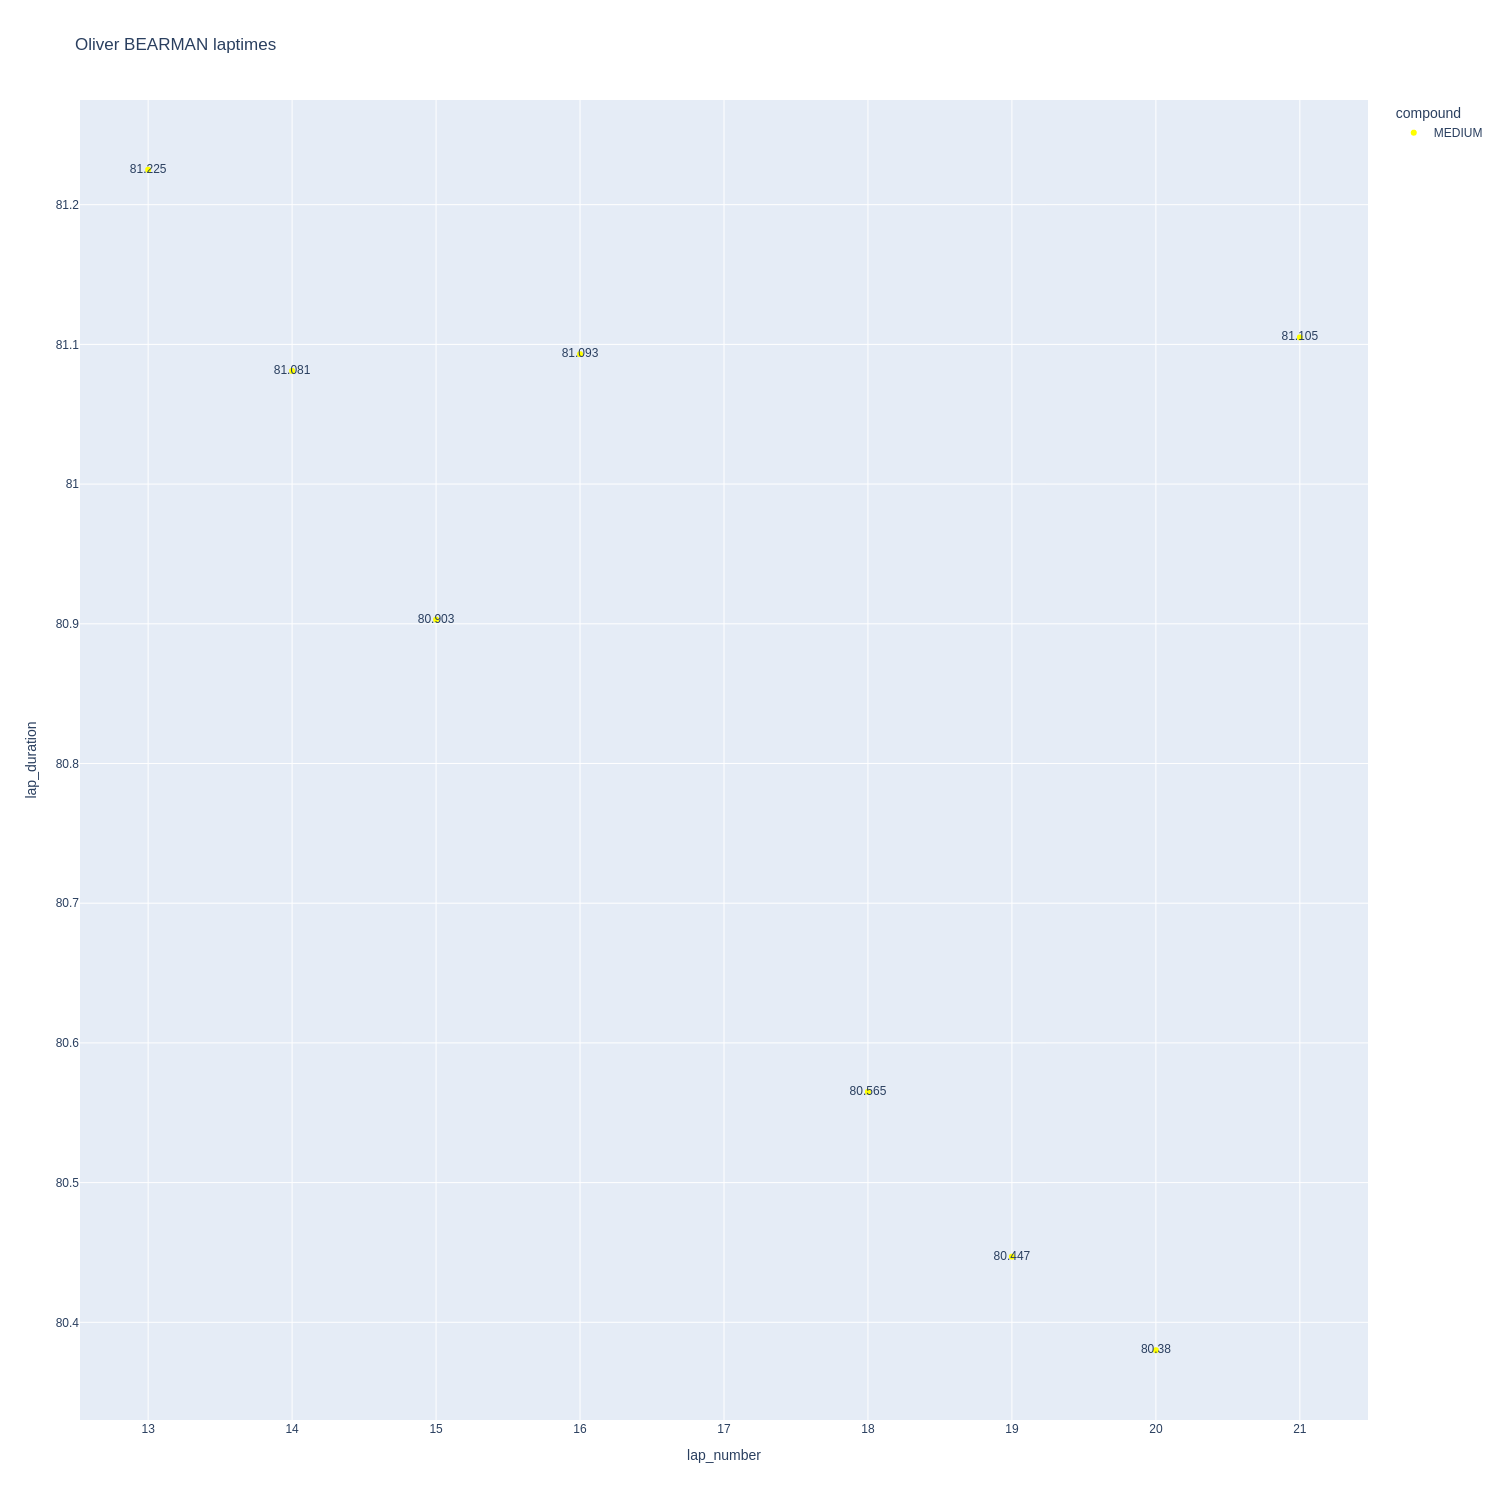

In [1114]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

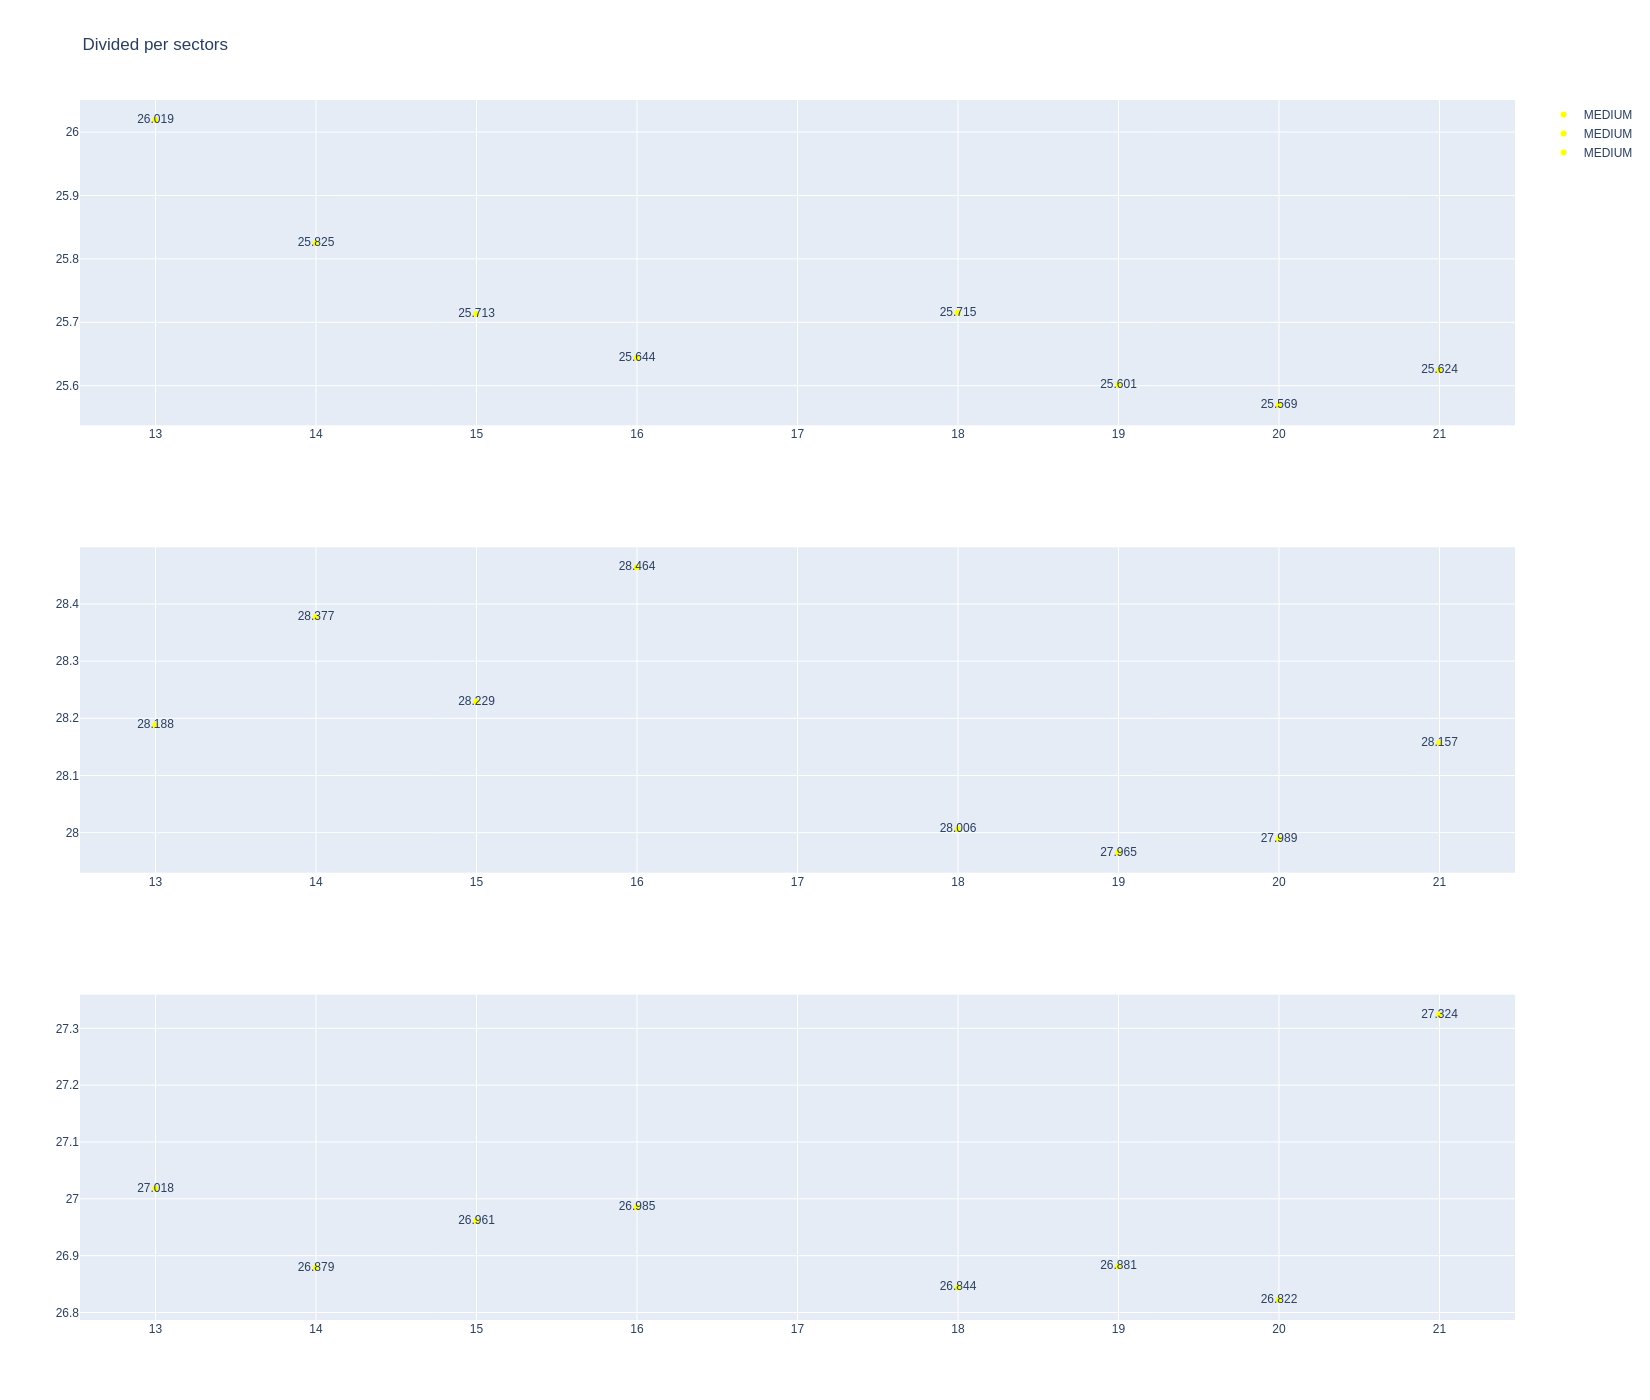

In [1115]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1116]:
data = libraryDataF1.getinfolongruns(jointables2,31,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


full_name compound                        date_start  lap_number  \
369  Esteban OCON   MEDIUM  2025-05-16T15:47:30.616000+00:00          17   
388  Esteban OCON   MEDIUM  2025-05-16T15:48:51.146000+00:00          18   
408  Esteban OCON   MEDIUM  2025-05-16T15:50:11.960000+00:00          19   
428  Esteban OCON   MEDIUM  2025-05-16T15:51:32.882000+00:00          20   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
369             25.718             27.861             26.945        80.524  
388             25.770             28.047             27.046        80.863  
408             25.755             28.220             27.029        81.004  
428             25.799             28.256             27.160        81.215

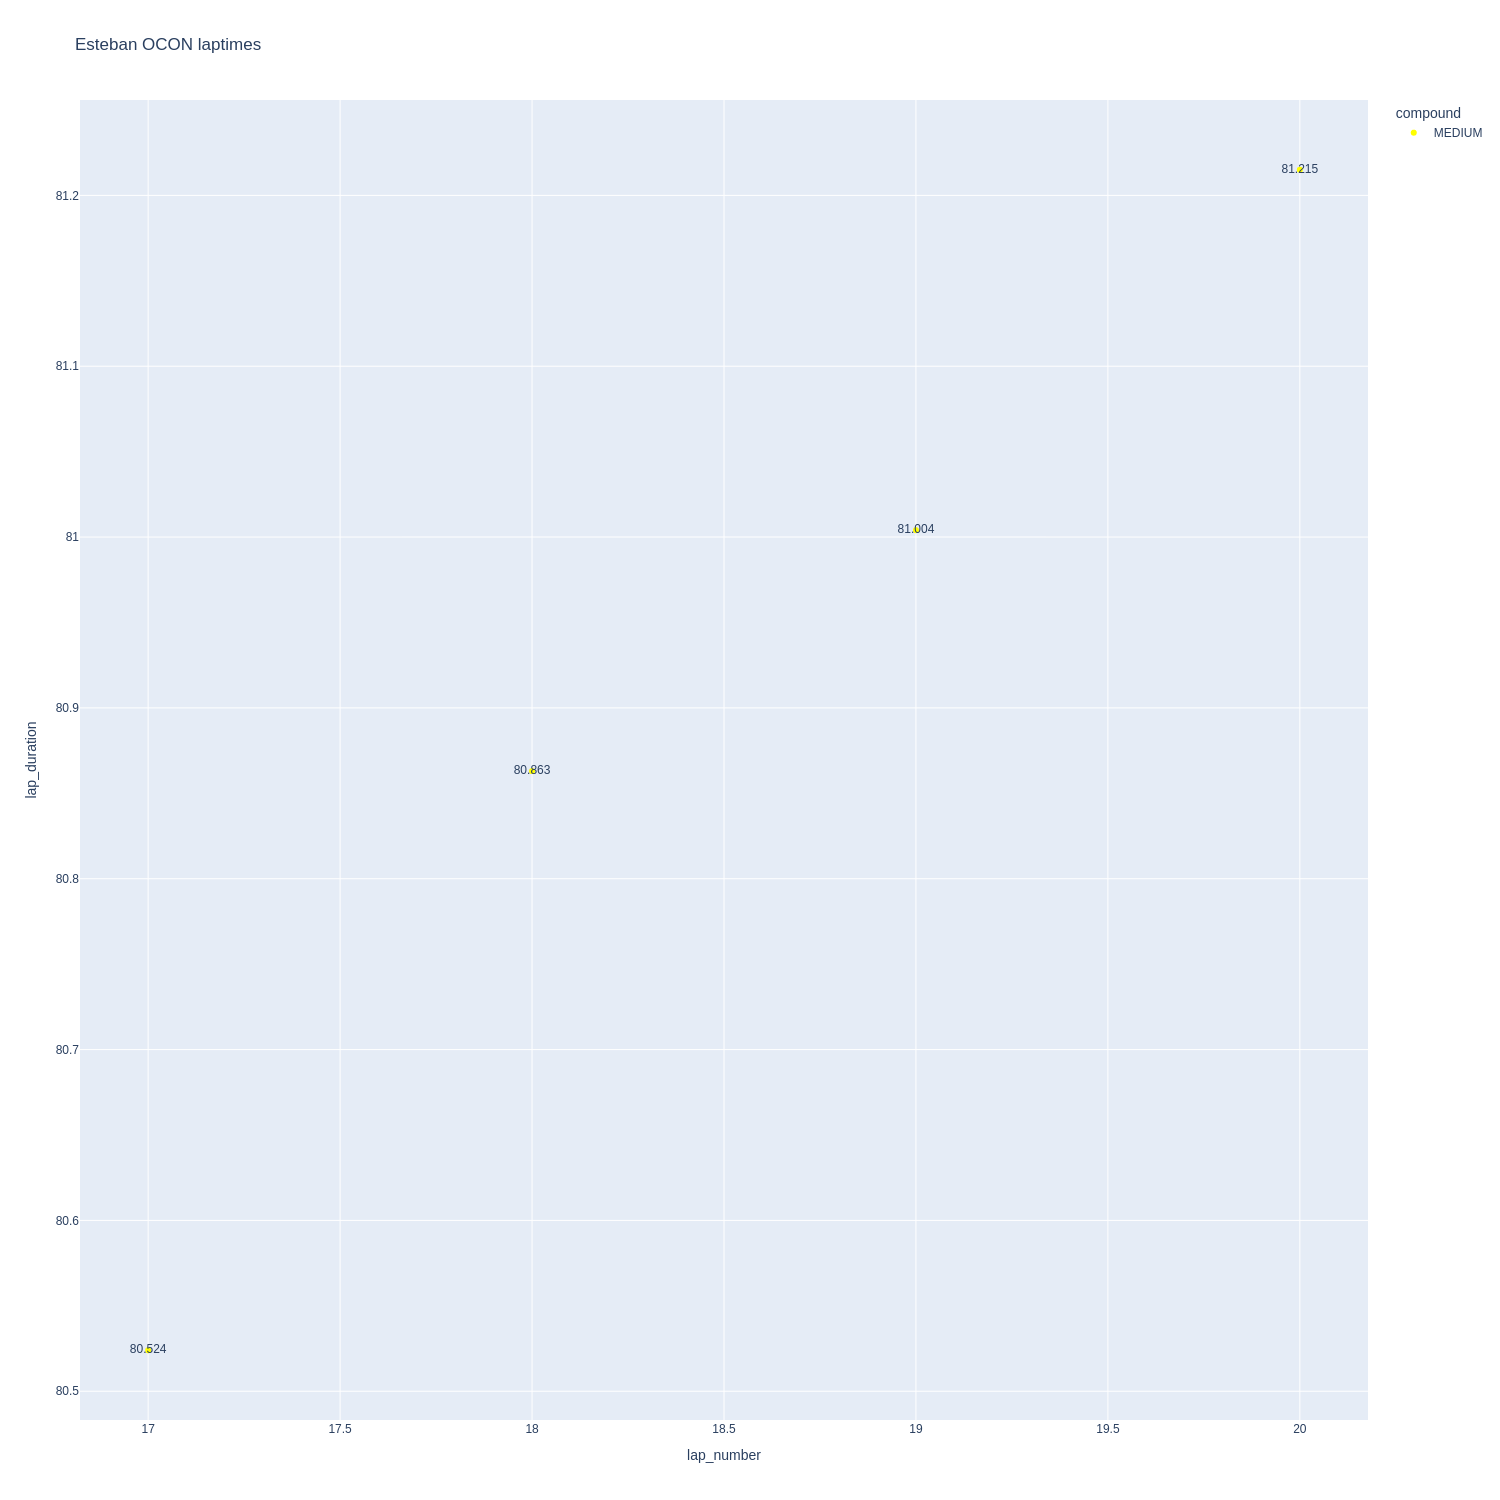

In [1117]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

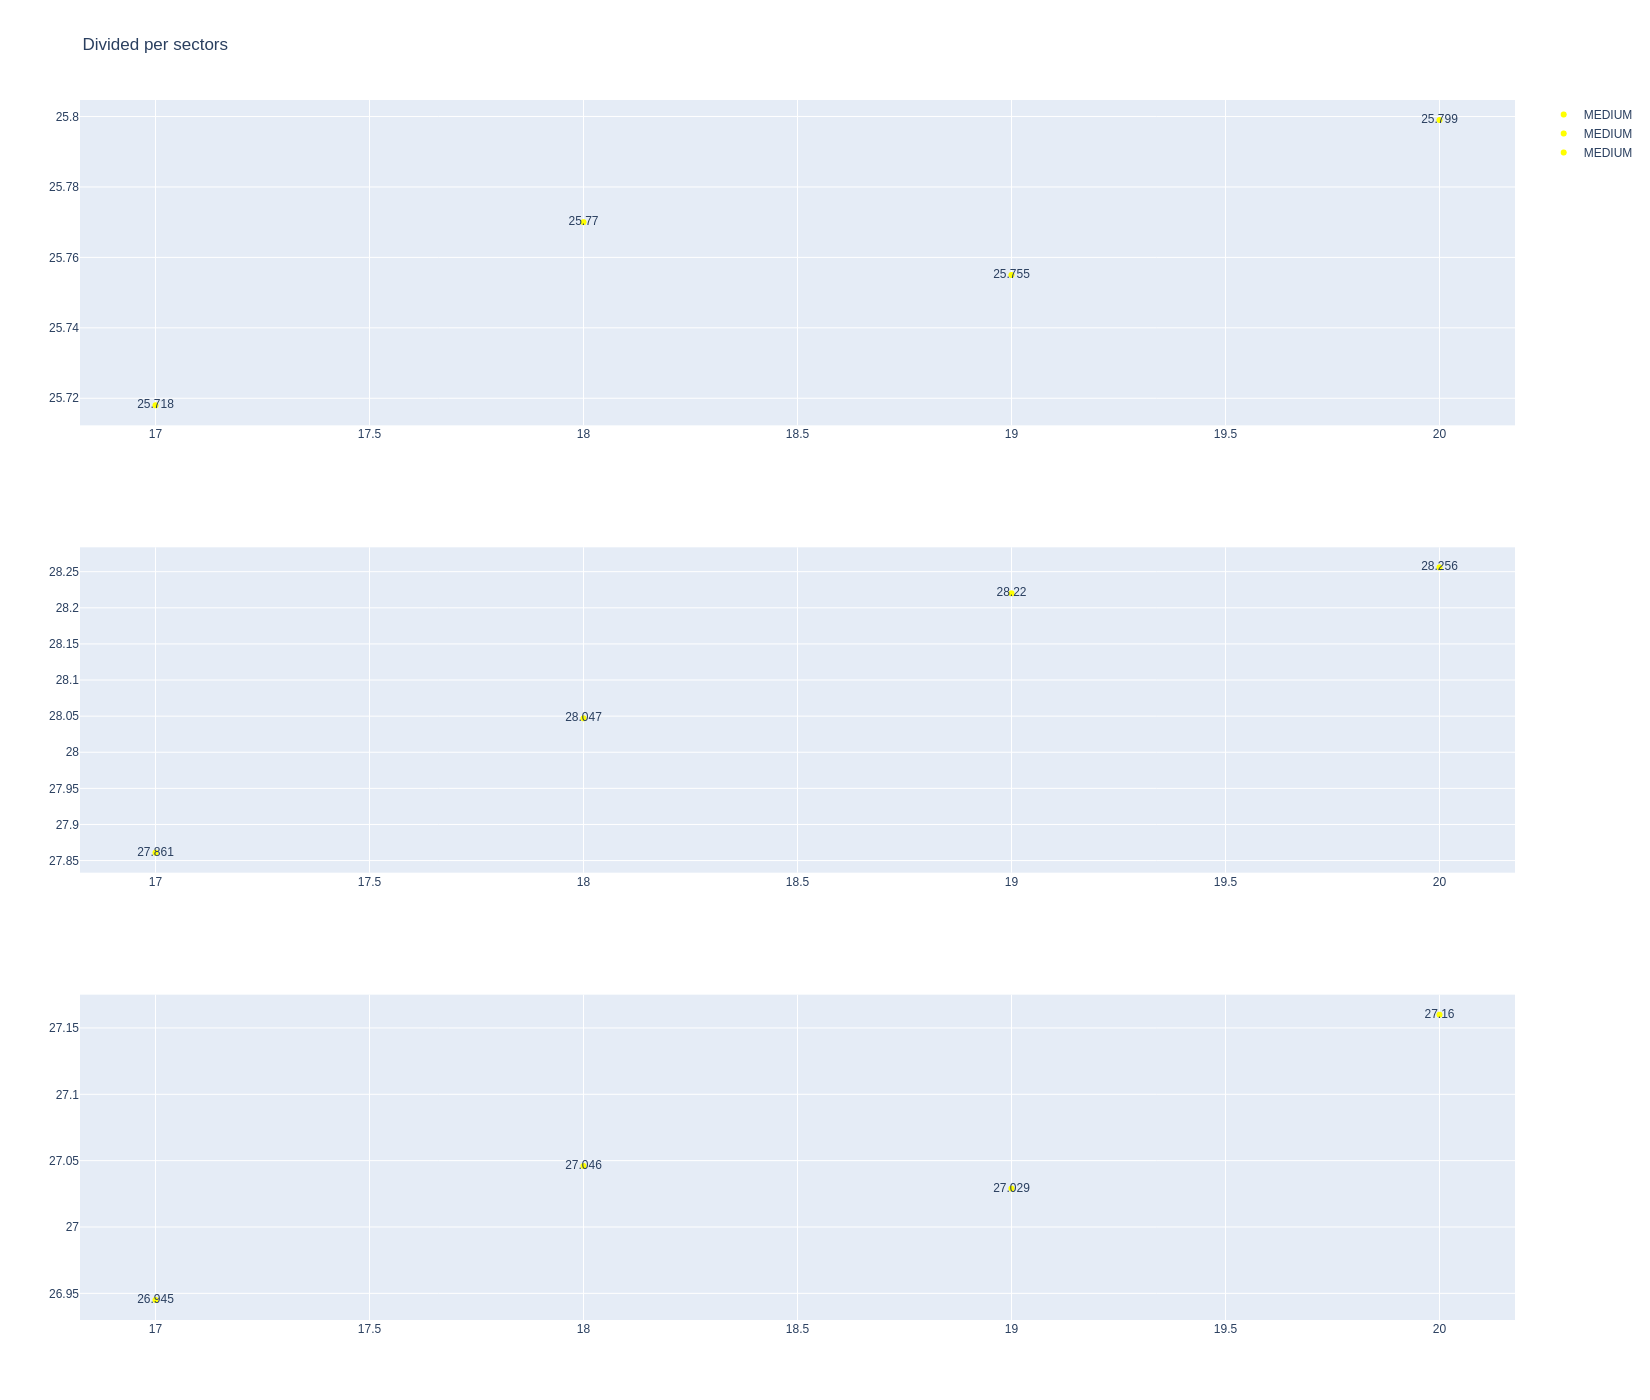

In [1118]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [1119]:
stintInformation.query('driver_number == 10 or driver_number == 43')

meeting_key  session_key  stint_number  driver_number  lap_start  \
2           1260         9981             1             10          1   
6           1260         9981             1             43          1   
20          1260         9981             2             10          5   
25          1260         9981             2             43          5   
29          1260         9981             3             10          7   
36          1260         9981             3             43          8   
52          1260         9981             4             10         11   
55          1260         9981             4             43         11   
71          1260         9981             5             10         14   
72          1260         9981             5             43         14   
102         1260         9981             6             10         28   
104         1260         9981             6             43         28   

     lap_end compound  tyre_age_at_start  
2          4   MEDIUM                  0  
6          4   MEDIUM                  0  
20         6   MEDIUM                  0  
25         7   MEDIUM                  0  
29        10   MEDIUM                  0  
36        10   MEDIUM                  6  
52        13     SOFT                  0  
55        13     SOFT                  0  
71        27   MEDIUM                  9  
72        27   MEDIUM                  9  
102       30   MEDIUM                 22  
104       30   MEDIUM                 22

In [1120]:
data =libraryDataF1.getinfolongruns(jointables2,43,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
255  Franco COLAPINTO   MEDIUM  2025-05-16T15:36:09.558000+00:00          14   
261  Franco COLAPINTO   MEDIUM  2025-05-16T15:37:30.258000+00:00          15   
268  Franco COLAPINTO   MEDIUM         2025-05-16T15:38:51+00:00          16   
277  Franco COLAPINTO   MEDIUM  2025-05-16T15:40:11.719000+00:00          17   
291  Franco COLAPINTO   MEDIUM  2025-05-16T15:41:32.426000+00:00          18   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
255             25.748             28.119             26.899        80.766  
261             25.655             27.949             27.038        80.642  
268             25.608             28.060             27.145        80.813  
277             25.658             27.885             27.059        80.602  
291             25.563             28.110             27.267        80.940

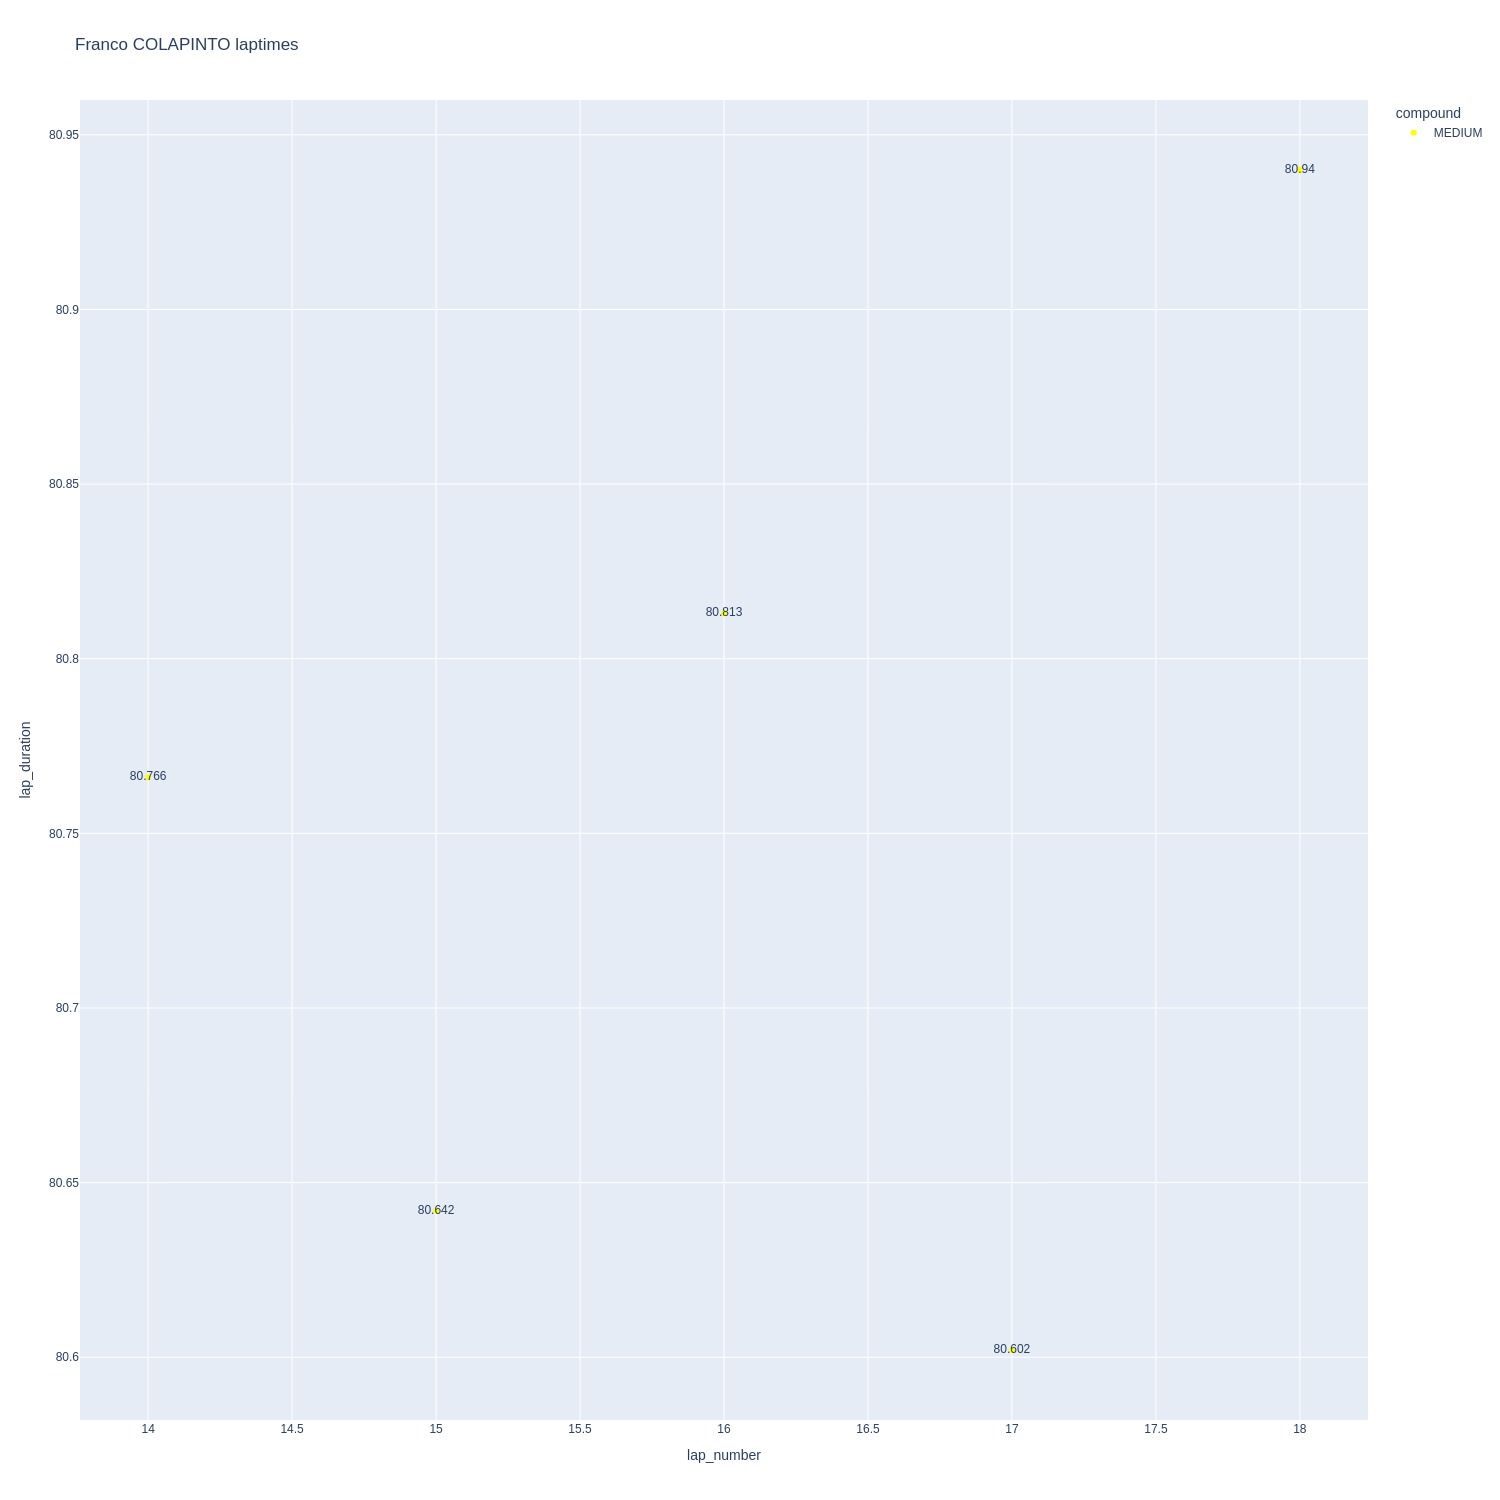

In [1121]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

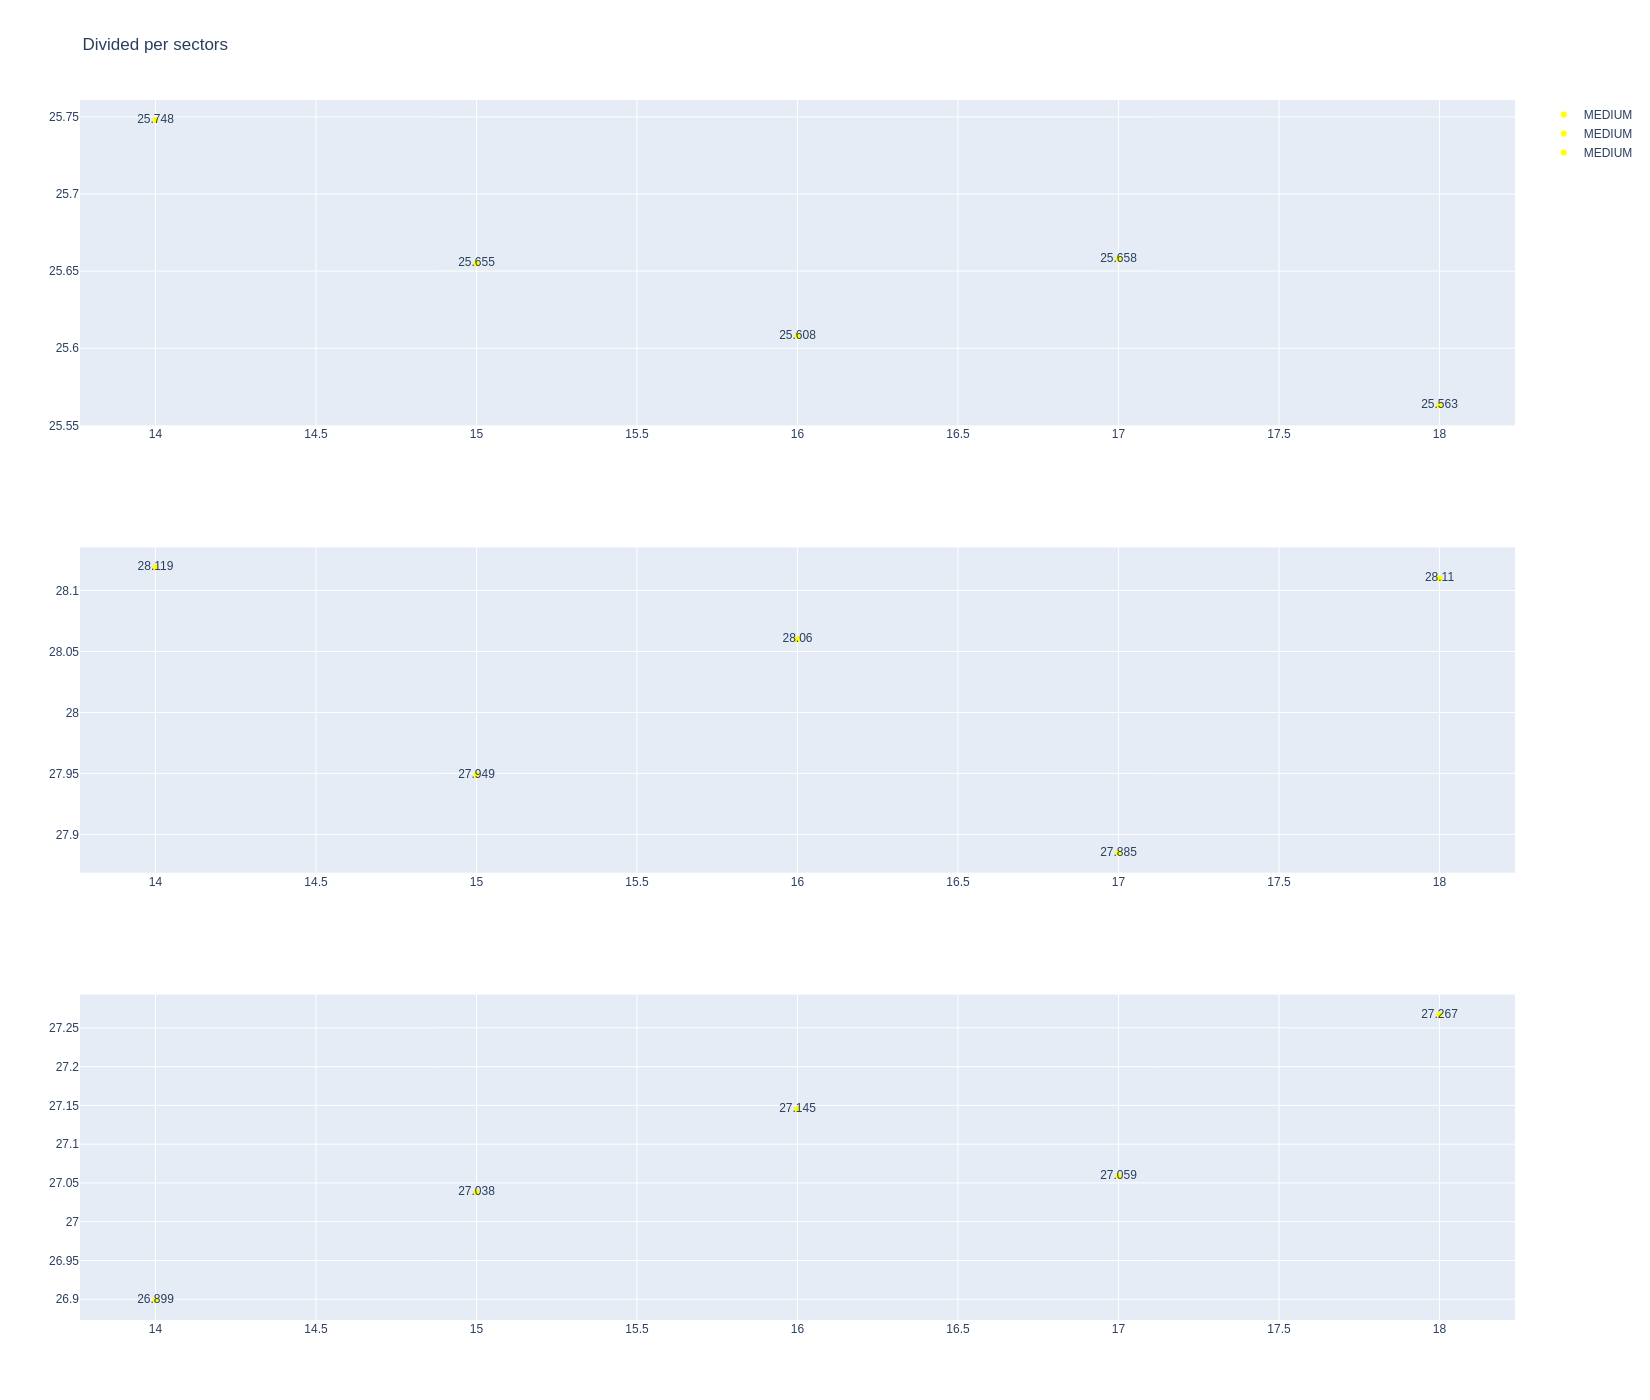

In [1122]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1123]:
data = libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
258  Pierre GASLY   MEDIUM  2025-05-16T15:36:46.496000+00:00          14   
264  Pierre GASLY   MEDIUM  2025-05-16T15:38:07.406000+00:00          15   
273  Pierre GASLY   MEDIUM  2025-05-16T15:39:28.031000+00:00          16   
299  Pierre GASLY   MEDIUM  2025-05-16T15:42:14.254000+00:00          18   
316  Pierre GASLY   MEDIUM  2025-05-16T15:43:34.754000+00:00          19   
334  Pierre GASLY   MEDIUM  2025-05-16T15:44:55.125000+00:00          20   
352  Pierre GASLY   MEDIUM  2025-05-16T15:46:15.591000+00:00          21   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
258             25.768             28.117             27.019        80.904  
264             25.704             27.874             27.021        80.599  
273             25.707             28.012             26.953        80.672  
299             25.646             27.993             26.841        80.480  
316             25.516             27.933             26.808        80.257  
334             25.584             28.101             26.911        80.596  
352             25.700             28.039             27.089        80.828

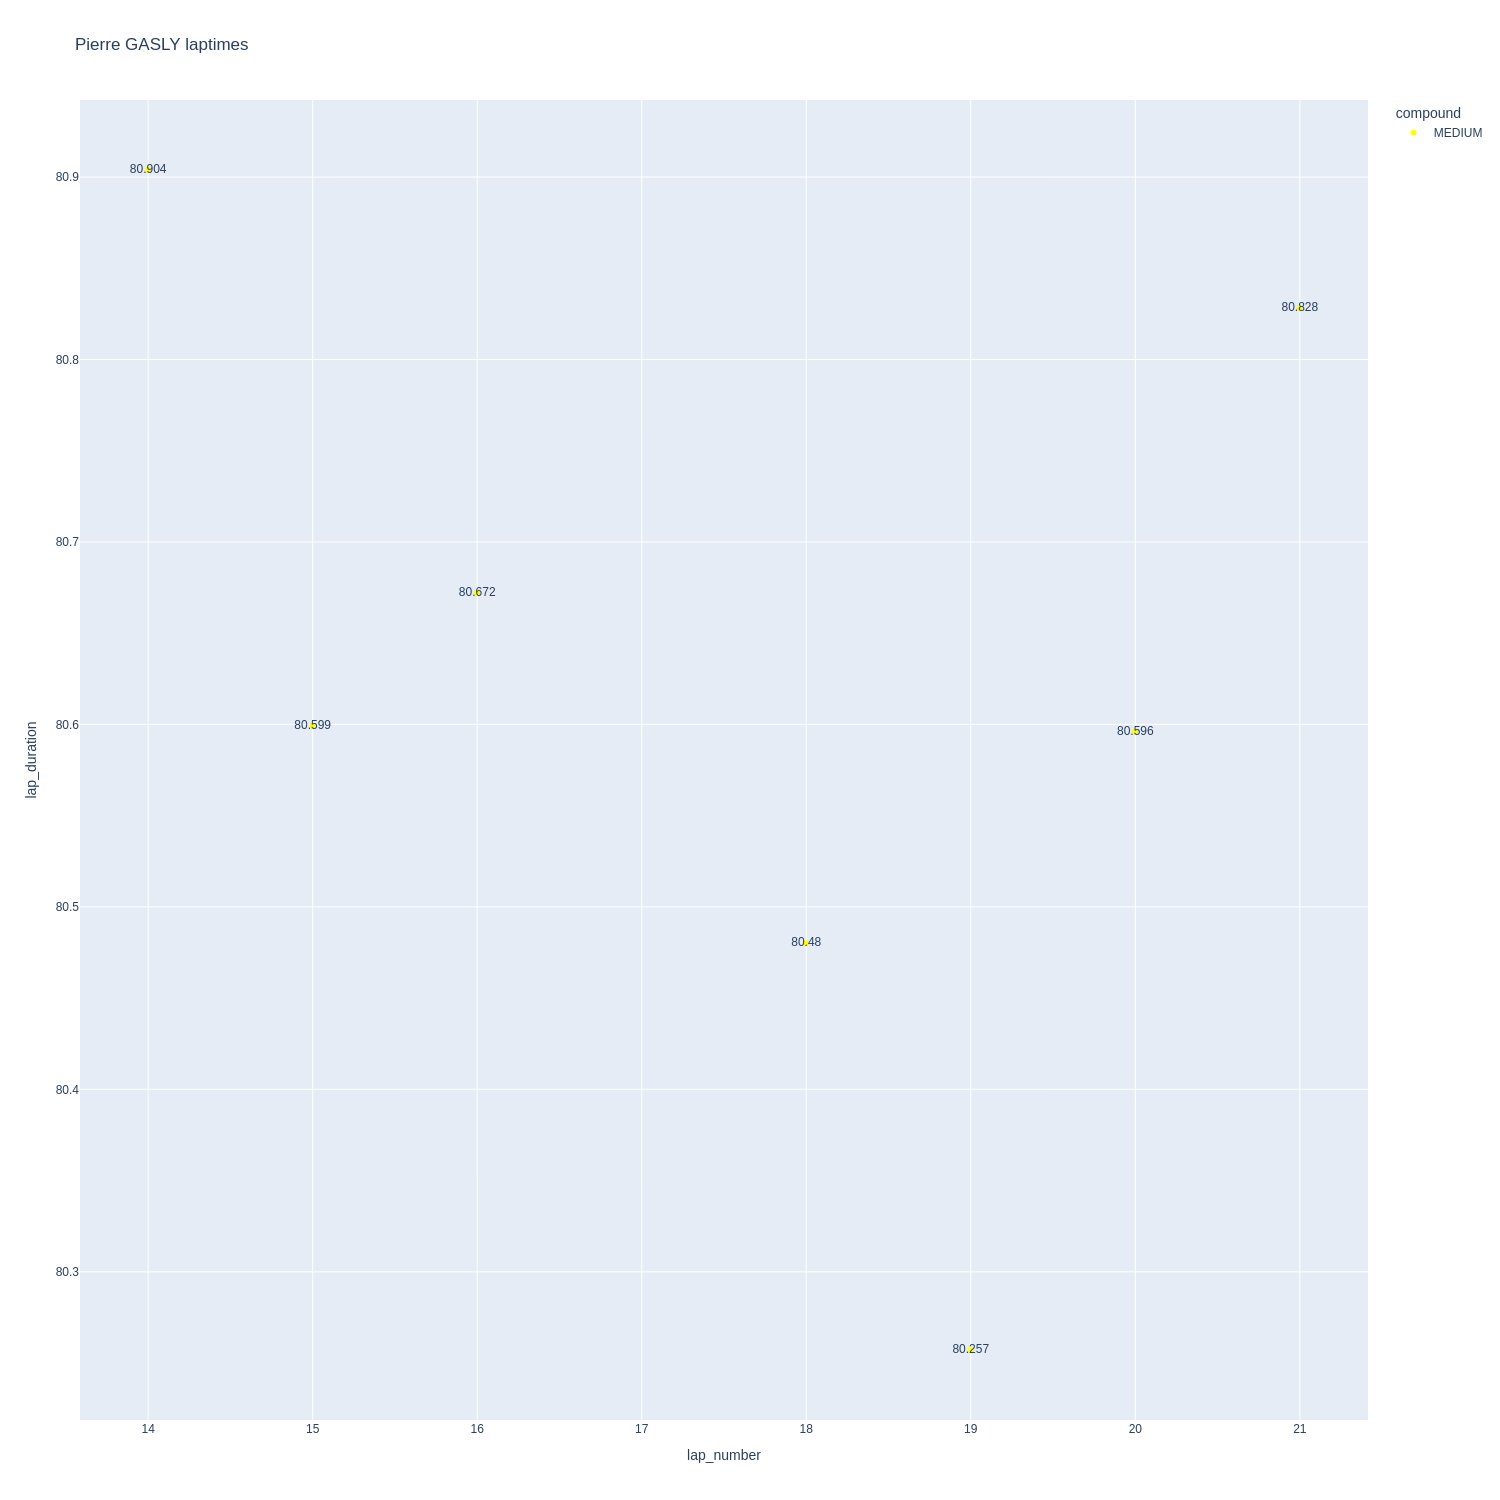

In [1124]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

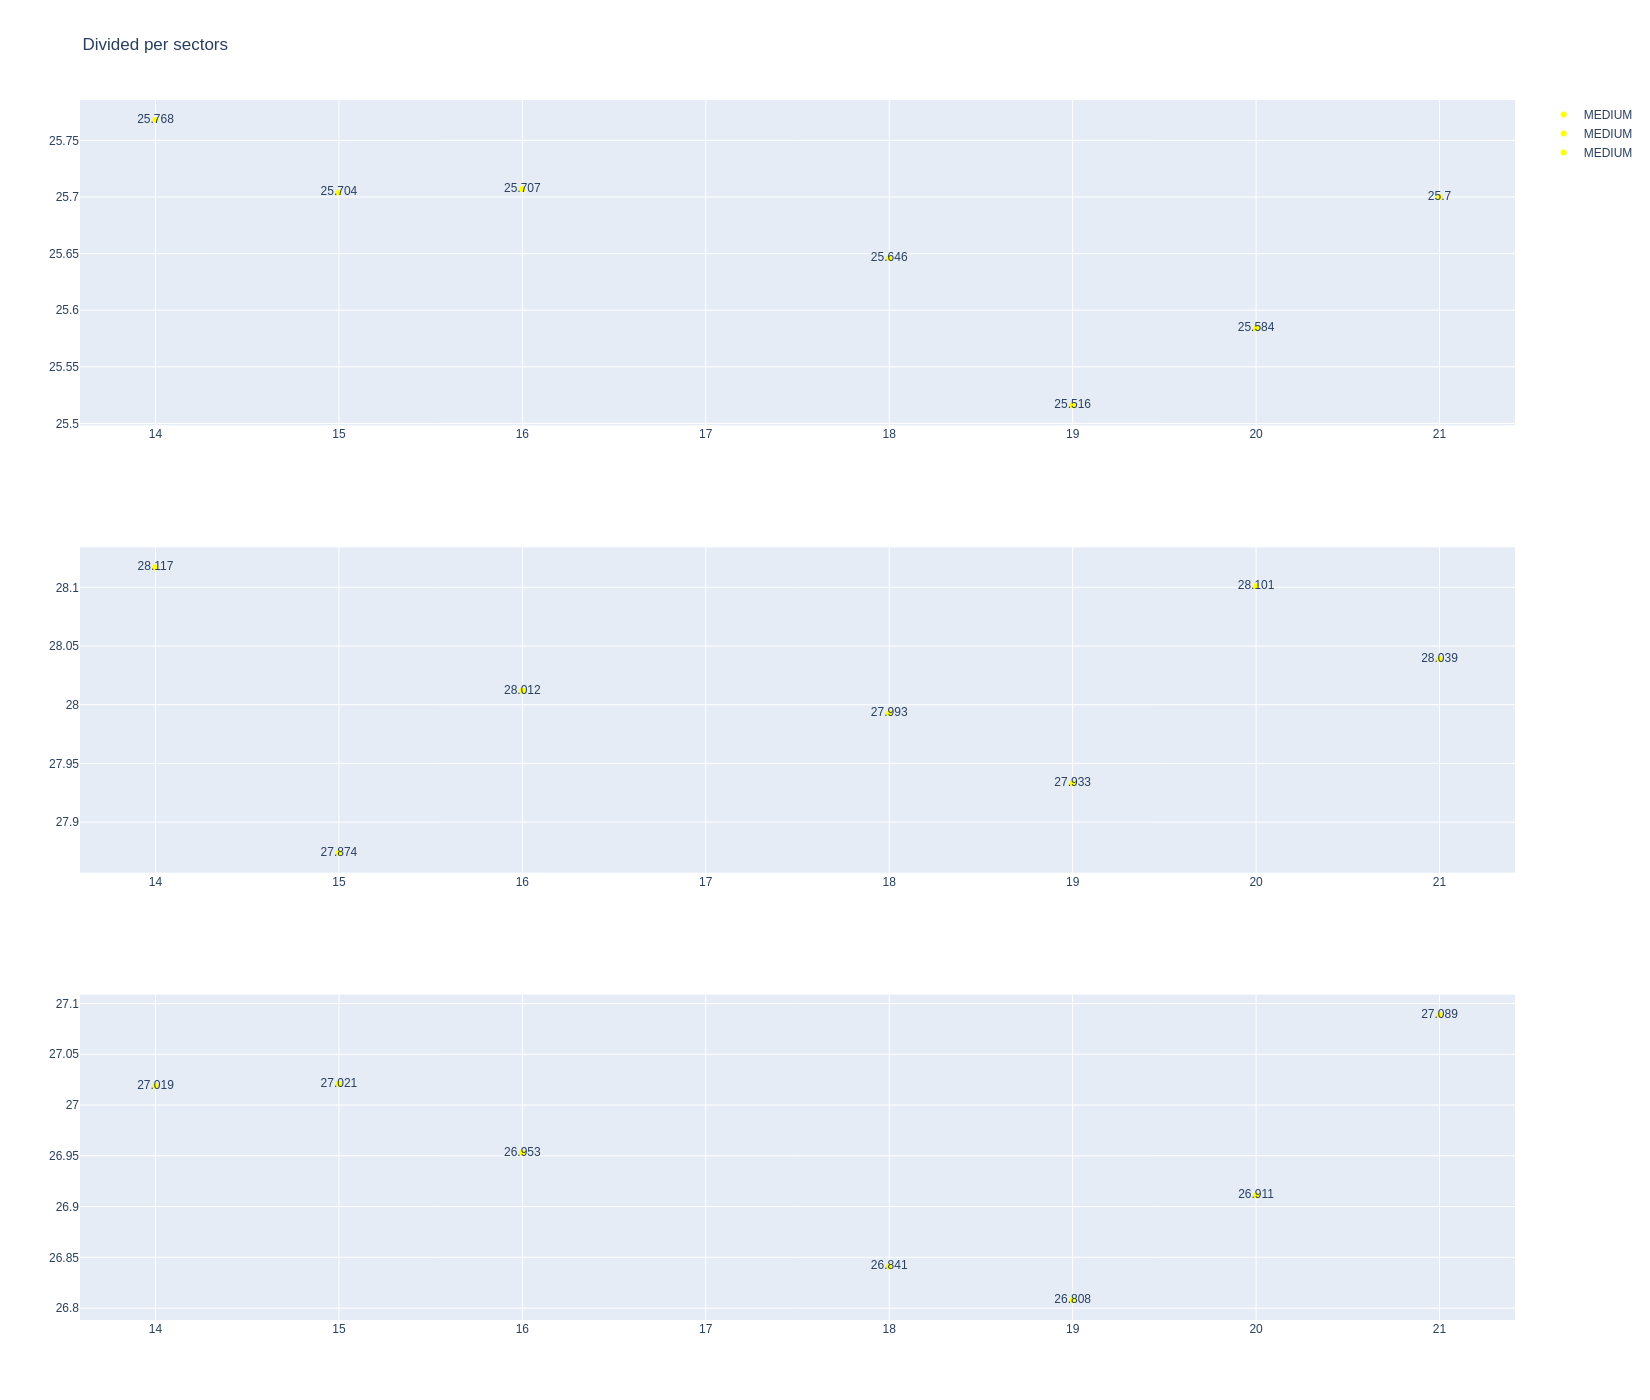

In [1125]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [1126]:
stintInformation.query('driver_number == 55 or driver_number == 23')

meeting_key  session_key  stint_number  driver_number  lap_start  \
12          1260         9981             1             55          1   
19          1260         9981             1             23          1   
31          1260         9981             2             55          8   
48          1260         9981             3             55         10   
57          1260         9981             2             23         11   
80          1260         9981             3             23         17   
83          1260         9981             4             55         17   
85          1260         9981             4             23         18   
100         1260         9981             5             23         27   
101         1260         9981             5             55         27   

     lap_end compound  tyre_age_at_start  
12         7   MEDIUM                  1  
19        10   MEDIUM                  0  
31         9   MEDIUM                  7  
48        16     SOFT                  0  
57        16     SOFT                  0  
80        17     SOFT                  6  
83        26   MEDIUM                  9  
85        26   MEDIUM                  9  
100       30   MEDIUM                 17  
101       30   MEDIUM                 18

In [1127]:
data = libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
306  Alexander ALBON   MEDIUM  2025-05-16T15:42:52.426000+00:00          18   
323  Alexander ALBON   MEDIUM  2025-05-16T15:44:13.098000+00:00          19   
341  Alexander ALBON   MEDIUM  2025-05-16T15:45:34.309000+00:00          20   
379  Alexander ALBON   MEDIUM  2025-05-16T15:48:19.099000+00:00          22   
399  Alexander ALBON   MEDIUM  2025-05-16T15:49:39.475000+00:00          23   
418  Alexander ALBON   MEDIUM  2025-05-16T15:50:59.882000+00:00          24   
472  Alexander ALBON   MEDIUM  2025-05-16T15:59:25.519000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
306             25.688             28.014             26.929        80.631  
323             25.832             28.205             27.101        81.138  
341             25.695             28.162             27.005        80.862  
379             25.561             28.000             26.920        80.481  
399             25.581             28.009             26.885        80.475  
418             25.568             27.966             26.879        80.413  
472             25.584             27.929             26.693        80.206

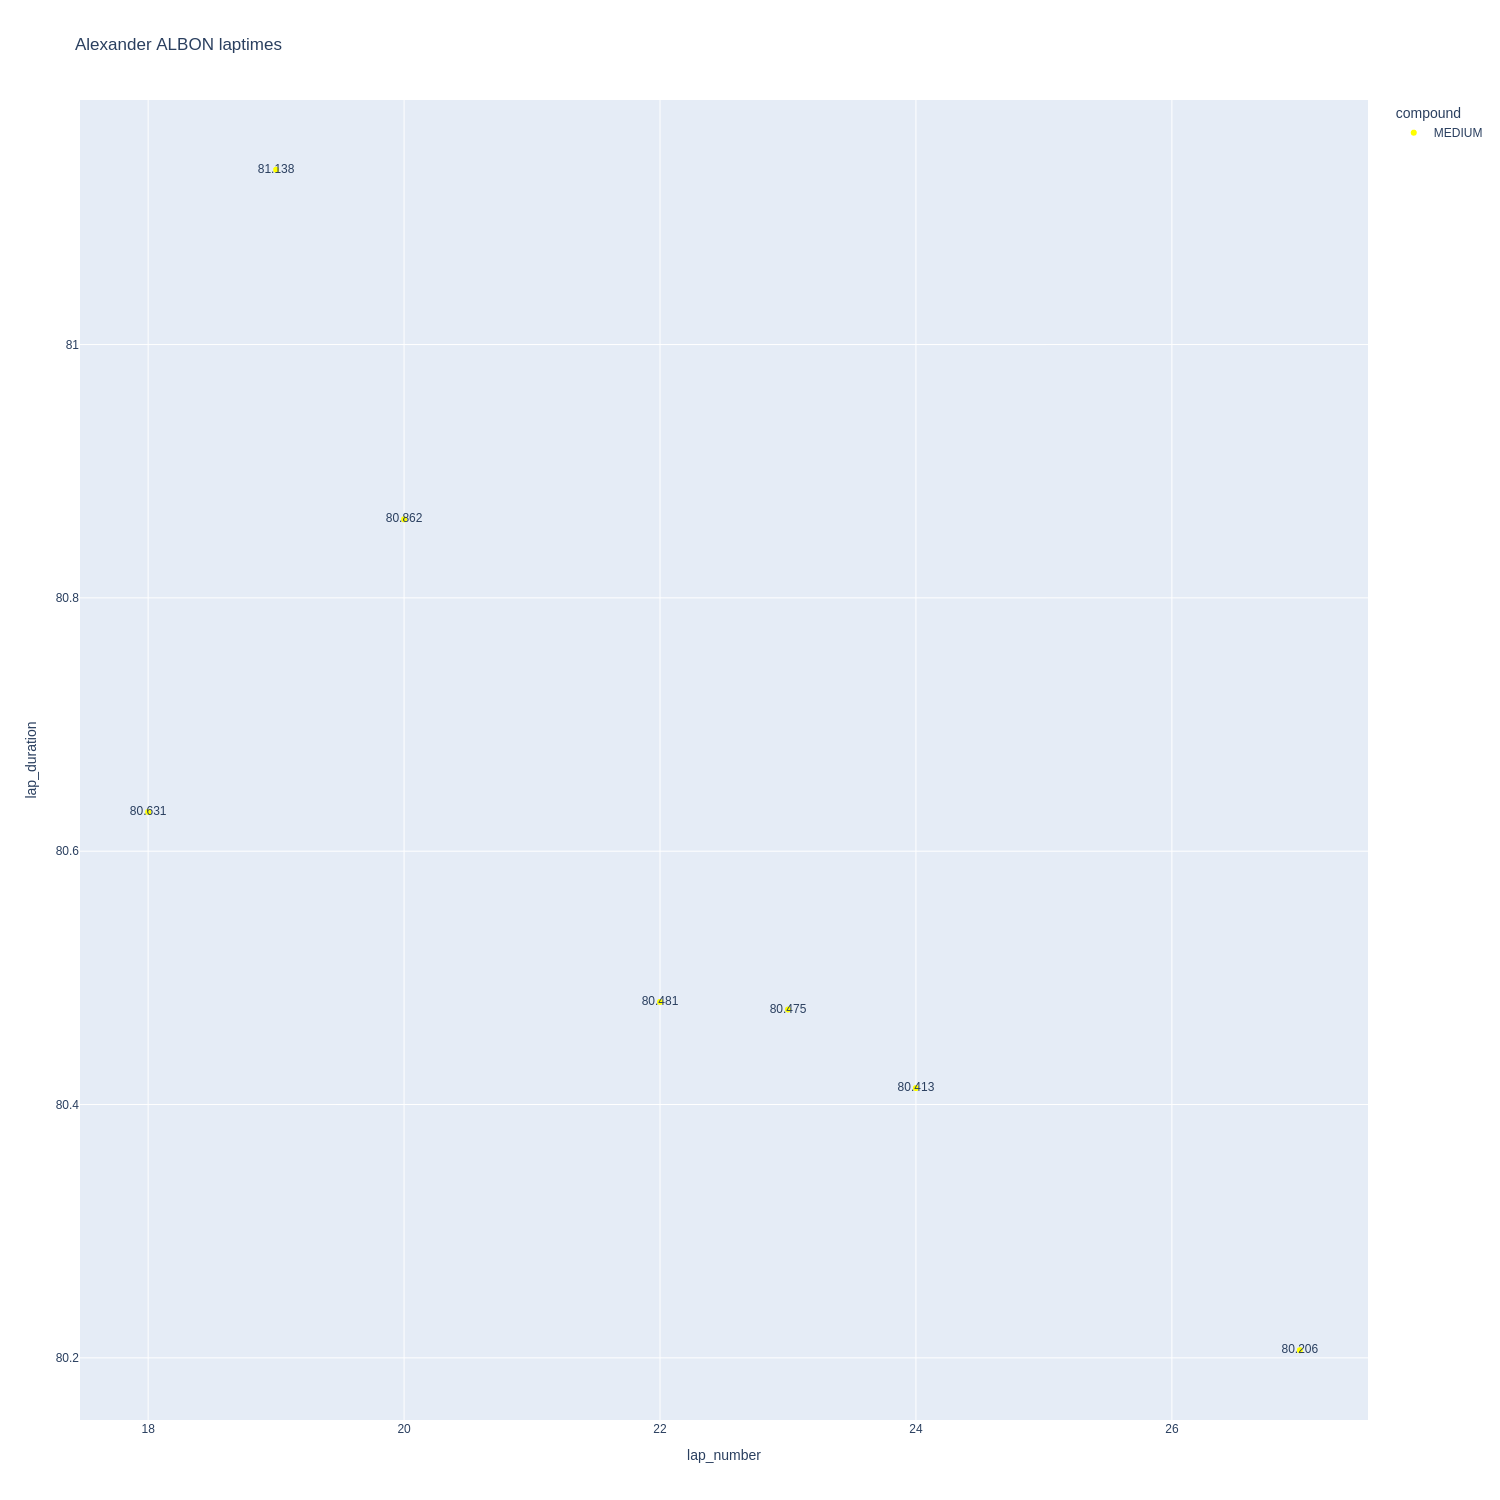

In [1128]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

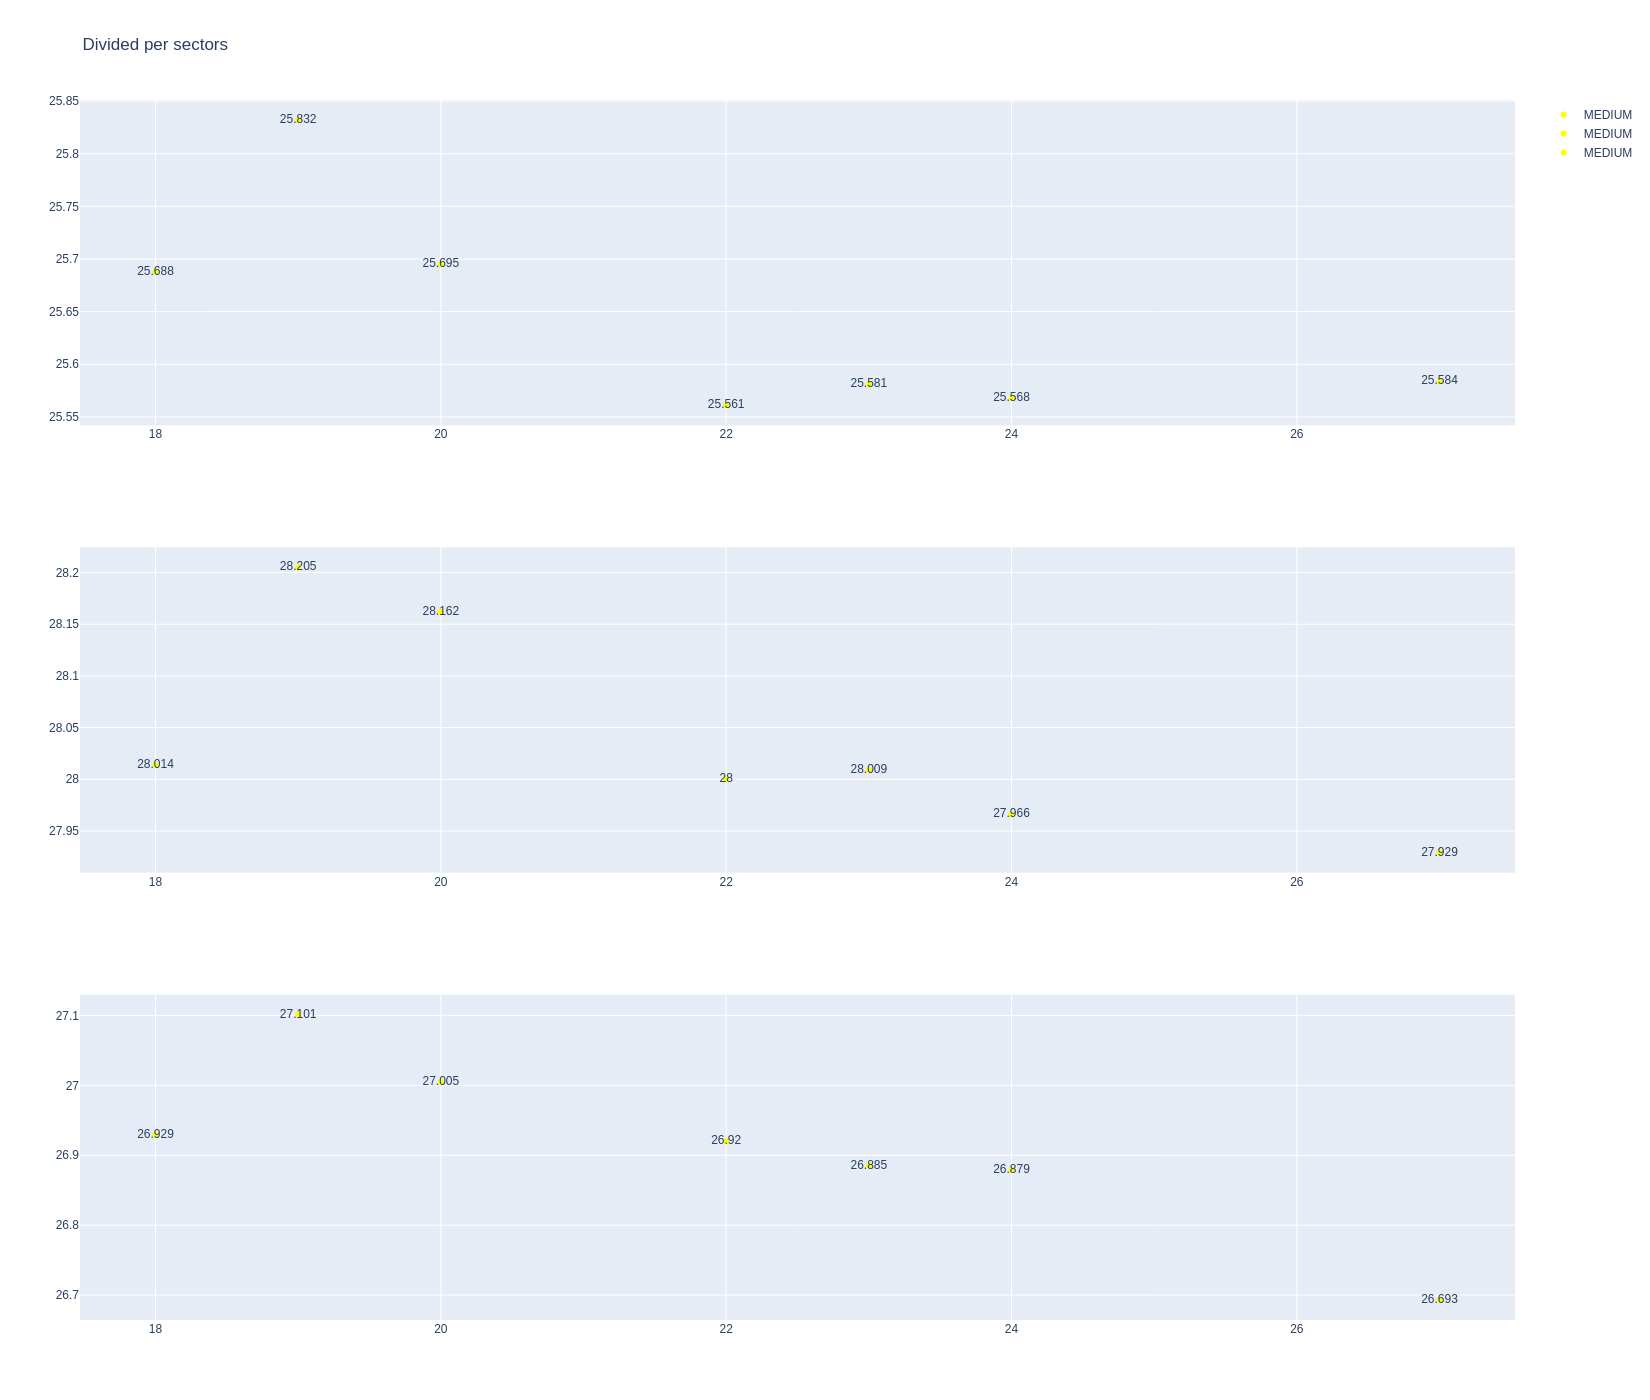

In [1129]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1130]:
data= libraryDataF1.getinfolongruns(jointables2,55,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
303  Carlos SAINZ   MEDIUM  2025-05-16T15:42:34.254000+00:00          17   
319  Carlos SAINZ   MEDIUM  2025-05-16T15:43:54.692000+00:00          18   
337  Carlos SAINZ   MEDIUM  2025-05-16T15:45:14.911000+00:00          19   
355  Carlos SAINZ   MEDIUM  2025-05-16T15:46:35.713000+00:00          20   
374  Carlos SAINZ   MEDIUM  2025-05-16T15:47:56.142000+00:00          21   
394  Carlos SAINZ   MEDIUM  2025-05-16T15:49:16.490000+00:00          22   
414  Carlos SAINZ   MEDIUM  2025-05-16T15:50:37.491000+00:00          23   
479  Carlos SAINZ   MEDIUM  2025-05-16T15:59:56.316000+00:00          27   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
303             25.611             28.001             26.779        80.391  
319             25.554             27.937             26.843        80.334  
337             25.686             28.202             26.822        80.710  
355             25.561             28.099             26.746        80.406  
374             25.581             27.951             26.840        80.372  
394             25.627             28.169             26.942        80.738  
414             25.462             27.937             26.746        80.145  
479             25.383             27.859             27.044        80.286

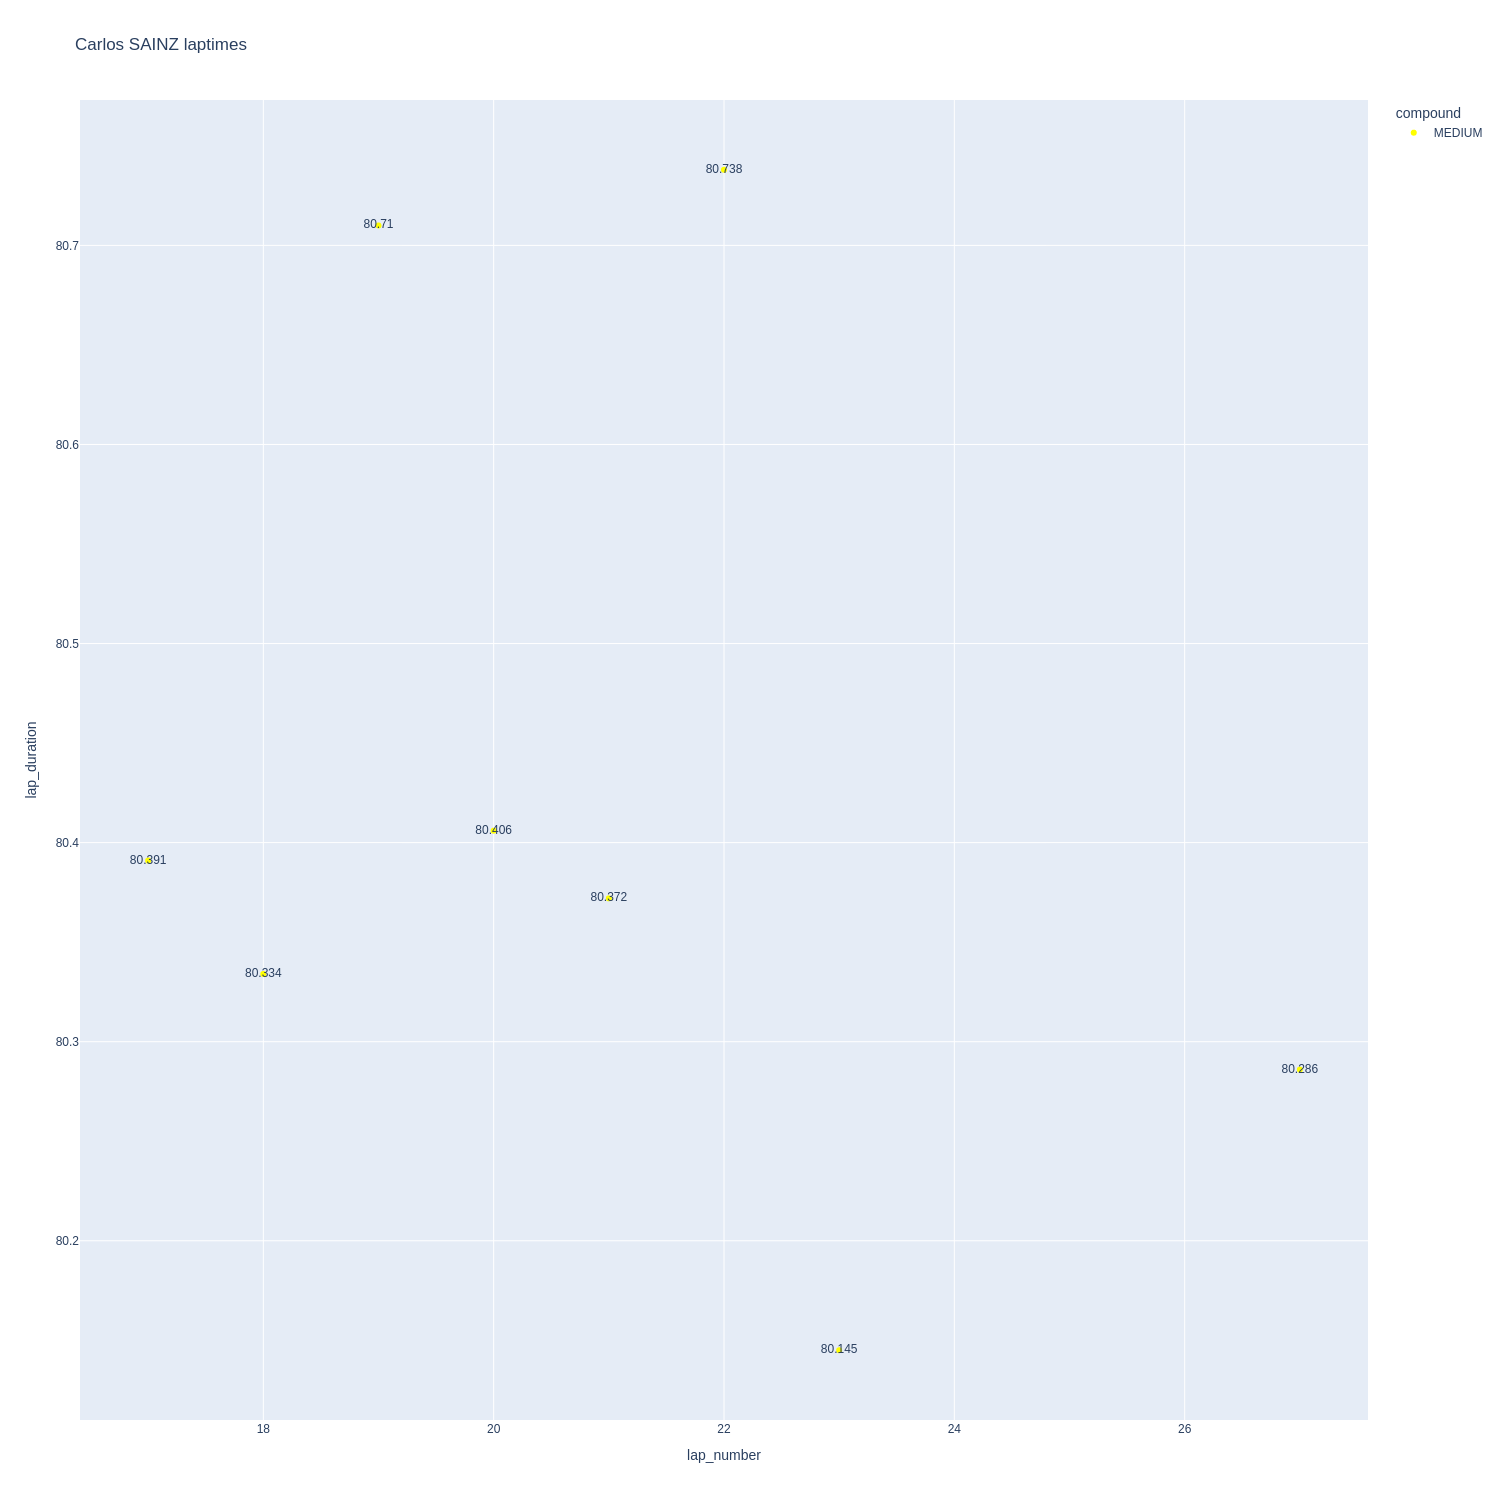

In [1131]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

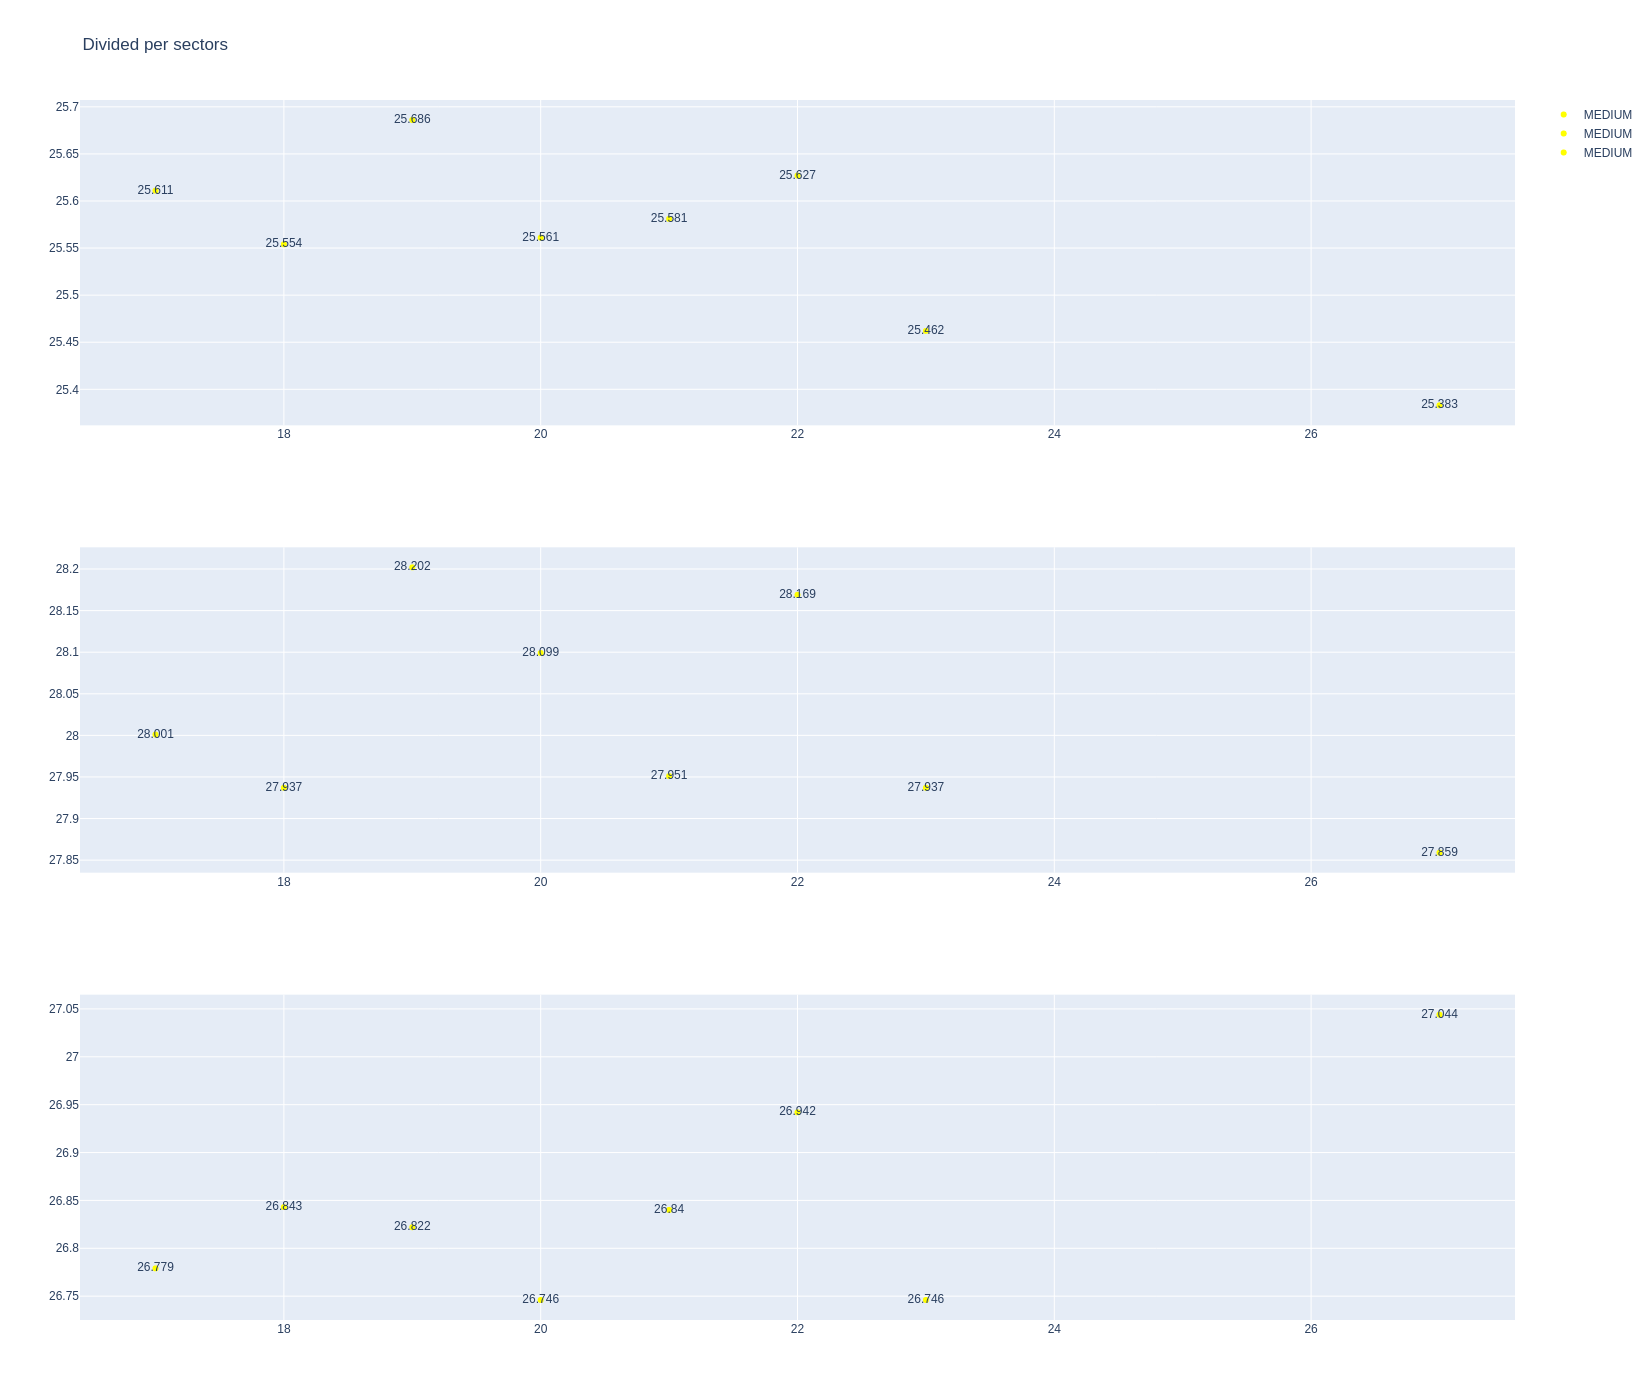

In [1132]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [1133]:
stintInformation.query('driver_number == 5 or driver_number == 27')

meeting_key  session_key  stint_number  driver_number  lap_start  lap_end  \
0          1260         9981             1              5          1        4   
11         1260         9981             1             27          1        7   
28         1260         9981             2              5          5        9   
33         1260         9981             2             27          8       10   
42         1260         9981             3              5         10       12   
49         1260         9981             3             27         11       12   
59         1260         9981             4              5         13       15   
63         1260         9981             4             27         13       23   
78         1260         9981             5              5         16       25   
92         1260         9981             5             27         24       27   
97         1260         9981             6              5         26       28   

   compound  tyre_age_at_start  
0    MEDIUM                  0  
11   MEDIUM                  0  
28   MEDIUM                  0  
33     SOFT                  0  
42     SOFT                  0  
49     SOFT                  3  
59     SOFT                  3  
63   MEDIUM                  6  
78   MEDIUM                  0  
92   MEDIUM                 16  
97   MEDIUM                 17

In [1134]:
data = libraryDataF1.getinfolongruns(jointables2,5,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
301  Gabriel BORTOLETO   MEDIUM  2025-05-16T15:42:19.160000+00:00          16   
317  Gabriel BORTOLETO   MEDIUM  2025-05-16T15:43:40.208000+00:00          17   
335  Gabriel BORTOLETO   MEDIUM  2025-05-16T15:45:01.496000+00:00          18   
353  Gabriel BORTOLETO   MEDIUM  2025-05-16T15:46:22.309000+00:00          19   
372  Gabriel BORTOLETO   MEDIUM  2025-05-16T15:47:43.125000+00:00          20   
392  Gabriel BORTOLETO   MEDIUM  2025-05-16T15:49:03.615000+00:00          21   
432  Gabriel BORTOLETO   MEDIUM  2025-05-16T15:51:48.476000+00:00          23   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
301             25.744             28.183             27.127        81.054  
317             25.985             28.253             27.068        81.306  
335             25.767             28.148             26.937        80.852  
353             25.697             28.066             27.013        80.776  
372             25.592             27.973             26.852        80.417  
392             25.667             28.017             27.181        80.865  
432             25.645             28.056             27.169        80.870

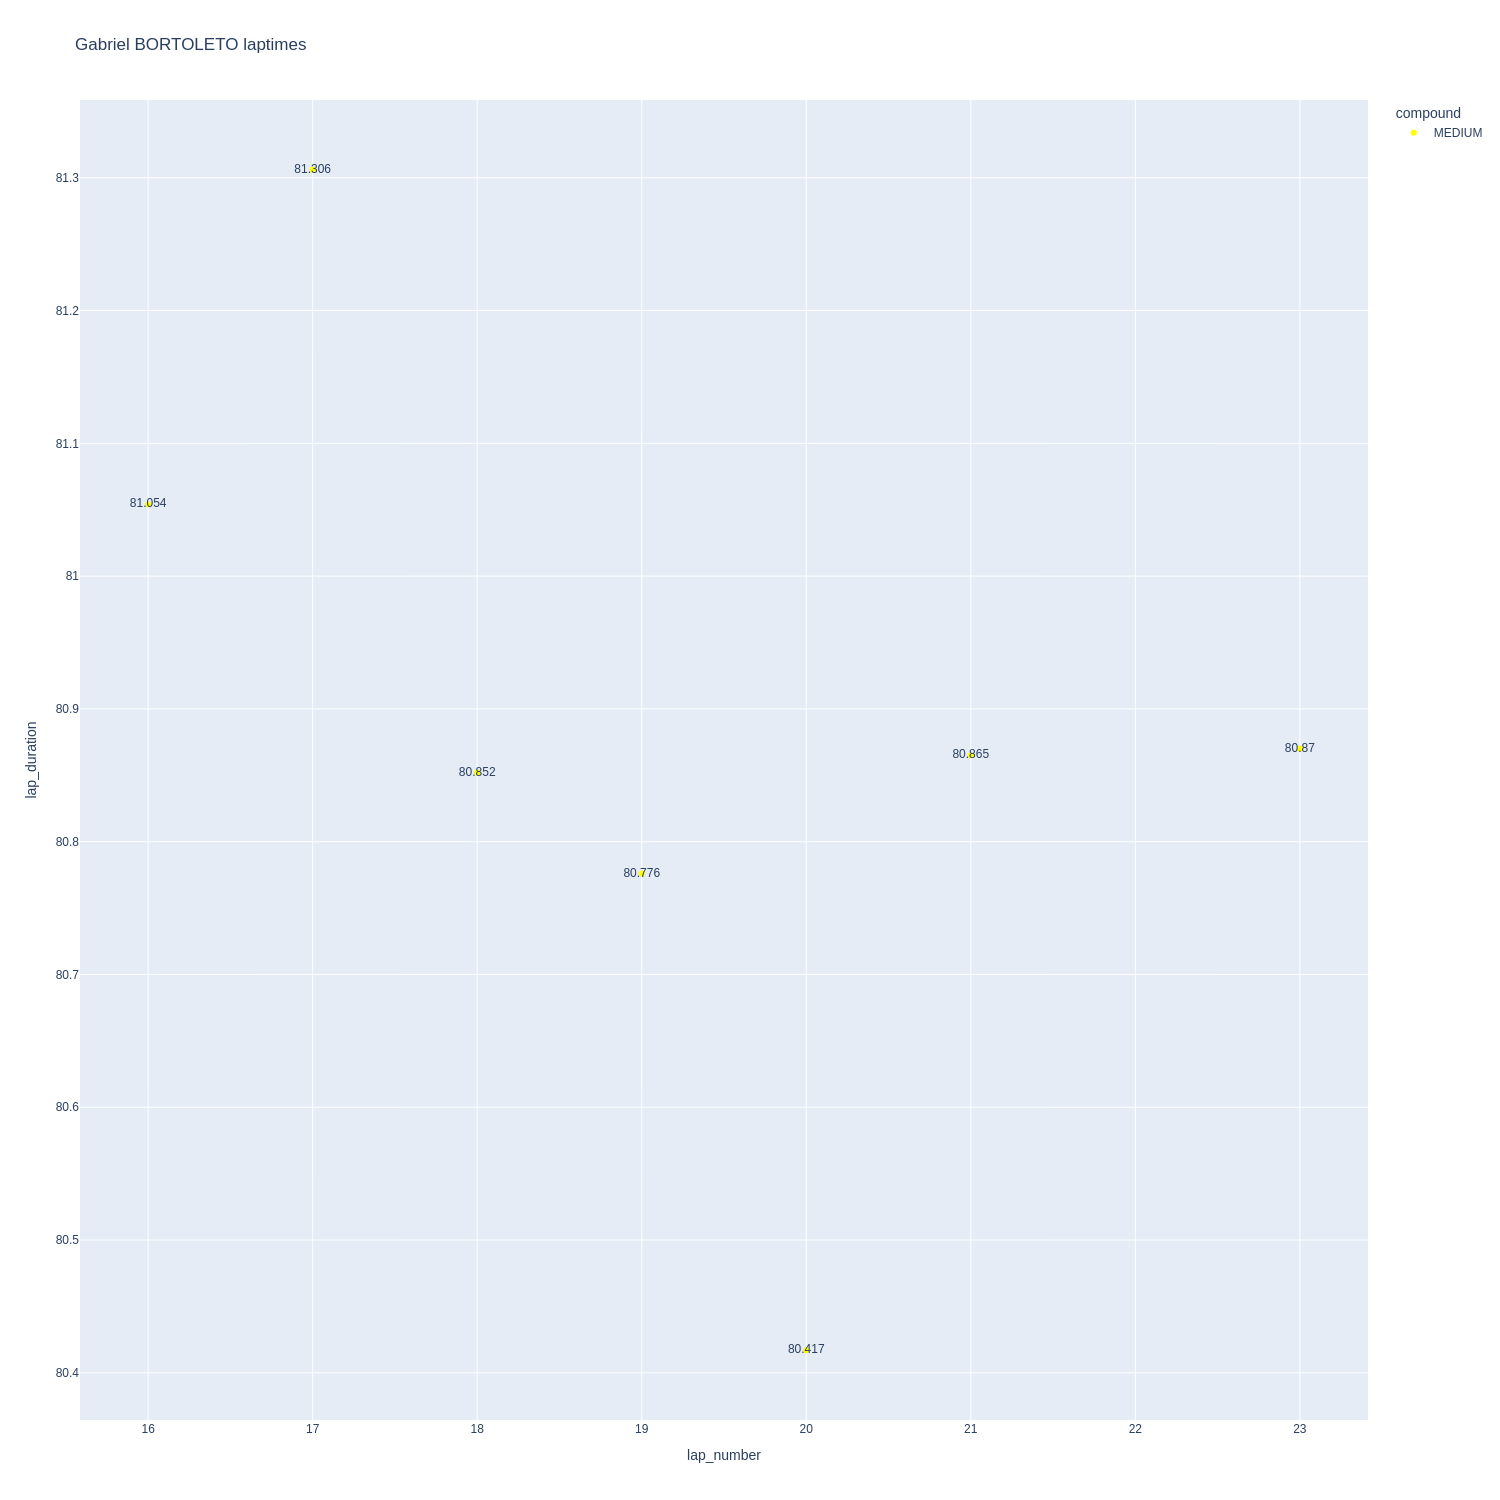

In [1135]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

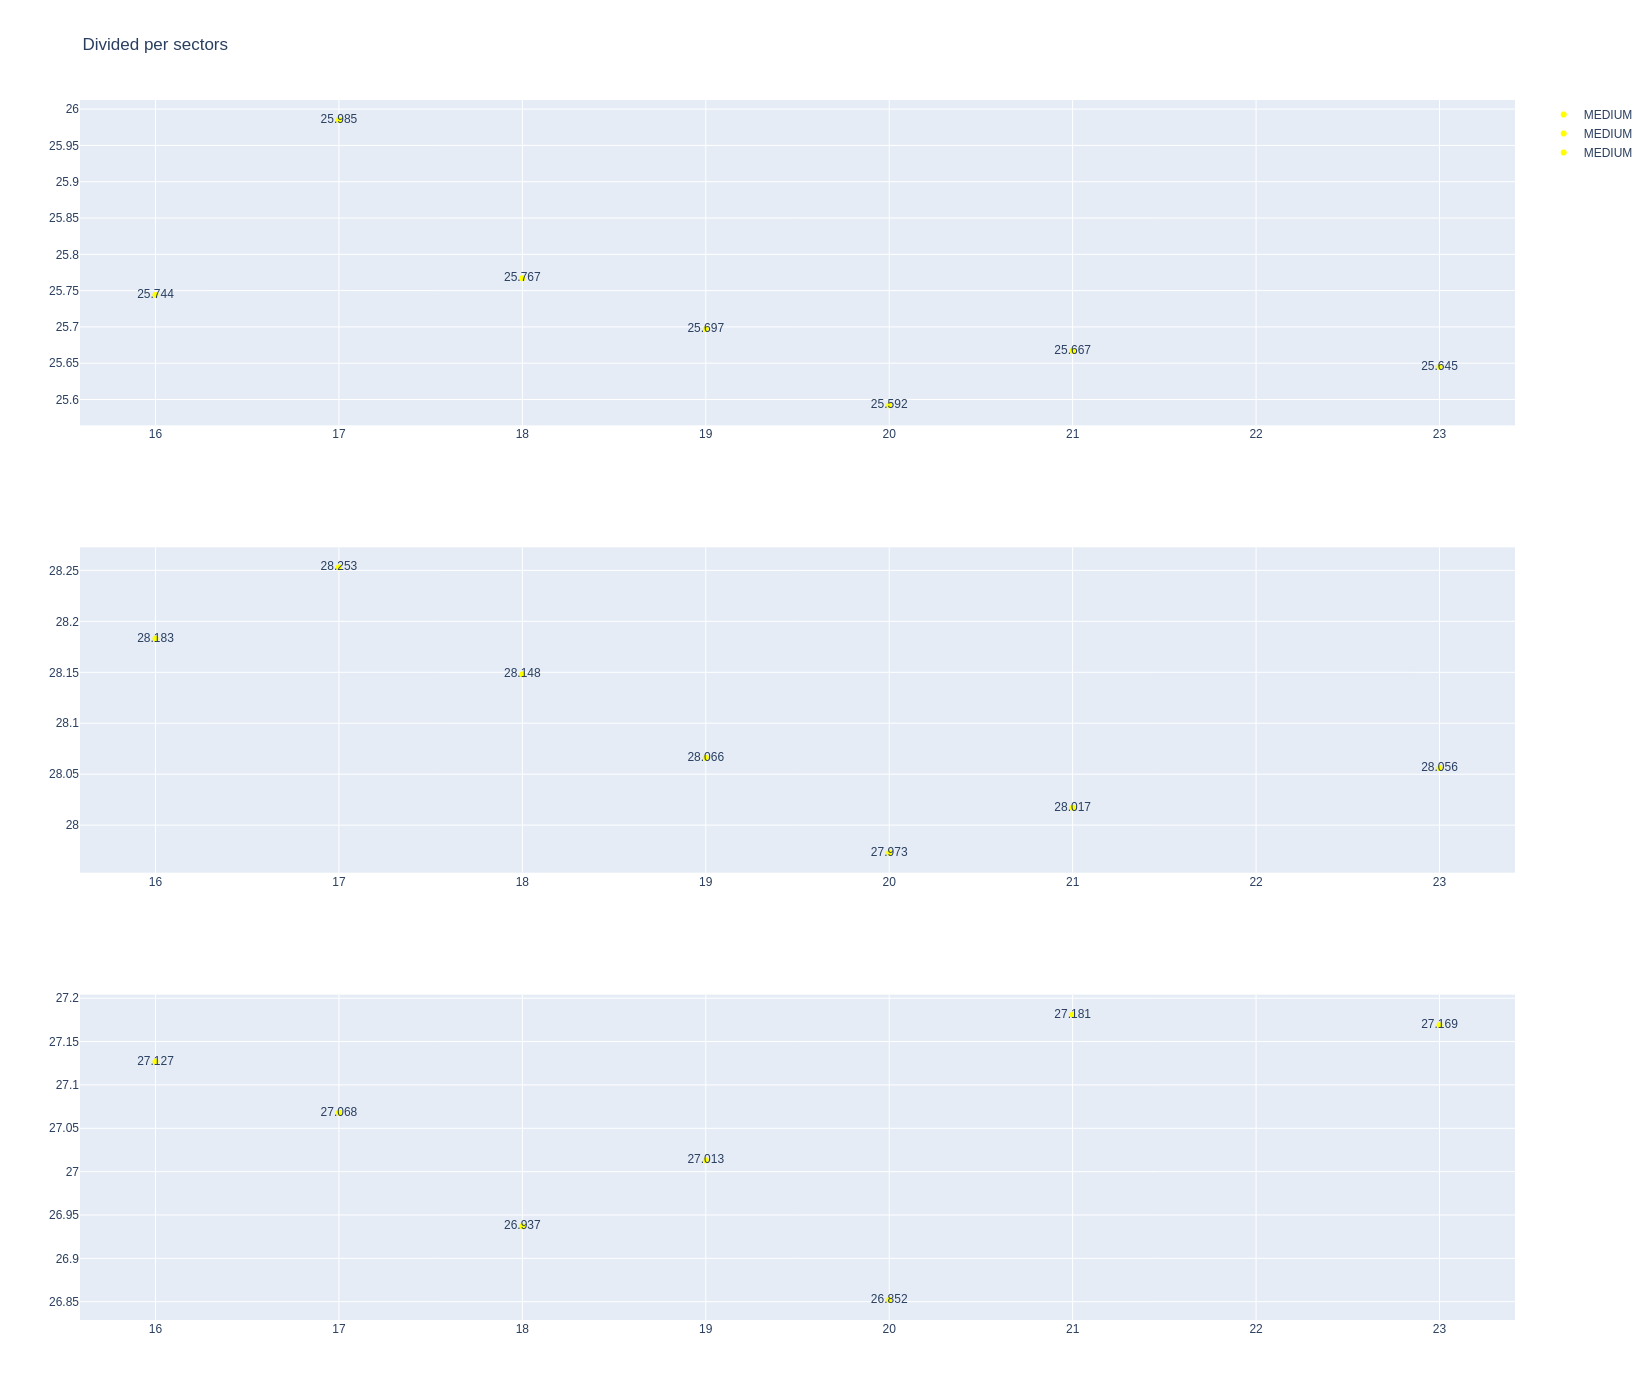

In [1136]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [1137]:
data = libraryDataF1.getinfolongruns(jointables2,27,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

full_name compound                        date_start  lap_number  \
283  Nico HULKENBERG   MEDIUM  2025-05-16T15:40:47.377000+00:00          13   
315  Nico HULKENBERG   MEDIUM  2025-05-16T15:43:29.348000+00:00          15   
333  Nico HULKENBERG   MEDIUM  2025-05-16T15:44:50.097000+00:00          16   
351  Nico HULKENBERG   MEDIUM  2025-05-16T15:46:11.606000+00:00          17   
370  Nico HULKENBERG   MEDIUM  2025-05-16T15:47:32.231000+00:00          18   
389  Nico HULKENBERG   MEDIUM  2025-05-16T15:48:53.100000+00:00          19   
429  Nico HULKENBERG   MEDIUM  2025-05-16T15:51:36.991000+00:00          21   
475  Nico HULKENBERG   MEDIUM  2025-05-16T15:59:40.223000+00:00          24   

     duration_sector_1  duration_sector_2  duration_sector_3  lap_duration  
283             25.819             27.804             26.859        80.482  
315             25.903             28.060             26.921        80.884  
333             25.948             28.358             27.052        81.358  
351             25.671             27.983             27.046        80.700  
370             25.625             28.236             26.996        80.857  
389             25.663             28.099             27.004        80.766  
429             25.565             27.964             27.044        80.573  
475             25.504             27.774             26.949        80.227

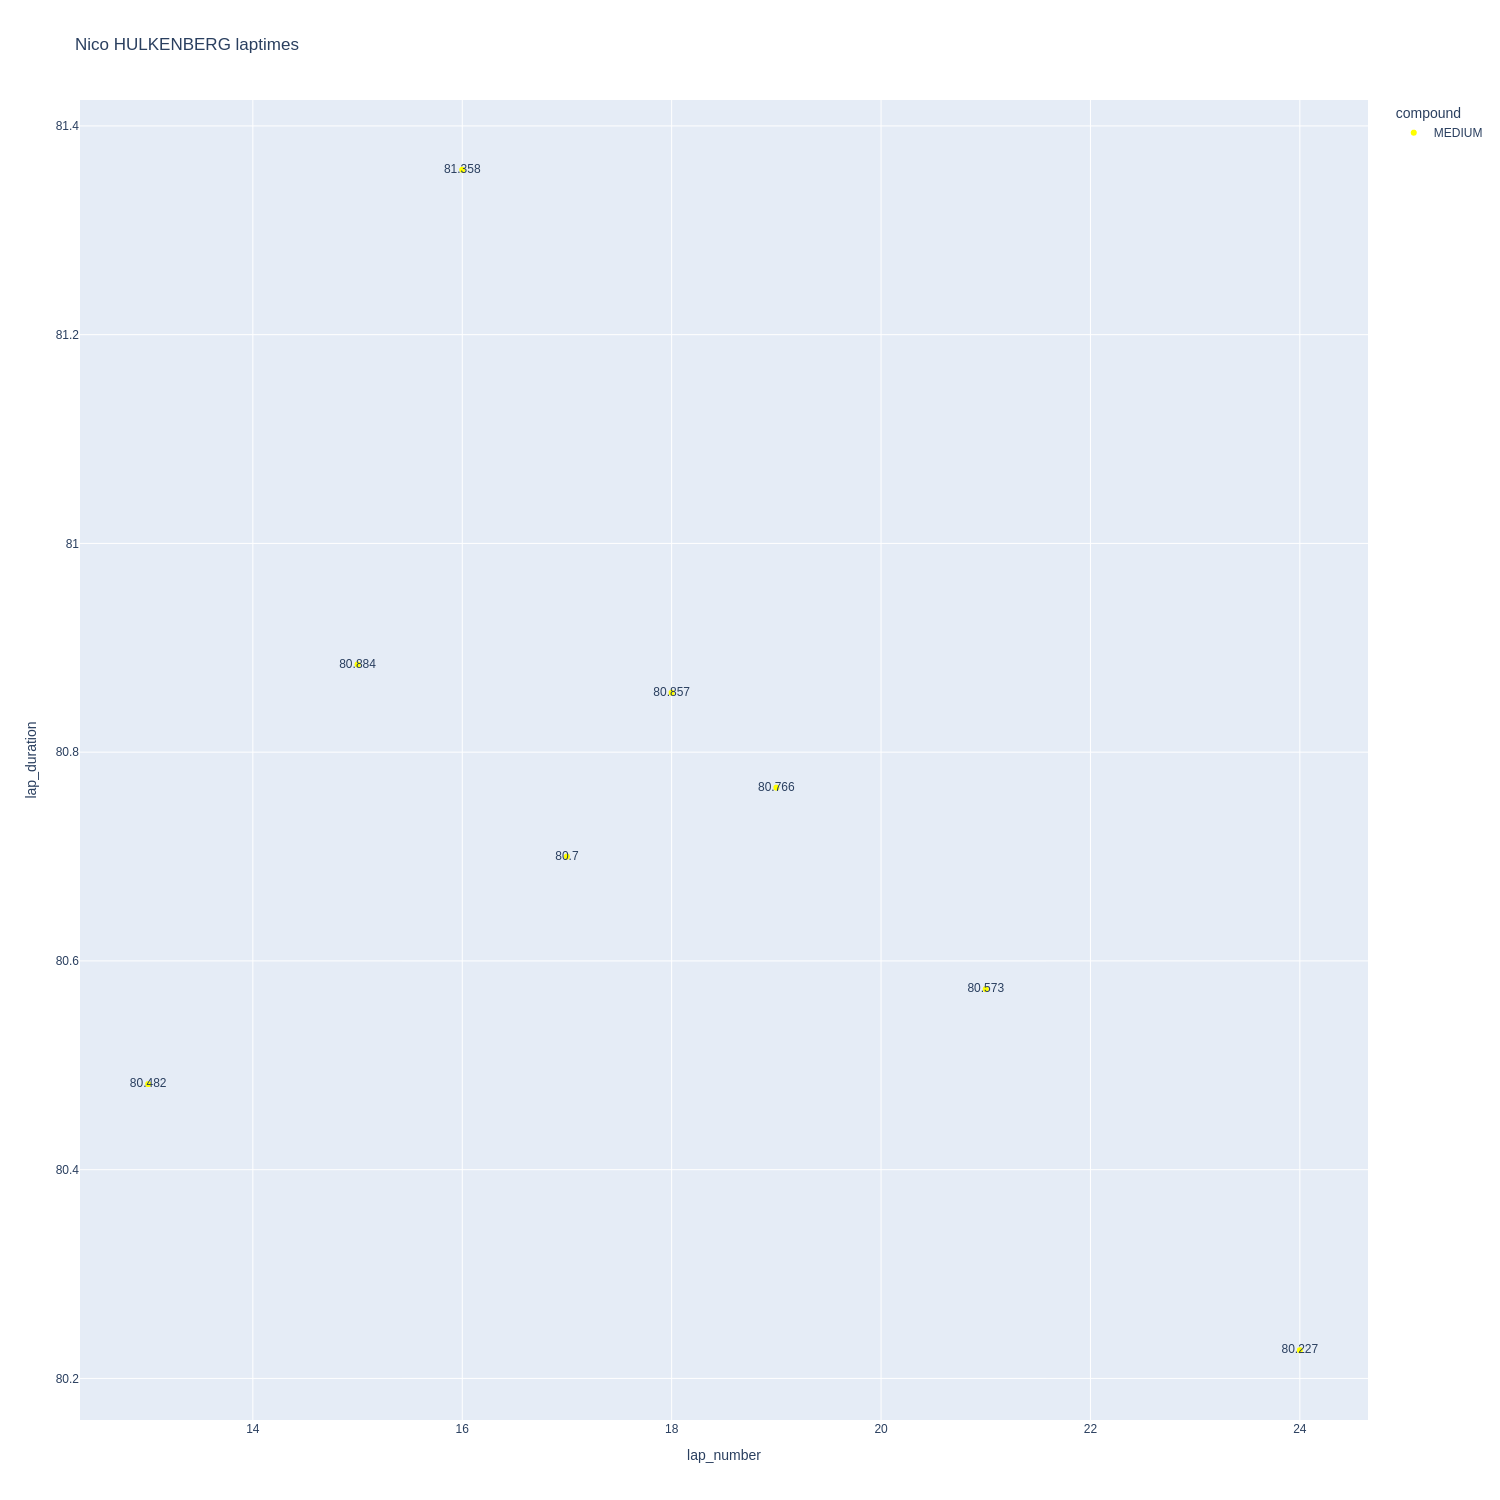

In [1138]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

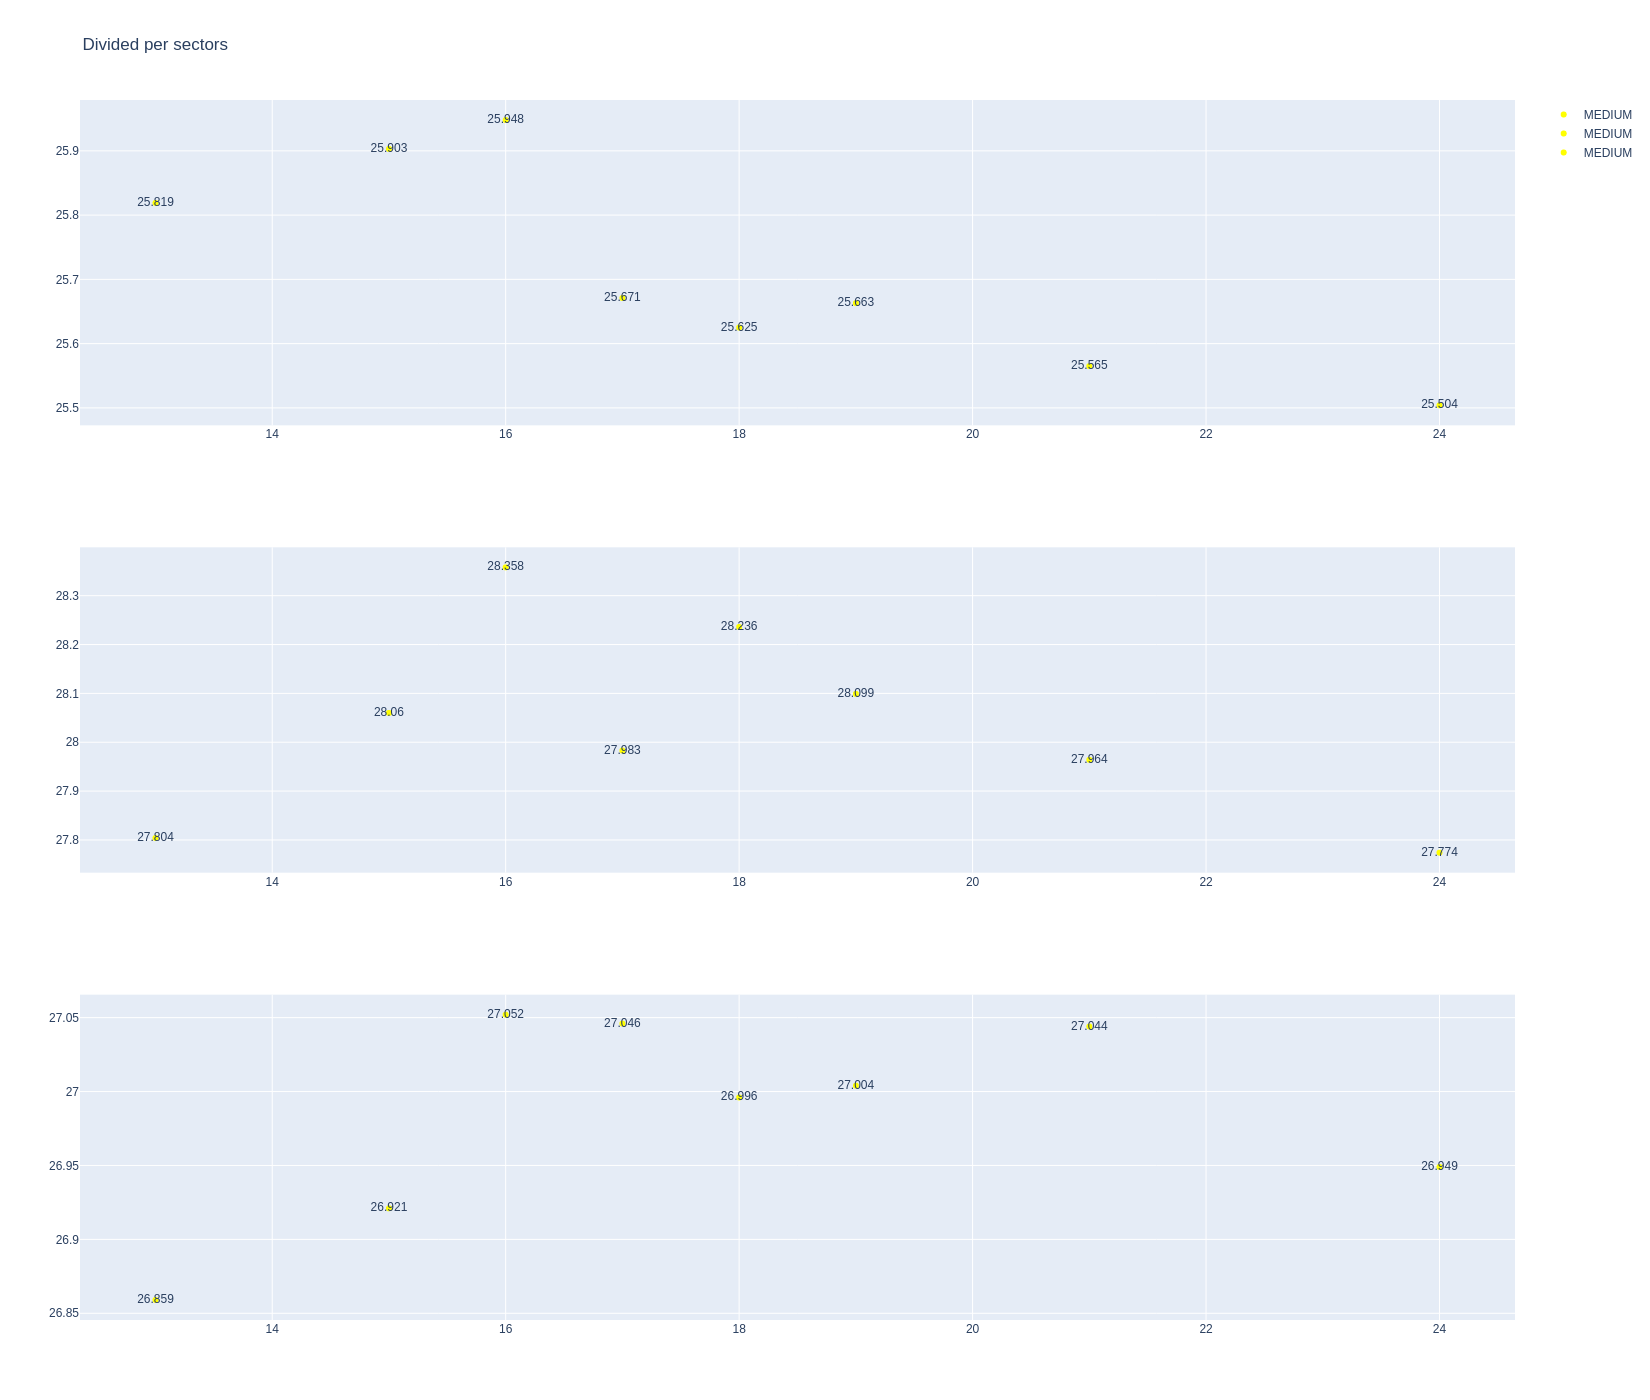

In [1139]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Long runs mean for each driver

In [1140]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration
Only Mercedes and Red Bull did long stints. Red Bull had a poor pace and they had some problems in sector 2 with the degradation. On the other hand, Mercedes was faster in general but they had degradation in sector 3.
Haas suffered in the first sector.


In [1141]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [1142]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

driver compound  lap_duration    sector1    sector2    sector3
1        Lando NORRIS   MEDIUM     79.972714  25.212571  27.516000  27.244143
18      Oscar PIASTRI   MEDIUM     80.042750  25.423000  27.750875  26.868875
15     Lewis HAMILTON   MEDIUM     80.191400  25.563000  27.833000  26.795400
7     Charles LECLERC   MEDIUM     80.191714  25.489286  27.852286  26.850143
5      Kimi ANTONELLI   MEDIUM     80.230111  25.544111  27.815111  26.870889
3        Isack HADJAR   MEDIUM     80.351000  25.450167  27.856000  27.044833
16       Carlos SAINZ   MEDIUM     80.422750  25.558125  28.019375  26.845250
0      Max VERSTAPPEN   MEDIUM     80.514143  25.523000  28.035000  26.956143
17     George RUSSELL   MEDIUM     80.590875  25.665375  27.962125  26.963375
10    Alexander ALBON   MEDIUM     80.600857  25.644143  28.040714  26.916000
4        Pierre GASLY   MEDIUM     80.619429  25.660714  28.009857  26.948857
8        Lance STROLL   MEDIUM     80.652000  25.782750  27.895750  26.973500
11    Nico HULKENBERG   MEDIUM     80.730875  25.712250  28.034750  26.983875
14   Franco COLAPINTO   MEDIUM     80.752600  25.646400  28.024600  27.081600
9        Yuki TSUNODA   MEDIUM     80.795000  25.755000  27.956167  27.083833
12        Liam LAWSON   MEDIUM     80.842250  25.891250  28.055250  26.895750
19     Oliver BEARMAN   MEDIUM     80.849875  25.713750  28.171875  26.964250
6     Fernando ALONSO   MEDIUM     80.872500  25.693500  28.100500  27.078500
2   Gabriel BORTOLETO   MEDIUM     80.877143  25.728143  28.099429  27.049571
13       Esteban OCON   MEDIUM     80.901500  25.760500  28.096000  27.045000

##### Sorted by sector 1
Piastri and Hamilton are strong in this sector being the  leaders of their teams. Also Alonso is strong and this could help him to win some positions. Red Bull will suffer on race.

In [1143]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

driver compound    sector1
1        Lando NORRIS   MEDIUM  25.212571
18      Oscar PIASTRI   MEDIUM  25.423000
3        Isack HADJAR   MEDIUM  25.450167
7     Charles LECLERC   MEDIUM  25.489286
0      Max VERSTAPPEN   MEDIUM  25.523000
5      Kimi ANTONELLI   MEDIUM  25.544111
16       Carlos SAINZ   MEDIUM  25.558125
15     Lewis HAMILTON   MEDIUM  25.563000
10    Alexander ALBON   MEDIUM  25.644143
14   Franco COLAPINTO   MEDIUM  25.646400
4        Pierre GASLY   MEDIUM  25.660714
17     George RUSSELL   MEDIUM  25.665375
6     Fernando ALONSO   MEDIUM  25.693500
11    Nico HULKENBERG   MEDIUM  25.712250
19     Oliver BEARMAN   MEDIUM  25.713750
2   Gabriel BORTOLETO   MEDIUM  25.728143
9        Yuki TSUNODA   MEDIUM  25.755000
13       Esteban OCON   MEDIUM  25.760500
8        Lance STROLL   MEDIUM  25.782750
12        Liam LAWSON   MEDIUM  25.891250

##### Sorted by sector 2
Ferrari is strong here so it could make sense to say that the car is focused on turns. Racing Bulls were fast here so it could help to make overcuts on race.

In [1144]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

driver compound    sector2
1        Lando NORRIS   MEDIUM  27.516000
18      Oscar PIASTRI   MEDIUM  27.750875
5      Kimi ANTONELLI   MEDIUM  27.815111
15     Lewis HAMILTON   MEDIUM  27.833000
7     Charles LECLERC   MEDIUM  27.852286
3        Isack HADJAR   MEDIUM  27.856000
8        Lance STROLL   MEDIUM  27.895750
9        Yuki TSUNODA   MEDIUM  27.956167
17     George RUSSELL   MEDIUM  27.962125
4        Pierre GASLY   MEDIUM  28.009857
16       Carlos SAINZ   MEDIUM  28.019375
14   Franco COLAPINTO   MEDIUM  28.024600
11    Nico HULKENBERG   MEDIUM  28.034750
0      Max VERSTAPPEN   MEDIUM  28.035000
10    Alexander ALBON   MEDIUM  28.040714
12        Liam LAWSON   MEDIUM  28.055250
13       Esteban OCON   MEDIUM  28.096000
2   Gabriel BORTOLETO   MEDIUM  28.099429
6     Fernando ALONSO   MEDIUM  28.100500
19     Oliver BEARMAN   MEDIUM  28.171875

##### Sorted by sector 3
McLaren was the best here and if they take advantage this sector, they could extend the gap on race. Alpine could gain some positions thanks to the focus on the straight. Red Bull will suffer here.

In [1145]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

driver compound    sector3
15     Lewis HAMILTON   MEDIUM  26.795400
16       Carlos SAINZ   MEDIUM  26.845250
7     Charles LECLERC   MEDIUM  26.850143
18      Oscar PIASTRI   MEDIUM  26.868875
5      Kimi ANTONELLI   MEDIUM  26.870889
12        Liam LAWSON   MEDIUM  26.895750
10    Alexander ALBON   MEDIUM  26.916000
4        Pierre GASLY   MEDIUM  26.948857
0      Max VERSTAPPEN   MEDIUM  26.956143
17     George RUSSELL   MEDIUM  26.963375
19     Oliver BEARMAN   MEDIUM  26.964250
8        Lance STROLL   MEDIUM  26.973500
11    Nico HULKENBERG   MEDIUM  26.983875
3        Isack HADJAR   MEDIUM  27.044833
13       Esteban OCON   MEDIUM  27.045000
2   Gabriel BORTOLETO   MEDIUM  27.049571
6     Fernando ALONSO   MEDIUM  27.078500
14   Franco COLAPINTO   MEDIUM  27.081600
9        Yuki TSUNODA   MEDIUM  27.083833
1        Lando NORRIS   MEDIUM  27.244143

#### Long runs mean

In [1146]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [1147]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

driver  mean_lap_time
1       L NORRIS         79.998
18     O PIASTRI         80.043
15    L HAMILTON         80.191
7      C LECLERC         80.192
5    K ANTONELLI         80.230
3       I HADJAR         80.351
16       C SAINZ         80.423
0   M VERSTAPPEN         80.514
17     G RUSSELL         80.591
10       A ALBON         80.601
4        P GASLY         80.619
8       L STROLL         80.652
11  N HULKENBERG         80.731
14   F COLAPINTO         80.753
9      Y TSUNODA         80.795
12      L LAWSON         80.842
19     O BEARMAN         80.850
6       F ALONSO         80.872
2    G BORTOLETO         80.877
13        E OCON         80.902

In [1148]:
#libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

In [1149]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

## Free Practice 3
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9510)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9510)
drivers = libraryDataF1.obtain_information('drivers',session_key=9510)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 7, 'FP3')
session.load();

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration <= 83").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9511)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9511)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9511)
drivers = libraryDataF1.obtain_information('drivers',session_key=9511)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
session = ff1.get_session(2024, 7, 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

To obtain a better analysis, those laptimes deleted will be removed from this analysis in order to obtain the data with valid values. So that,taking into account the race control table, it will be neccesary to consult the qualyfing data to obtain the ids. 

In [ ]:
qualyfing = qualyfing.drop(12)
qualyfing = qualyfing.drop(33)
qualyfing = qualyfing.drop(118)
qualyfing = qualyfing.drop(203)

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 74.746 seconds (1.14.746= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 (79.97 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration < 79.97822")

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole. In this case, this happened with Leclerc taking the best time but not taking the pole because his cest time in Q3 was not the best time of the session.

In [ ]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-05-18T14:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-05-18T14:48:00+00:00' and date_start >'2024-05-18T14:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-05-18T14:48:00+00:00'"

### Qualyfing 1
In this session the surprise came from Aston Martin with Fernando that knocked-out in Q1. The rest of the drivers were expected to be knocked-out

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P15 = q1Data[14:15]

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
It was a close battle to pass to Q2 with less of 3 tenths among the driver at risk and Magnussen. Until the third sector, P15 was disputed beetween Hamilton and Bottas being Bottas 0.040 miliseconds better than Hamilton in the second sector.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
As we can see in the last table, Hamilton had a good pace in the first sector but he suffered a lot in the second losing more than 1 tenth in this sector

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2
In this session, both Alpine,Albon,Stroll and Perez knocked out. Perez was so close to make it through Q3 but his first sector was bad.

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
RB had a good pace being able to pass to Q3 eliminating Perez in Q2

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:
libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.
Both Mercedes would have suffered for their third sector losing 1.5 tenths.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.
As we saw in the free practices, pole position was going to be very close among Red Bull, Ferrari and McLaren. Verstappen took the pole but, as other grand prix, he suffered a lot to get it. His first sector, with two tenths of difference compared to his rivals, afforded to Verstappen to take the pole.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

In [ ]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

In [ ]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

In [ ]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9515)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9515)
drivers = libraryDataF1.obtain_information('drivers',session_key=9515)
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace
General explanation
Explanation per teams

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3
General explanation

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration <= 84").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Long runs

In [ ]:
MINIMUN_SECONDS = 78
MAXIMUM_SECONDS = 85

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 2 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,2,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9515)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration